In [ ]:
# Jessica Gallo, Omar Guzman, Kevin Fremgen
# Created: 11/01/2020
# Last Modified: 11/11/2020
# CSC767 Neural Networks & Deep Learning
# Project 1
# Image Classification with Convolutional Neural Networks (Keras and/or Tensorflow)
# Problem 1

'''
Explore the implementation of CNN with a color image dataset by your choice. Datasets
MNIST, CIFAR-10, CIFAR-100 or MNIST-like and CIFAR-like are excluded. As the datasets
are usually bigger than you can afford, you may decide to use only part of it.
'''

In [1]:
import tensorflow as tf 
print(tf.test.gpu_device_name())
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

/device:GPU:0
2.1.0


Using TensorFlow backend.


2.3.1


In [189]:
# Imports
import os, shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import image  # preprocessing a single image
import numpy as np  # preprocessing a single image
from keras.applications import VGG16  # defining the loss tensor for filter visualiation
from keras import backend as K  # defining the loss tensor for filter visualization
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
'''
a) Dataset: 5-6classes, 1000+ images for each classes in training, 300+ images for each 
of the classes in the validation, and 60+ images for each of the classes in the test set. 
Split into (70% train - 20% val - 10% test). Use data analysis and preprocessing as 
normalization or standardization etc. Represent the classes in training and val sets in 
the following two ways shown below for the training set. Do the same for th val set. Make 
conclusion about the imbalance of the training and val sets and pick up the way to fix 
imbalance problem of both datasets: train and val.
'''

In [ ]:
# Dataset
# removed folders(characters) that did not have 1000 or more pictures
# removed the characters from the test set that were removed from the folders

In [3]:
# ---------------------------------
# DOWNLOADING & SPLITTING THE DATA |
# ---------------------------------

# Path to original dataset
original_dataset_dir = './Downloads/simpsons_dataset_original'

os.listdir('./Downloads/simpsons_dataset_original') # returns list

['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'bumblebee_man',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'hans_moleman',
 'helen_lovejoy',
 'homer_simpson',
 'jasper_beardly',
 'jimbo_jones',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

In [4]:
# Making a new dataset
base_dir = './Downloads/simpsons_dataset_small'
os.mkdir(base_dir)

In [ ]:
'''
# Making directories for training, validation & test
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
'''

In [5]:
# Copies original dataset into the train folder of the new small dataset
shutil.copytree(original_dataset_dir, './/Downloads//simpsons_dataset_small//train')

'.//Downloads//simpsons_dataset_small//train'

In [25]:
train_dir = os.path.join(base_dir, 'train')

In [9]:
# Check directory
os.getcwd()

'C:\\Users\\User'

In [10]:
# Change directory to train folder in small datset in order to delete
# all the folders that do not have 1000 images
os.chdir('./Downloads/simpsons_dataset_small/train')

In [11]:
# Check directory
os.getcwd()

'C:\\Users\\User\\Downloads\\simpsons_dataset_small\\train'

In [12]:
# Removing folders from small dataset that do not have, or do not have 
# close to 1000 images

shutil.rmtree('agnes_skinner', ignore_errors=True)
shutil.rmtree('apu_nahasapeemapetilon', ignore_errors=True)
shutil.rmtree('barney_gumble', ignore_errors=True)
shutil.rmtree('bumblebee_man', ignore_errors=True)
shutil.rmtree('carl_carlson', ignore_errors=True)
shutil.rmtree('cletus_spuckler', ignore_errors=True)
shutil.rmtree('comic_book_guy', ignore_errors=True)
shutil.rmtree('disco_stu', ignore_errors=True)
shutil.rmtree('edna_krabappel', ignore_errors=True)
shutil.rmtree('fat_tony', ignore_errors=True)
shutil.rmtree('gil', ignore_errors=True)
shutil.rmtree('groundskeeper_willie', ignore_errors=True)
shutil.rmtree('hans_moleman', ignore_errors=True)
shutil.rmtree('helen_lovejoy', ignore_errors=True)
shutil.rmtree('jasper_beardly', ignore_errors=True)
shutil.rmtree('jimbo_jones', ignore_errors=True)
shutil.rmtree('kent_brockman', ignore_errors=True)
shutil.rmtree('lenny_leonard', ignore_errors=True)
shutil.rmtree('lionel_hutz', ignore_errors=True)
shutil.rmtree('maggie_simpson', ignore_errors=True)
shutil.rmtree('martin_prince', ignore_errors=True)
shutil.rmtree('mayor_quimby', ignore_errors=True)
shutil.rmtree('miss_hoover', ignore_errors=True)
shutil.rmtree('nelson_muntz', ignore_errors=True)
shutil.rmtree('otto_mann', ignore_errors=True)
shutil.rmtree('patty_bouvier', ignore_errors=True)
shutil.rmtree('professor_john_frink', ignore_errors=True)
shutil.rmtree('rainier_wolfcastle', ignore_errors=True)
shutil.rmtree('ralph_wiggum', ignore_errors=True)
shutil.rmtree('selma_bouvier', ignore_errors=True)
shutil.rmtree('sideshow_bob', ignore_errors=True)
shutil.rmtree('sideshow_mel', ignore_errors=True)
shutil.rmtree('snake_jailbird', ignore_errors=True)
shutil.rmtree('troy_mcclure', ignore_errors=True)
shutil.rmtree('waylon_smithers', ignore_errors=True)

In [13]:
os.listdir() # shows the new directory containing only 1000 image characters

['abraham_grampa_simpson',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'homer_simpson',
 'krusty_the_clown',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'principal_skinner']

In [14]:
# changing directory back to original
os.chdir('../../..')

In [15]:
# checking to make sure we are in the right directory
os.getcwd()

'C:\\Users\\User'

In [35]:
# Copies testset into the test folder of the new small dataset
shutil.copytree('.//Downloads//simpsons_testset', './/Downloads//simpsons_dataset_small//test')

'.//Downloads//simpsons_dataset_small//test'

In [96]:
test_dir = os.path.join(base_dir, 'test')

In [50]:
os.chdir('../..')

In [34]:
os.getcwd()

'C:\\Users\\User'

In [37]:
for fname in os.listdir(test_dir):
    if fname.startswith(".DS" or "apu" or "comic" or "edna" or "kent" or "lenny" 
                        or "mayor" or "nelson" or "sideshow"):
        os.remove(os.path.join(test_dir, fname))

In [92]:
test_dir = os.path.join(base_dir, 'test')

In [ ]:
'''
fnames = ['apu_nahasapeemapetilon_.jpg', 'comic_book_guy_.jpg', 
          'edna_krabappel_.jpg', 'kent_brockman_.jpg', 
          'lenny_leonard_.jpg', 'mayor_quimby_.jpg', 
          'nelson_muntz_.jpg', 'sideshow_bob_.jpg']

for fname in fnames:
    os.remove(fnames)
'''

In [38]:
validation_dir = os.path.join(base_dir, 'validation')

In [44]:
# Copies original dataset into the train folder of the new small dataset
shutil.copytree(train_dir, validation_dir)

'./Downloads/simpsons_dataset_small\\validation'

In [53]:
# Taking 200 pictures from each folder in the train set for validation set

# Grampa
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 912)]
for fnames in validation_dir:
    os.remove('.//Downloads//simpsons_dataset_small//validation//abraham_grampa_simpson',fnames)
    
# Bart
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1341)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//bart_simpson', fname)


# Burns
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1193)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//charles_montgomery_burns', fname)

# Wiggum
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 985)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//chief_wiggum', fname)

# Homer
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 2245)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//homer_simpson', fname)

# Krusty
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1209)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//krusty_the_clown', fname)

# Lisa
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1354)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//lisa_simpson', fname)

# Marge
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1290)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//marge_simpson', fname)
    
# Milhouse
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1079)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//milhouse_van_houten', fname)
    
# Moe
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1451)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//moe_syslak', fname)
    
# Ned
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1453)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//ned_flanders', fname)

    
# Skinner
fnames = ['pic_{0:04}.jpg'.format(i) for i in range(200, 1193)]
for fname in fnames:
    os.remove('.//Downloads//simpsons_dataset_small//validation//principal_skinner', fname)
'''

PermissionError: [WinError 5] Access is denied: '.'

In [ ]:
# Acessed denied to remove files, so they were removed manually via desktop gui
# All folders have 200 images in validation set

In [58]:
os.getcwd()

'C:\\Users\\User'

In [97]:
train_count=[]
val_count=[]
whole_count=[]

print('TRAINING SET')
files= os.listdir(".//Downloads//simpsons_dataset_small//train")
for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small//train//'+type+'/')
    print(type+ "  "+ str(len(count)))
    train_count.append(len(count))
print()

print('VALIDATION SET')
files= os.listdir('.//Downloads//simpsons_dataset_small//validation')
for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small//validation/'+type+'/')
    print(type+ "  "+ str(len(count)))
    val_count.append(len(count))

print()

print('TEST SET')
files= os.listdir('./Downloads//simpsons_dataset_small//test')

for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small//test//'+type+'/')
    print(type+ "  "+ str(len(count)))
    whole_count.append(len(count))

TRAINING SET
abraham_grampa_simpson  913
bart_simpson  1342
charles_montgomery_burns  1193
chief_wiggum  986
homer_simpson  2246
krusty_the_clown  1206
lisa_simpson  1354
marge_simpson  1291
milhouse_van_houten  1079
moe_szyslak  1452
ned_flanders  1454
principal_skinner  1194

VALIDATION SET
abraham_grampa_simpson  200
bart_simpson  200
charles_montgomery_burns  200
chief_wiggum  200
homer_simpson  200
krusty_the_clown  196
lisa_simpson  200
marge_simpson  200
milhouse_van_houten  199
moe_szyslak  200
ned_flanders  200
principal_skinner  200

TEST SET
abraham_grampa_simpson  48
bart_simpson  50
charles_montgomery_burns  48
chief_wiggum  50
homer_simpson  50
krusty_the_clown  50
lisa_simpson  50
marge_simpson  50
milhouse_van_houten  49
moe_szyslak  50
ned_flanders  49
principal_skinner  50


In [98]:
# returns a number of items inside the folder
def getNumber(path):
    s = 0
    for i in os.listdir(path):
        if i !='.DS_Store':
            s += len(os.listdir(os.path.join(path,i)))
    return s

# Get the number of samples in each directory
n_train = getNumber(train_dir)
n_test = getNumber(test_dir)
n_validation = getNumber(validation_dir)

Number of Samples Train: 15710
Number of Samples Validation: 2395
Number of Samples Test: 594


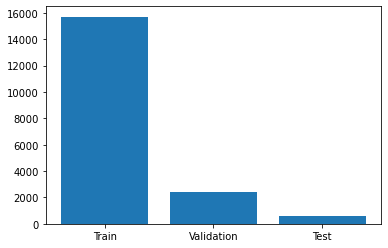

In [99]:
# Visualizing data

print('Number of Samples Train:', n_train)
print('Number of Samples Validation:', n_validation)
print('Number of Samples Test:', n_test)

fig, ax = plt.subplots()
ax.bar(['Train', 'Validation', 'Test'], [n_train, n_validation, n_test])
plt.show()

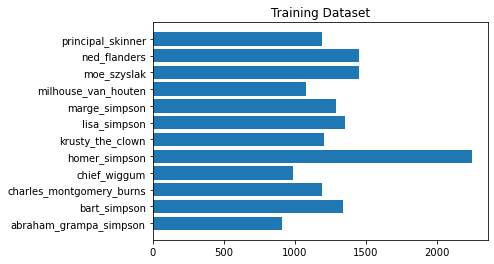

In [100]:
plt.barh(files, train_count,)
plt.title('Training Dataset')
plt.show()

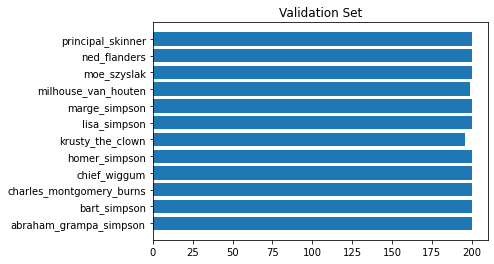

In [101]:
plt.barh(files, val_count,)
plt.title('Validation Set')
plt.show()

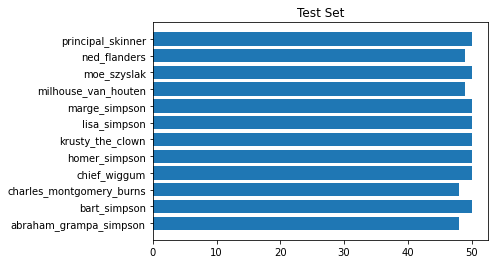

In [102]:
plt.barh(files, whole_count,)
plt.title('Test Set')
plt.show()

In [104]:
# Rescales all imaged by 1/255
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (320, 258),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (320, 258),
    batch_size = 32,
    class_mode = 'categorical')

Found 15710 images belonging to 12 classes.
Found 2395 images belonging to 12 classes.


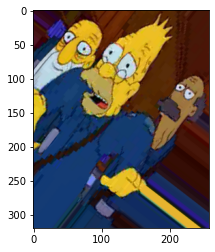

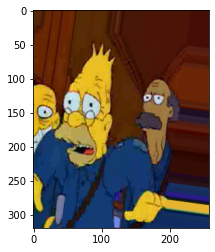

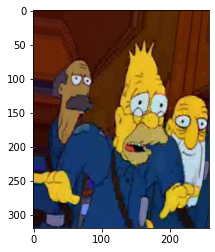

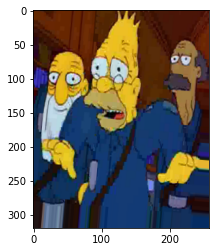

In [178]:
# display some randomly augmented pictures

from keras.preprocessing import image
train_dir = './Downloads/simpsons_dataset_small/train/abraham_grampa_simpson'

fnames = [os.path.join(train_dir, fname) for
          fname in os.listdir(train_dir)]

img_path = fnames[6]  #choosing an image to augment

img = image.load_img(img_path, target_size = (320, 258))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
    
plt.show()

In [ ]:
'''
b) Sequential model and build topology for CNN implementing inbalanced dataset as well as 
the balanced train and val datasets. 
CNN topology: 4+ convolutional layers, # of neurons, # of filters and their size and type 
of pooliing layers and where to include the last one is up to you. 
Experiments with 3 different models (the difference could be the choice of activation 
function, optimizer, and number of convolutional layers, batch size or any combination of 
these, learning rate change, stride etc.) Include as a first choice ReLU, Adam and batch 
size 32. INCLUDE BATCH NORMALIZATION and SHUFFLING. Describe each model. Apply 
regularization and dropout to the model to prevent overfitting if necessary.
'''

In [110]:
# ReLU activation function
# Adam optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model = tensorflow.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (320, 258, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 318, 256, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 318, 256, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 159, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 157, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 78, 63, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 76, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 30, 128)      

In [111]:
adam = optimizers.Adam(lr = 0.001)

model.compile(loss = "categorical_crossentropy", 
               optimizer=adam, 
               metrics=["acc"])

In [112]:
# Training model with adagrad, 50 epochs and shuffling data
history_adam = model.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    shuffle = True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 491 steps, validate for 75 steps
Epoch 1/30
491/491 [==============================] - 278s 566ms/step - loss: 2.4860 - acc: 0.1410 - val_loss: 2.5275 - val_acc: 0.0835
Epoch 2/30
491/491 [==============================] - 268s 545ms/step - loss: 2.4588 - acc: 0.1430 - val_loss: 2.5124 - val_acc: 0.0835
Epoch 3/30
491/491 [==============================] - 268s 546ms/step - loss: 2.4582 - acc: 0.1430 - val_loss: 2.4993 - val_acc: 0.0835
Epoch 4/30
491/491 [==============================] - 266s 542ms/step - loss: 2.4584 - acc: 0.1430 - val_loss: 2.5192 - val_acc: 0.0835
Epoch 5/30
491/491 [==============================] - 271s 551ms/step - loss: 2.4583 - acc: 0.1430 - val_loss: 2.5101 - val_acc: 0.0835
Epoch 6/30
491/491 [==============================] - 270s 549ms/step - loss: 2.4579 - acc: 0.1430 - val_loss: 2.5188 - val_acc: 0.0835
Epoch 7/30
491/491 [==============================] - 271s 553ms/step - loss: 2.4580 - acc:

In [ ]:
'''
c) Plot training and validation accuracy as well as training and validation loss for each 
of the above models using combinations like the one shown below.
'''

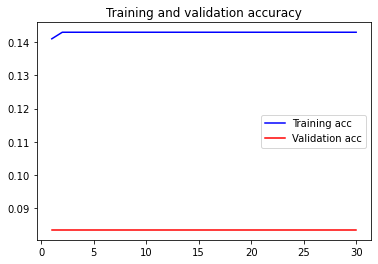

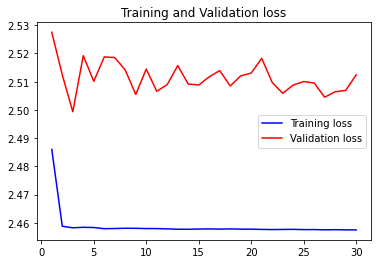

<Figure size 432x288 with 0 Axes>

In [113]:
# Visualizing train/validation loss and accuracy

acc_adam = history_adam.history['acc']
val_acc_adam = history_adam.history['val_acc']
loss_adam = history_adam.history['loss']
val_loss_adam = history_adam.history['val_loss']

epochs_adam = range(1,len(acc_adam) +1)

# Plot of accuracy
plt.plot(epochs_adam, acc_adam, color='blue', label='Training acc')
plt.plot(epochs_adam, val_acc_adam, color='red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_adam, loss_adam, color='blue', label='Training loss')
plt.plot(epochs_adam, val_loss_adam, color='red', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

plt.show()

In [ ]:
# b

In [114]:
# ReLU activation function
# Adadagrad optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model2 = tensorflow.keras.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (320, 258, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(.5))
model2.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(12, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 318, 256, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 318, 256, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 159, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 157, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 78, 63, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 76, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 30, 128)      

In [115]:
adagrad = optimizers.Adagrad(lr=0.01)

model2.compile(loss = "categorical_crossentropy", 
               optimizer=adagrad, 
               metrics=["acc"])

In [117]:
# Training model with adagrad, 50 epochs and shuffling data
history_adagrad = model2.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    shuffle = True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 491 steps, validate for 75 steps
Epoch 1/30
491/491 [==============================] - 285s 580ms/step - loss: 0.2607 - acc: 0.9147 - val_loss: 0.1535 - val_acc: 0.9449
Epoch 2/30
491/491 [==============================] - 280s 571ms/step - loss: 0.2515 - acc: 0.9211 - val_loss: 0.1330 - val_acc: 0.9616
Epoch 3/30
491/491 [==============================] - 268s 545ms/step - loss: 0.2423 - acc: 0.9251 - val_loss: 0.1495 - val_acc: 0.9511
Epoch 4/30
491/491 [==============================] - 269s 548ms/step - loss: 0.2338 - acc: 0.9269 - val_loss: 0.1178 - val_acc: 0.9616
Epoch 5/30
491/491 [==============================] - 270s 549ms/step - loss: 0.2234 - acc: 0.9293 - val_loss: 0.1169 - val_acc: 0.9612
Epoch 6/30
491/491 [==============================] - 267s 543ms/step - loss: 0.2174 - acc: 0.9300 - val_loss: 0.1147 - val_acc: 0.9612
Epoch 7/30
491/491 [==============================] - 268s 545ms/step - loss: 0.2090 - acc:

In [ ]:
# c

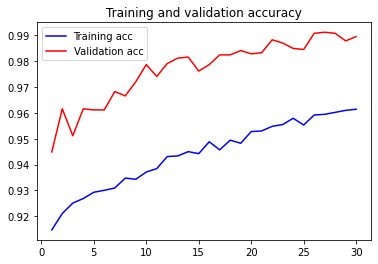

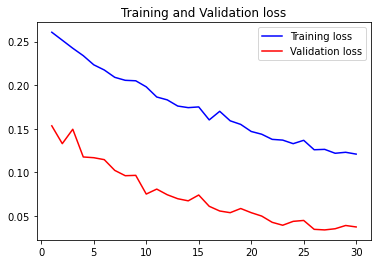

<Figure size 432x288 with 0 Axes>

In [118]:
# Visualizing train/validation loss and accuracy

acc_adagrad = history_adagrad.history['acc']
val_acc_adagrad = history_adagrad.history['val_acc']
loss_adagrad = history_adagrad.history['loss']
val_loss_adagrad = history_adagrad.history['val_loss']

epochs_adagrad = range(1,len(acc_adagrad) +1)

# Plot of accuracy
plt.plot(epochs_adagrad, acc_adagrad, color='blue', label='Training acc')
plt.plot(epochs_adagrad, val_acc_adagrad, color='red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_adagrad, loss_adagrad, color='blue', label='Training loss')
plt.plot(epochs_adagrad, val_loss_adagrad, color='red', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

plt.show()

In [119]:
# ReLU activation function
# Rmsprop optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model3 = tensorflow.keras.Sequential()
model3.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (320, 258, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(.5))
model3.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(12, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 318, 256, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 318, 256, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 159, 128, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 157, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 78, 63, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 76, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 30, 128)      

In [120]:
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9)

model3.compile(loss = "categorical_crossentropy", 
               optimizer=rmsprop, 
               metrics=["acc"])

In [121]:
# Training model with adagrad, 50 epochs and shuffling data
history_rsm = model3.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    shuffle = True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 491 steps, validate for 75 steps
Epoch 1/30
491/491 [==============================] - 278s 567ms/step - loss: 2.0344 - acc: 0.3672 - val_loss: 1.2768 - val_acc: 0.6013
Epoch 2/30
491/491 [==============================] - 275s 560ms/step - loss: 1.2226 - acc: 0.6159 - val_loss: 1.0608 - val_acc: 0.6706
Epoch 3/30
491/491 [==============================] - 311s 632ms/step - loss: 0.9731 - acc: 0.7003 - val_loss: 0.8354 - val_acc: 0.7482
Epoch 4/30
491/491 [==============================] - 312s 636ms/step - loss: 0.9091 - acc: 0.7310 - val_loss: 1.1744 - val_acc: 0.7077
Epoch 5/30
491/491 [==============================] - 315s 641ms/step - loss: 0.8559 - acc: 0.7446 - val_loss: 0.9045 - val_acc: 0.7344
Epoch 6/30
491/491 [==============================] - 314s 640ms/step - loss: 0.8639 - acc: 0.7509 - val_loss: 0.9113 - val_acc: 0.7169
Epoch 7/30
491/491 [==============================] - 344s 700ms/step - loss: 0.9152 - acc:

In [ ]:
# c

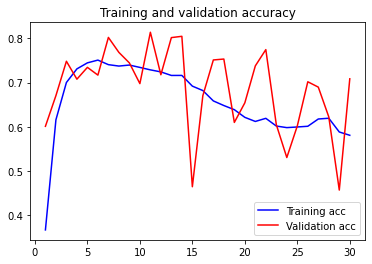

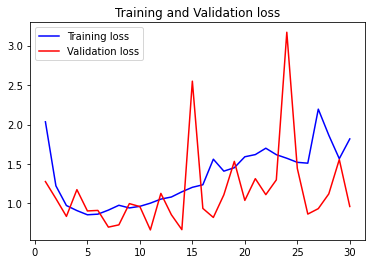

<Figure size 432x288 with 0 Axes>

In [122]:
# Visualizing train/validation loss and accuracy

acc_rsm = history_rsm.history['acc']
val_acc_rsm = history_rsm.history['val_acc']
loss_rsm = history_rsm.history['loss']
val_loss_rsm = history_rsm.history['val_loss']

epochs_rsm = range(1,len(acc_rsm) +1)

# Plot of accuracy
plt.plot(epochs_rsm, acc_rsm, color='blue', label='Training acc')
plt.plot(epochs_rsm, val_acc_rsm, color='red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_rsm, loss_rsm, color='blue', label='Training loss')
plt.plot(epochs_rsm, val_loss_rsm, color='red', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

plt.show()

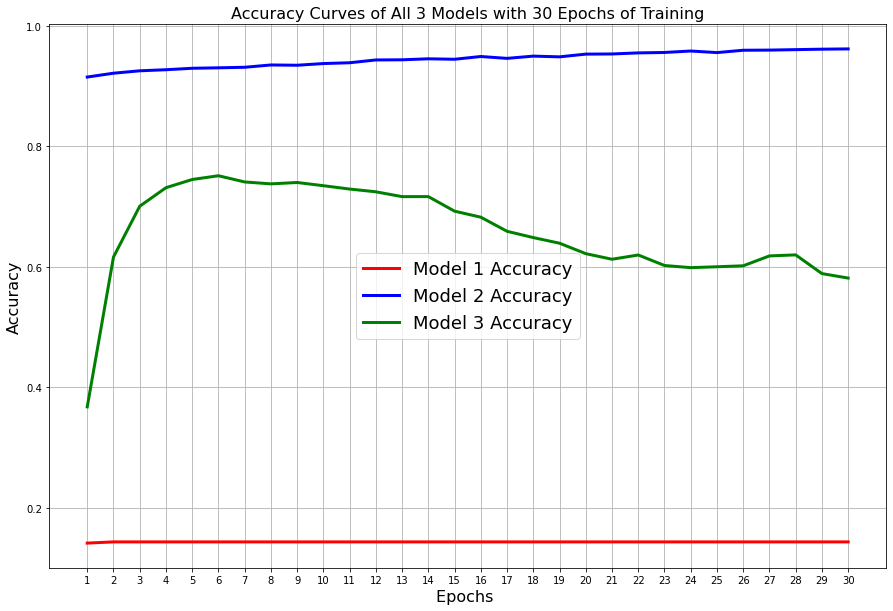

In [124]:
# Plotting all 3 models accuracy scores
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['acc'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['acc'],'b',linewidth=3.0)
plt.plot(history_rsm.history['acc'],'g',linewidth=3.0)
plt.legend(['Model 1 Accuracy', 'Model 2 Accuracy', 'Model 3 Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

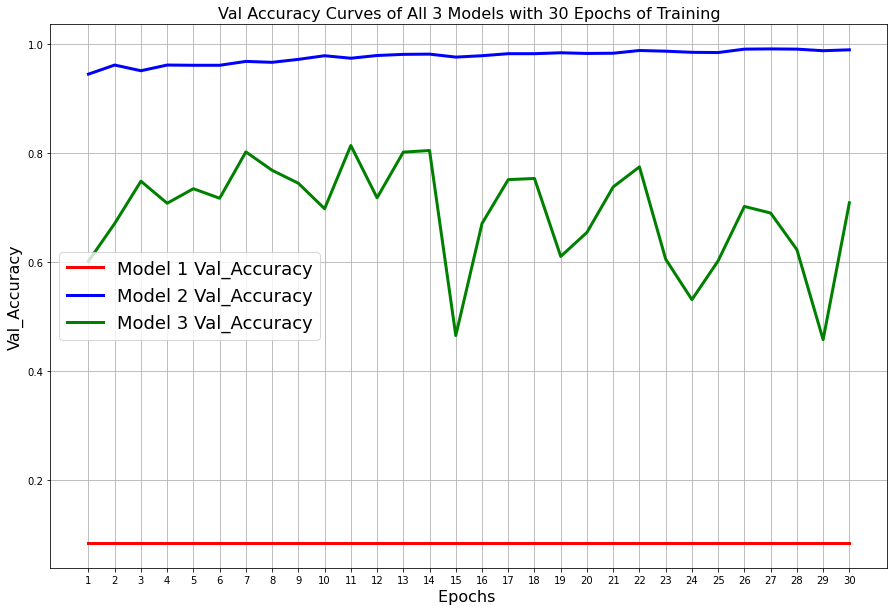

In [126]:
# Plotting all 3 models val accuracy scores
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['val_acc'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['val_acc'],'b',linewidth=3.0)
plt.plot(history_rsm.history['val_acc'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Accuracy', 'Model 2 Val_Accuracy', 'Model 3 Val_Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Val_Accuracy',fontsize=16)
plt.title('Val Accuracy Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

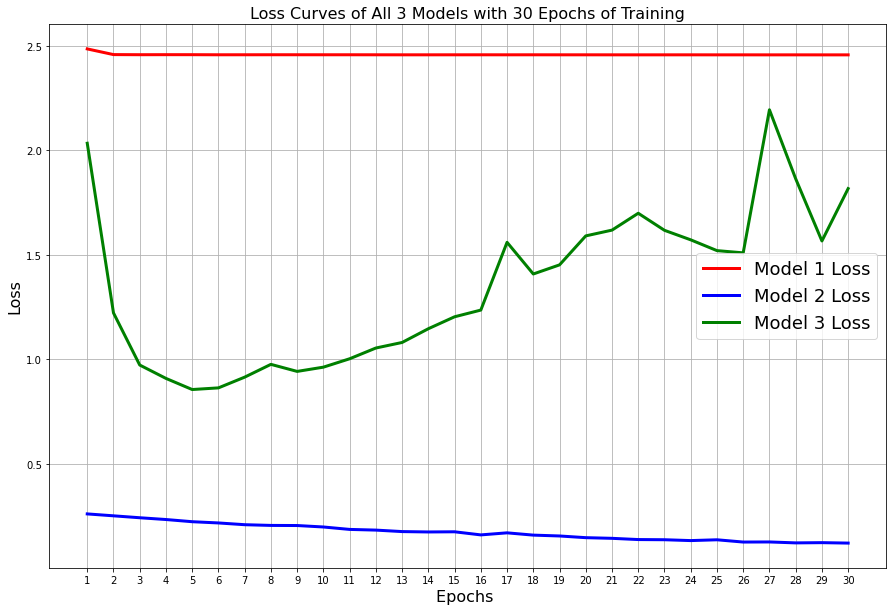

In [128]:
# Plotting all 3 models training losses
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['loss'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['loss'],'b',linewidth=3.0)
plt.plot(history_rsm.history['loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Loss', 'Model 2 Loss', 'Model 3 Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

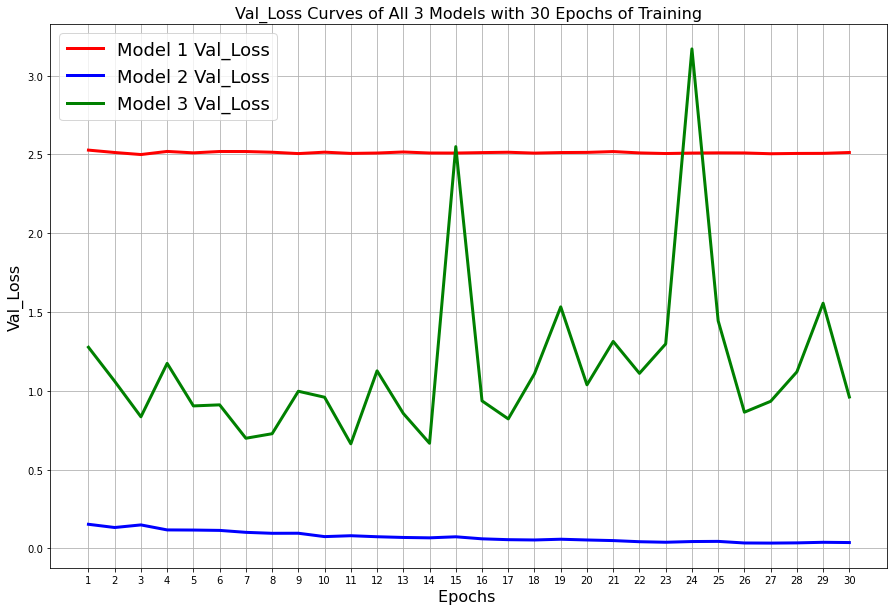

In [129]:
# Plotting Val Loss Curves for all 3 Models
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['val_loss'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['val_loss'],'b',linewidth=3.0)
plt.plot(history_rsm.history['val_loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Loss', 'Model 2 Val_Loss', 'Model 3 Val_Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Val_Loss',fontsize=16)
plt.title('Val_Loss Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

In [154]:
# display some randomly augmented pictures

from keras.preprocessing import image
train_apples_dir = './Downloads/simpsons_dataset_small/train'

fnames = [os.path.join(train_dir, fname) for
          fname in os.listdir(train_dir)]

img_path = fnames[6]  #choosing an image to augment

img = image.load_img(img_path, target_size = (320, 258))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
    
plt.show()

PermissionError: [Errno 13] Permission denied: './Downloads/simpsons_dataset_small\\train\\lisa_simpson'

In [ ]:
'''
d) Display some channels in every intermediate activations and explain why this is useful.
'''

In [147]:
# --------------------------
# PROCESSING A SINGLE IMAGE |
# --------------------------

img_path = './Downloads/simpsons_dataset_small/test/abraham_grampa_simpson/abraham_grampa_simpson_17.jpg'

img = image.load_img(img_path, target_size=(320, 258))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # the model was trained on inputs that were preprocessed this way

print(img_tensor.shape)

(1, 320, 258, 3)


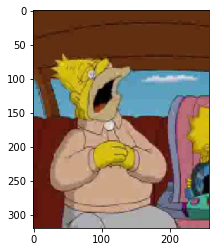

In [148]:
# ----------------------------
# DISPLAYING THE TEST PICTURE |
# ----------------------------

plt.imshow(img_tensor[0])
plt.show()

In [149]:
# Instantiaing a model from an input tensor and a list of output tensors

# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [150]:
# Running the model in predict mode

# returns a lsit of 5 numpy arrays: 1 array per layer activations
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 318, 256, 32)


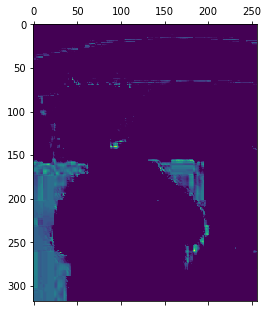

In [151]:
# Visualizing the fourth channel

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

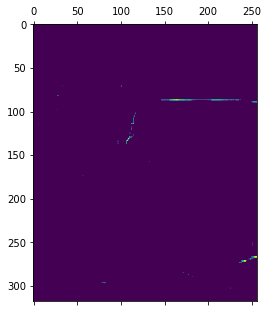

In [152]:
# Visualizing the seventh channel

plt.matshow(first_layer_activation [0, :, :, 7], cmap='viridis')

In [ ]:
# ----------------------------
# EXPLAIN WHY THIS IS USEFUL |
# ---------------------------

#"Intermediate activations are useful for understanding how successive
# convnet layers transform their input, and for getting a first idea of the
# meaning of indivisual convnet filters.
# Visualizing intermediate ativations consists of displaying th feature maps
# that are output by various convolution and pooling layers in a network, 
# given a certain output. This gives a view into how an input is decomposed
# into different filters learned by the network. Each channel encodes
# relatively independent features, so the proper way to visualize these
# feature maps is by indepently plotting the conetnes of every channel as a
# 2D image" - Francois Chollet "DEEP LEARNING with Python"

Image tensor shape:  (1, 320, 258, 3)


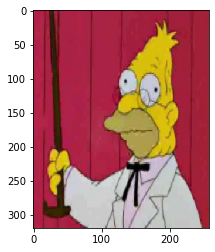

In [157]:
#Visualizing intermidiate activations

# get the image from the test set

img_path = "./Downloads/simpsons_dataset_small/test/abraham_grampa_simpson/abraham_grampa_simpson_43.jpg"

import numpy as np
img1 = image.load_img(img_path, target_size = (320, 258))
img_tensor = image.img_to_array(img1)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print("Image tensor shape: ", img_tensor.shape)

#display the test image

plt.imshow(img_tensor[0])
plt.show()

In [158]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor) #returns a list of five numpy arrays

n_col: 2
n_col: 2


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


n_col: 2
n_col: 4
n_col: 4
n_col: 8
n_col: 8
n_col: 8


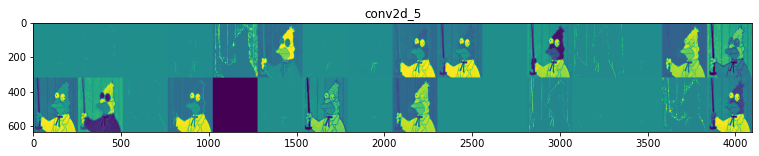

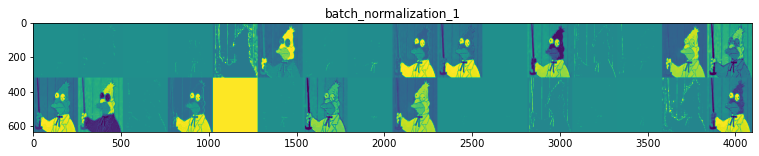

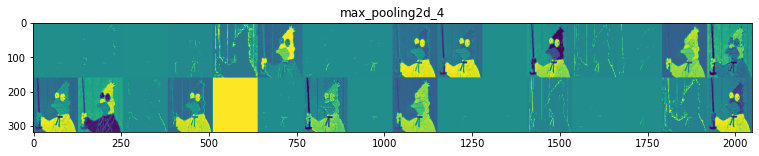

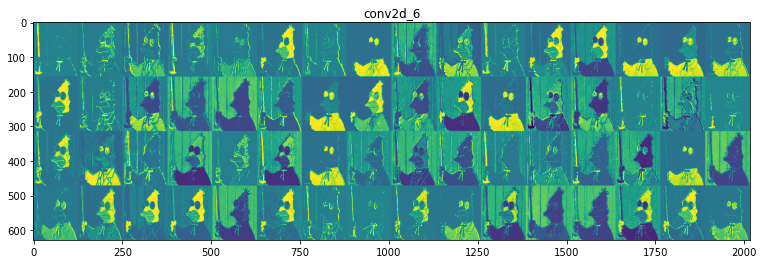

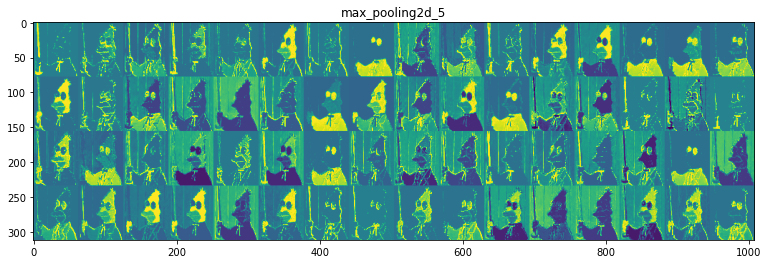

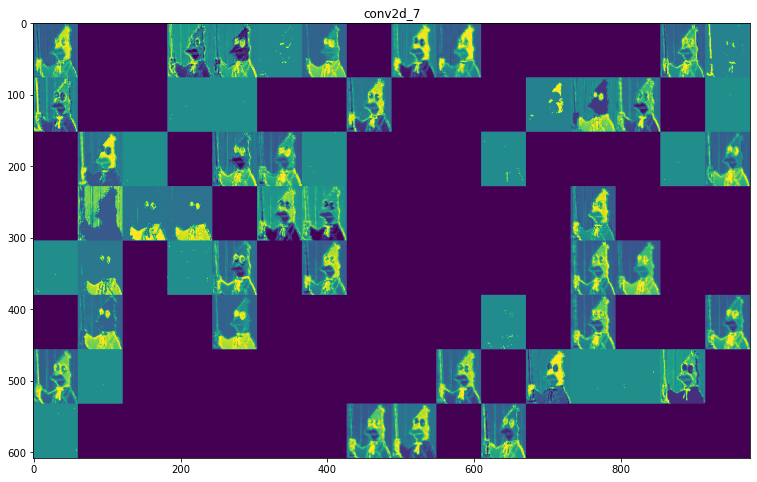

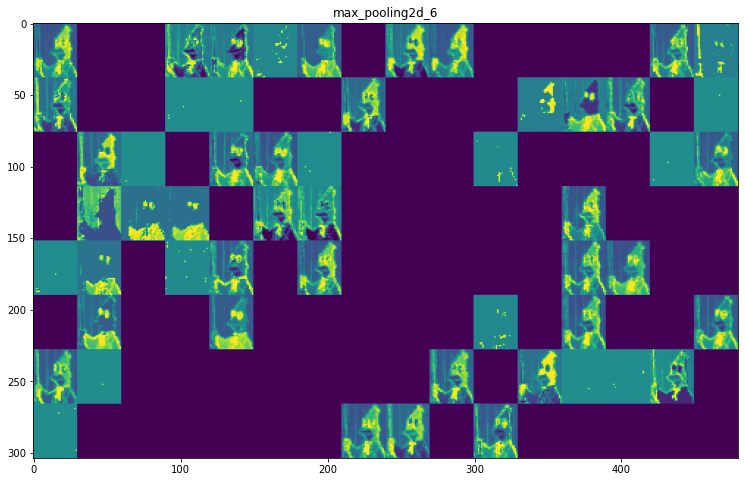

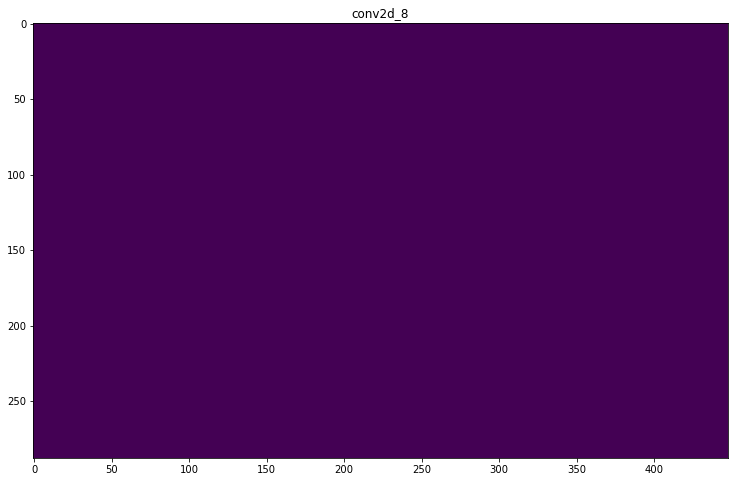

In [159]:
# name of the layers..

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
   

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
   
    size = layer_activation.shape[1]
    size2 = layer_activation.shape[2]
    n_cols = n_features // images_per_row
   
    display_grid = np.zeros((size * n_cols, images_per_row * size2))
    print("n_col:", n_cols)
   
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
           # print("col: ", col)
            #print("row: ", row)
            #print("size: ", size)
            display_grid[col * size : (col+1) * size,
                         row * size2 : (row + 1) * size2] = channel_image
           
    scale = 1./ size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [ ]:
'''
e) Visualize (display) convolutional filters: get the gradient of the loss with regard to 
the input, apply stochastic gradient edscent, include a code for filter visualizations and 
generate a grid of some filter response patterns in a layer.
'''

In [169]:
# ----------------------------------------------------
# DEFINING THE LOSS TENSOR FOR FILTER VISUALATIZATION |
# ----------------------------------------------------

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [170]:
# ------------------------------------------------------------
# OBTAINING THE GRADIENT OF THE LOSS WITH REGARD TO THE INPUT |
# ------------------------------------------------------------

grads = K.gradients(loss, model.input)[0]  
# the call to gradients returns a list of tensors (of size 1 in this case)
# keeps only the 1st elements which is a tensor

In [171]:
# -----------------------------
# GRADIENT-NORMALIZATION TRICK |
# -----------------------------

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# add 1e-5 before dividing to avoid accidentally dividing by 0

In [172]:
# ------------------------------------------------------
# FETCHING NUMPY OUTPUT VALUES GIVEN NUMPY INPUT VALUES |
# ------------------------------------------------------

iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 320, 258, 3))])

In [173]:
# --------------------------------------------------
# LOSS MAXIMIZATION VIA STOCHASTIC GRADIENT DESCENT |
# --------------------------------------------------

input_img_data = np.random.random((1, 320, 258, 3)) * 20 + 128.
# starts from a grey image with some noise

step = 1.  # magnitude of each gradient update
for i in range(40):  # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])
    # computes the loss value and gradient value
    
    input_img_data += grads_value * step
    # adjusts the input image in the direction that maximizes the loss

In [174]:
# --------------------------------------------------------
# UTILITY FUNCTION TO CONVERT A TENSOR INTO A VALID IMAGE |
# --------------------------------------------------------

def deprocess_image(x):
    # Normalizes the tensorL centers on 0, ensure that std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # Clips to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # Converts to an RBG array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

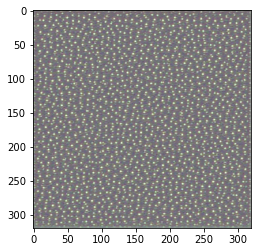

In [175]:
# -------------------------------------------
# FUNCTION TO GENERATE FILTER VISUALIZATIONS |
# -------------------------------------------

def generate_pattern(layer_name, filter_index, size=320):
    # Builds a loss function that maximizes that activation of the nth
    # filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Computes the gradient of the input picture with regard to this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalization trickL normalizes the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # Returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # Starts from a grey image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    # Runs gradient ascent for 30 steps
    step = 1.
    for i in range(30):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

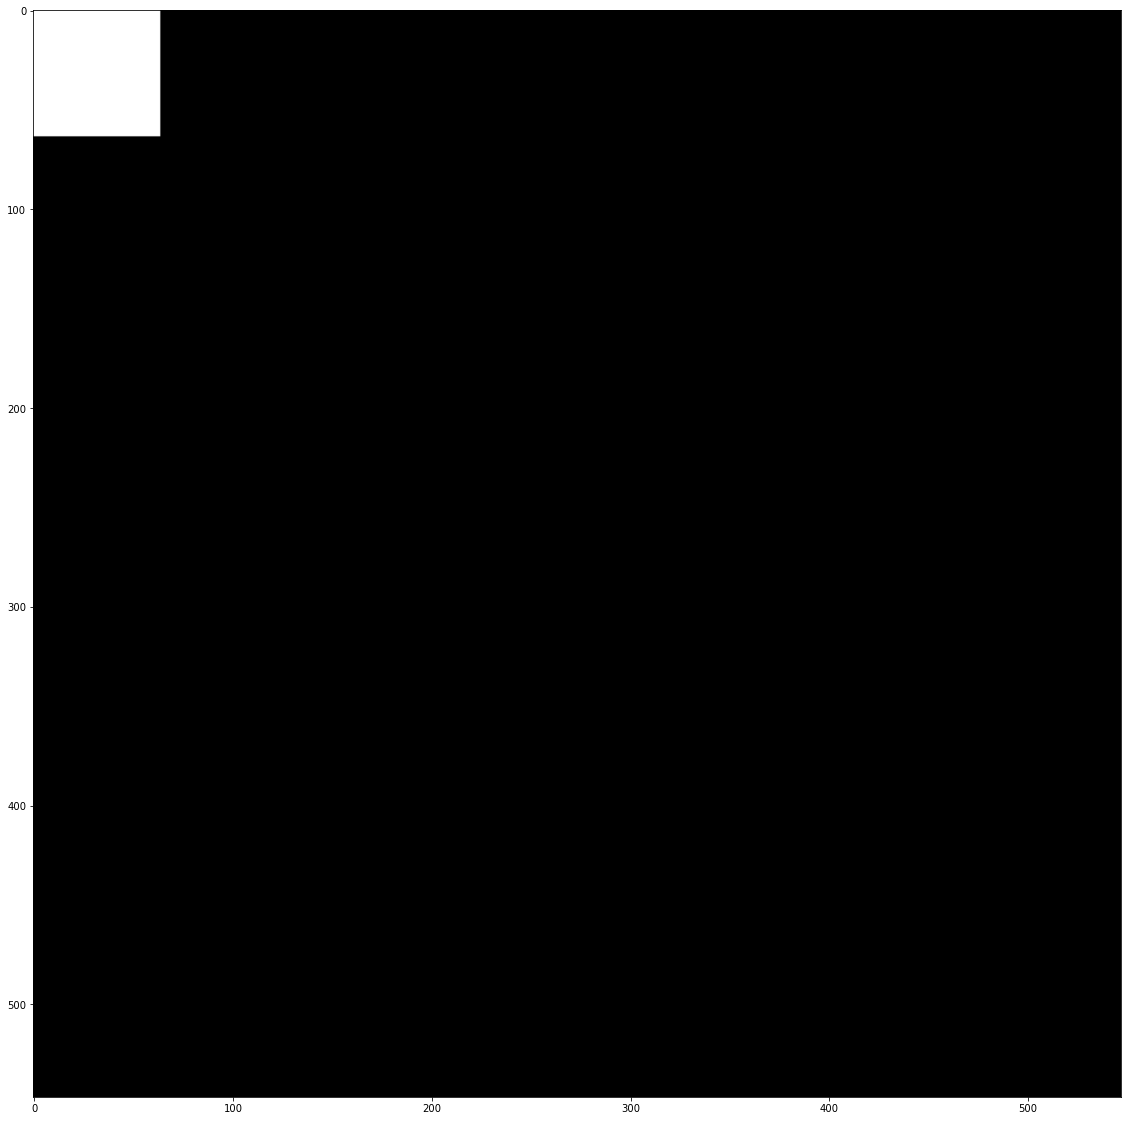

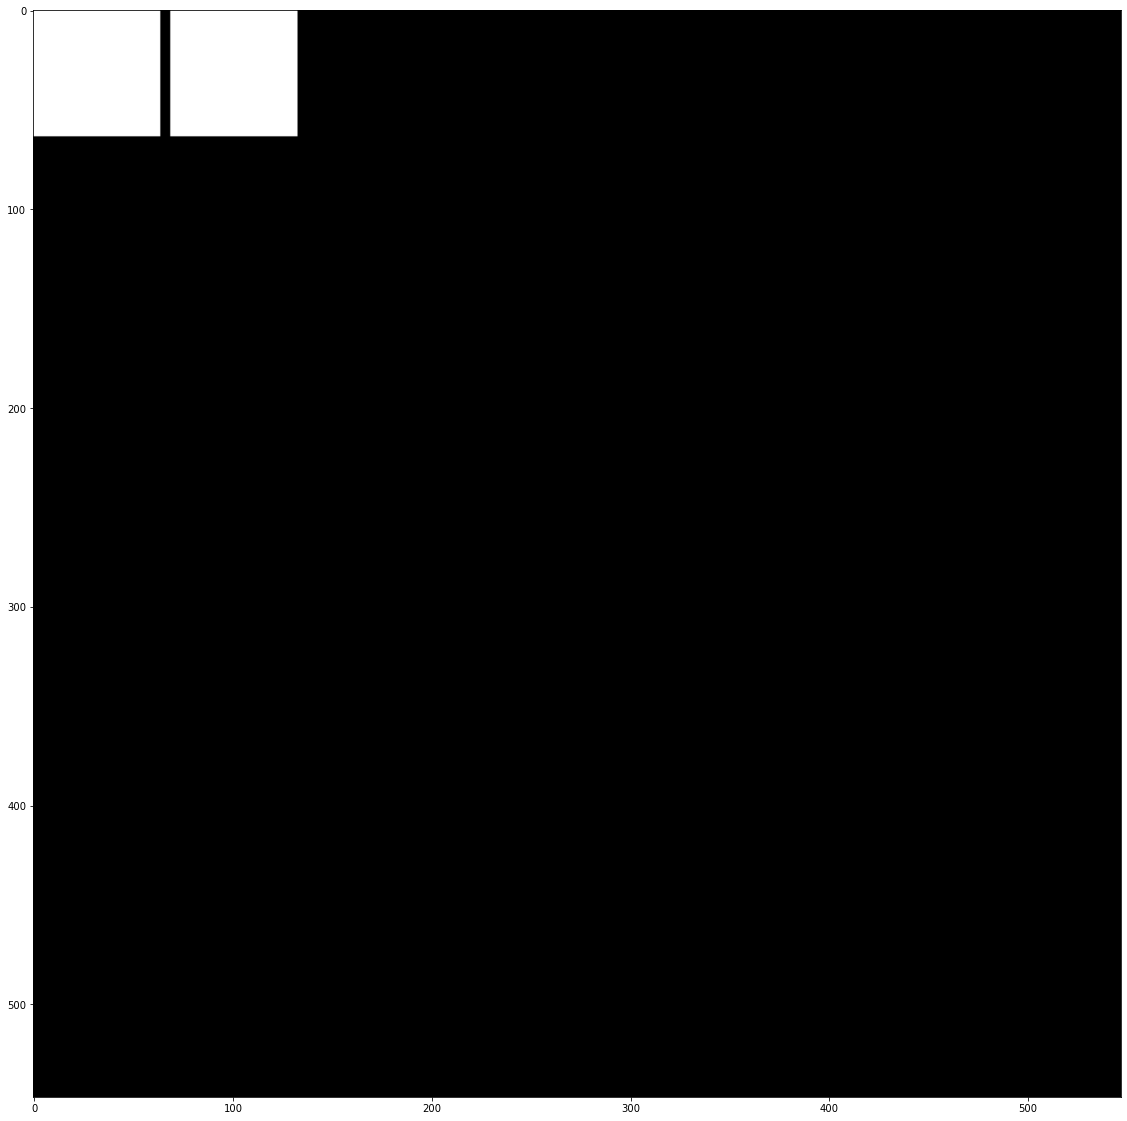

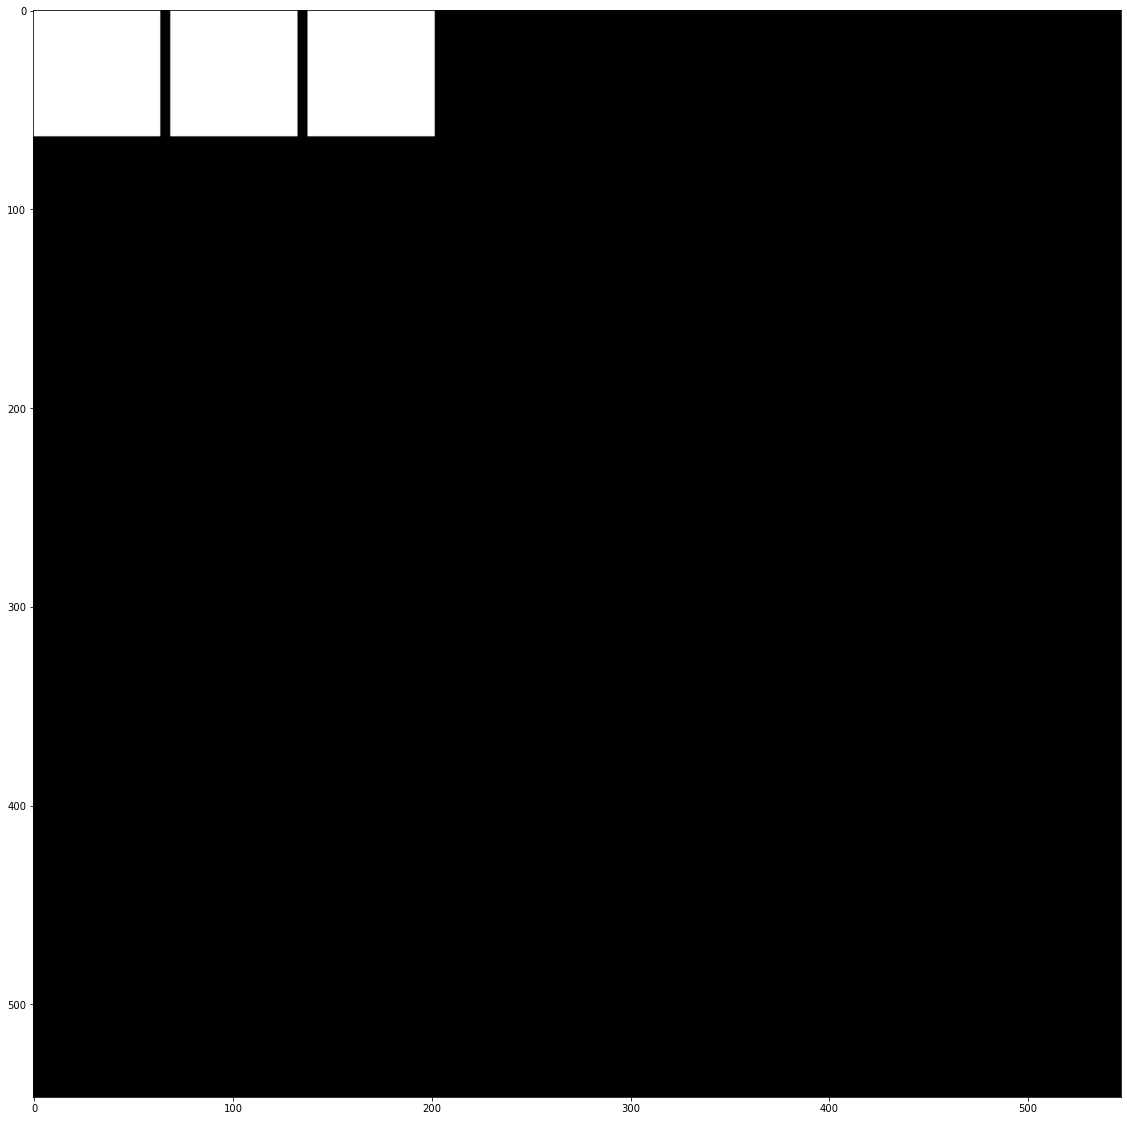

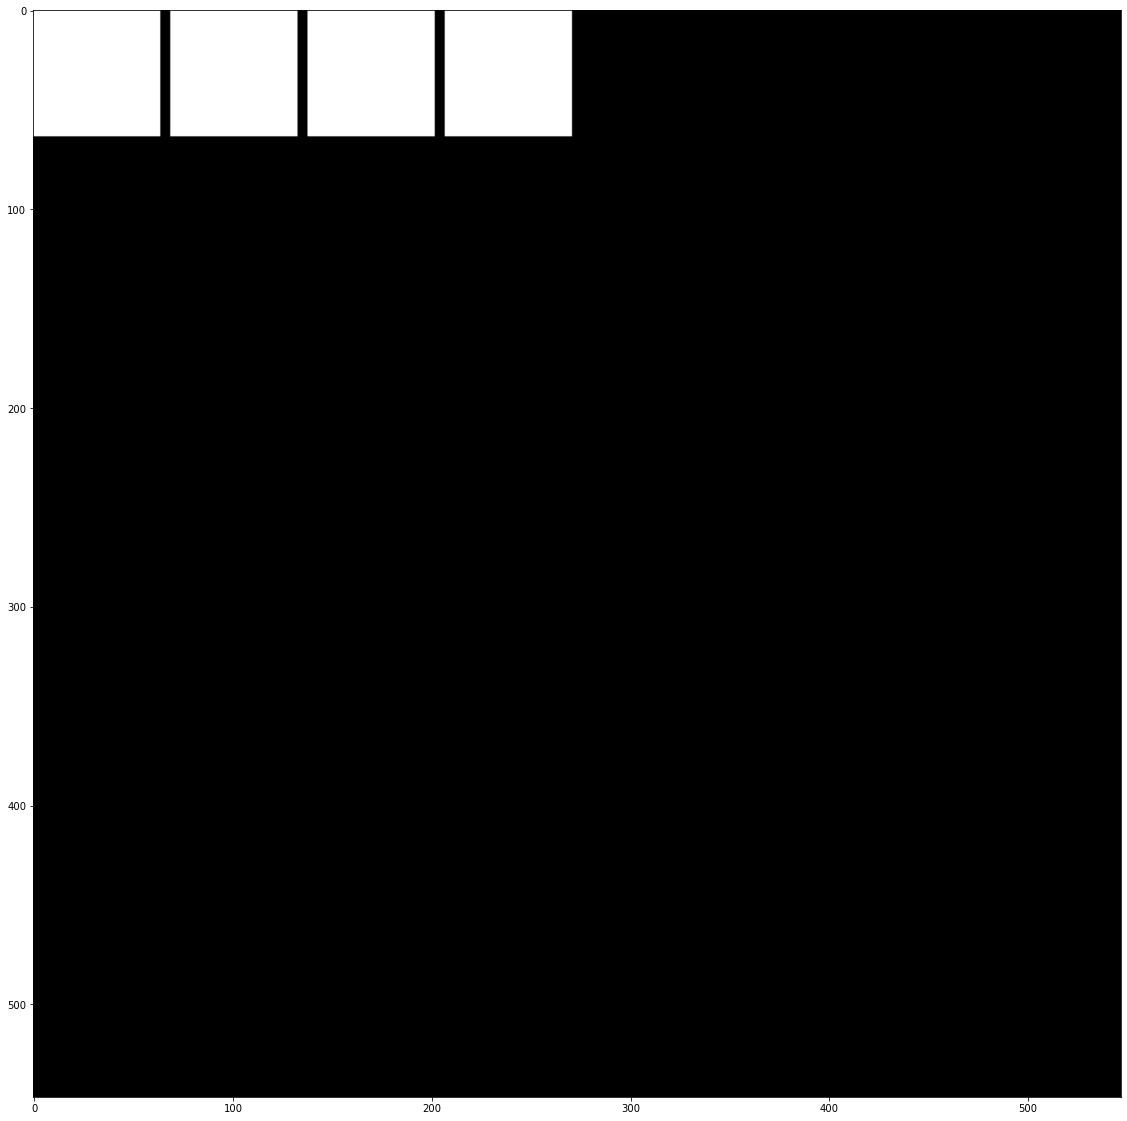

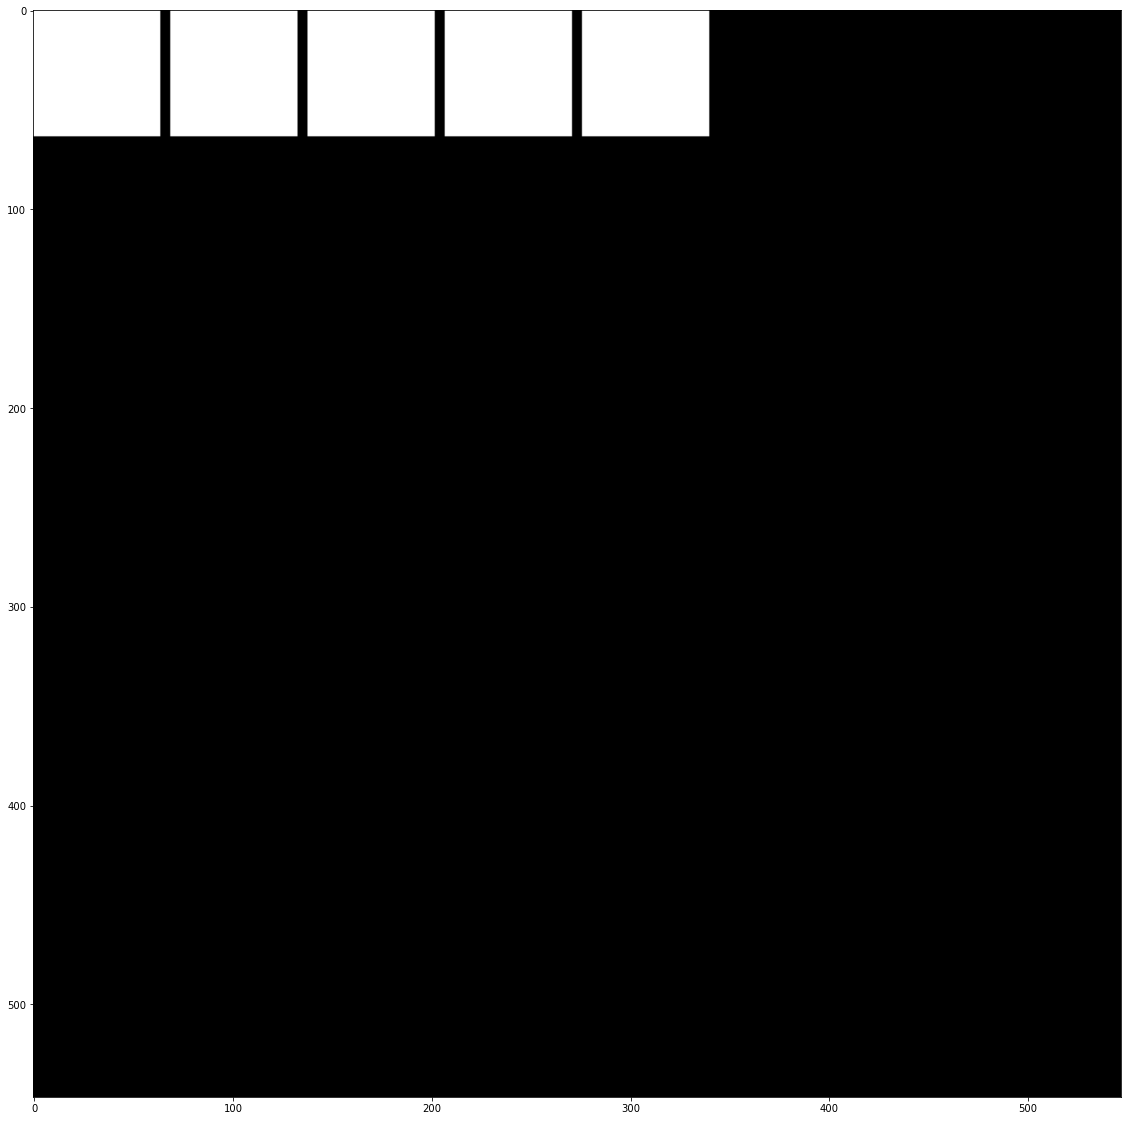

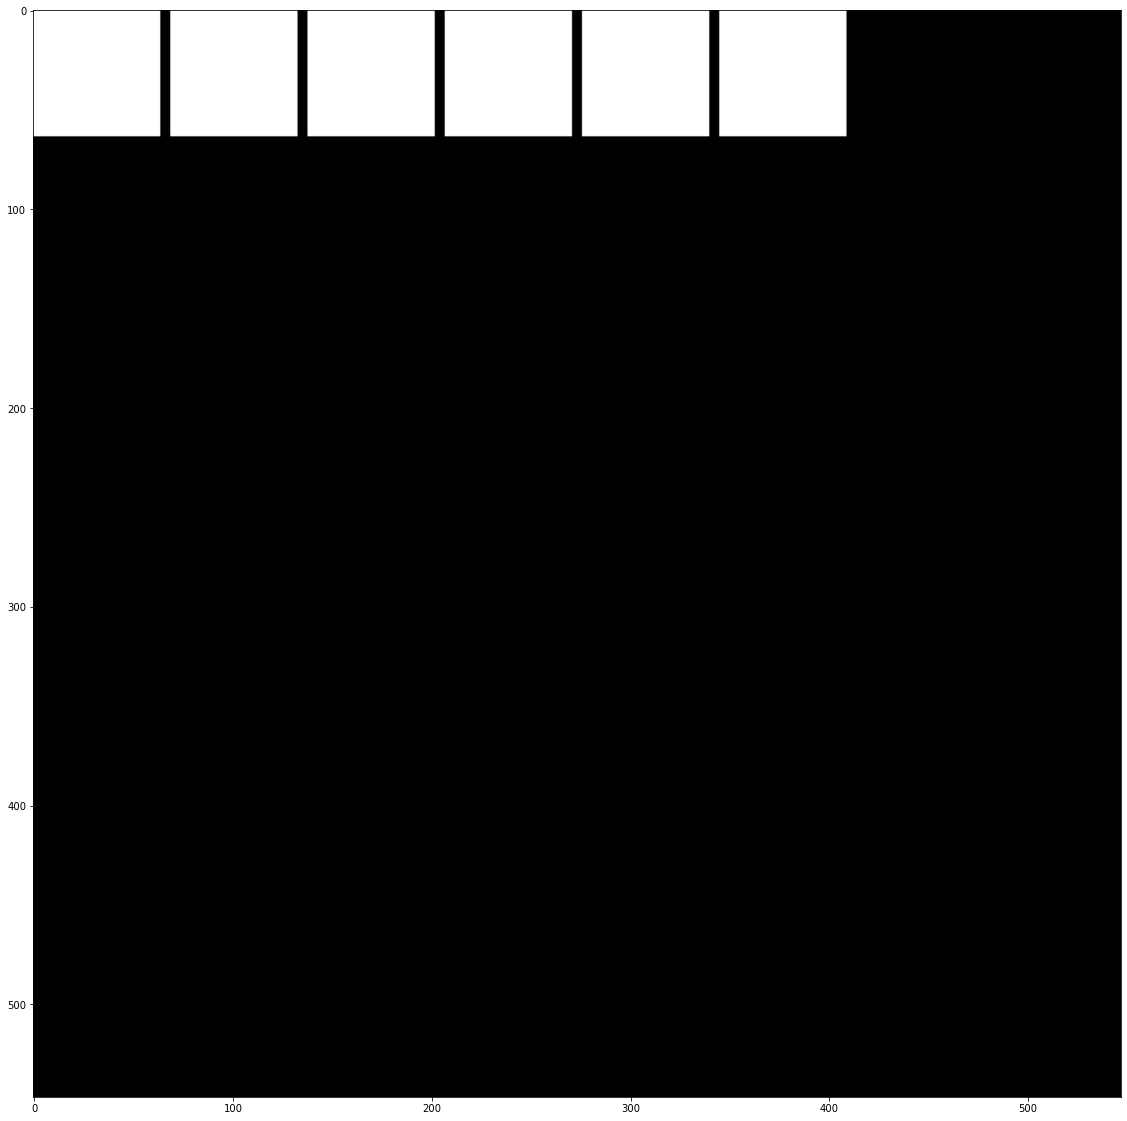

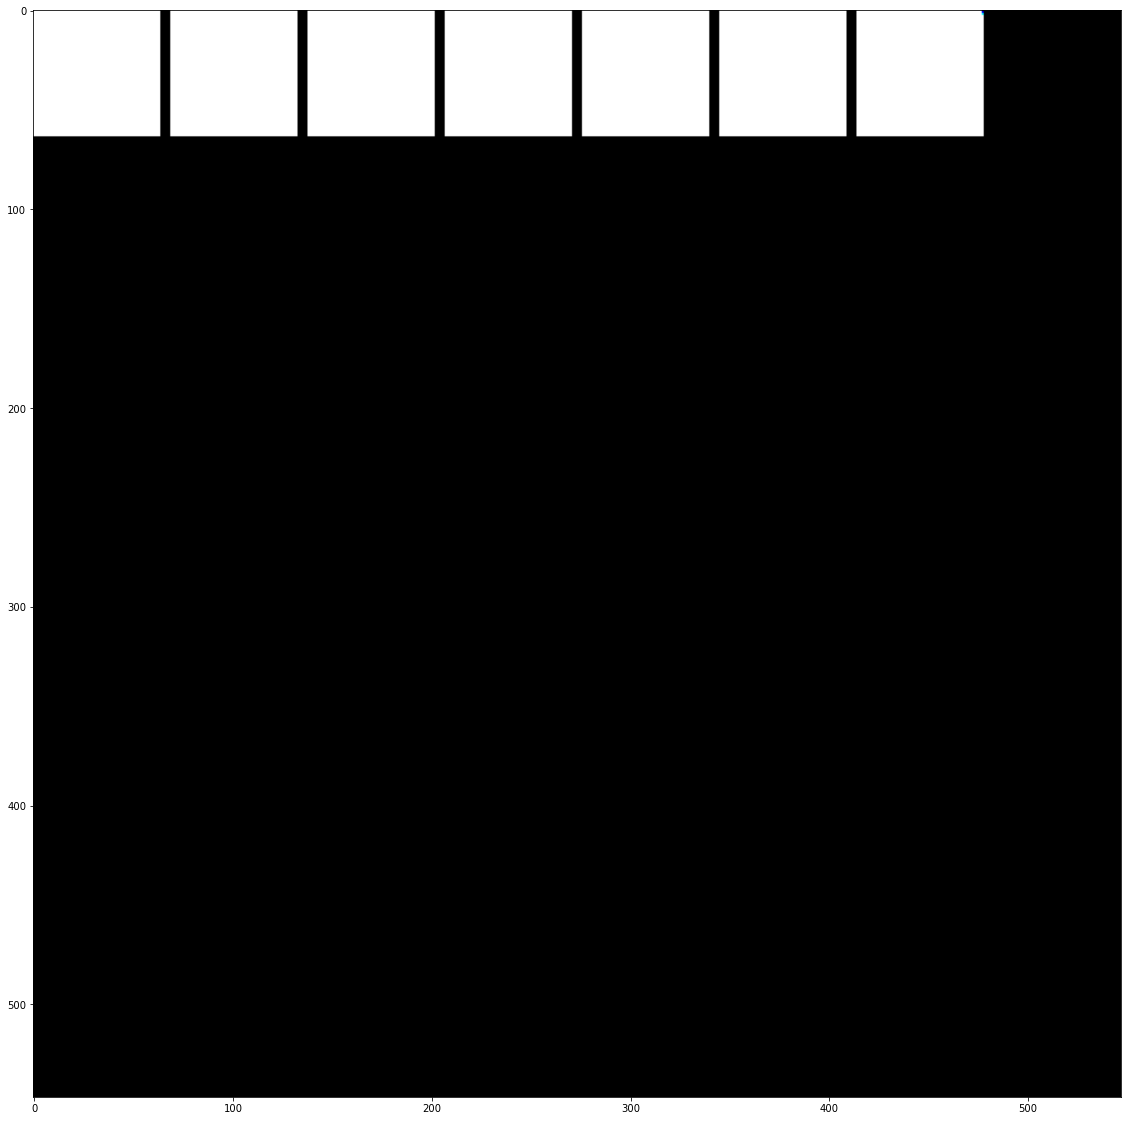

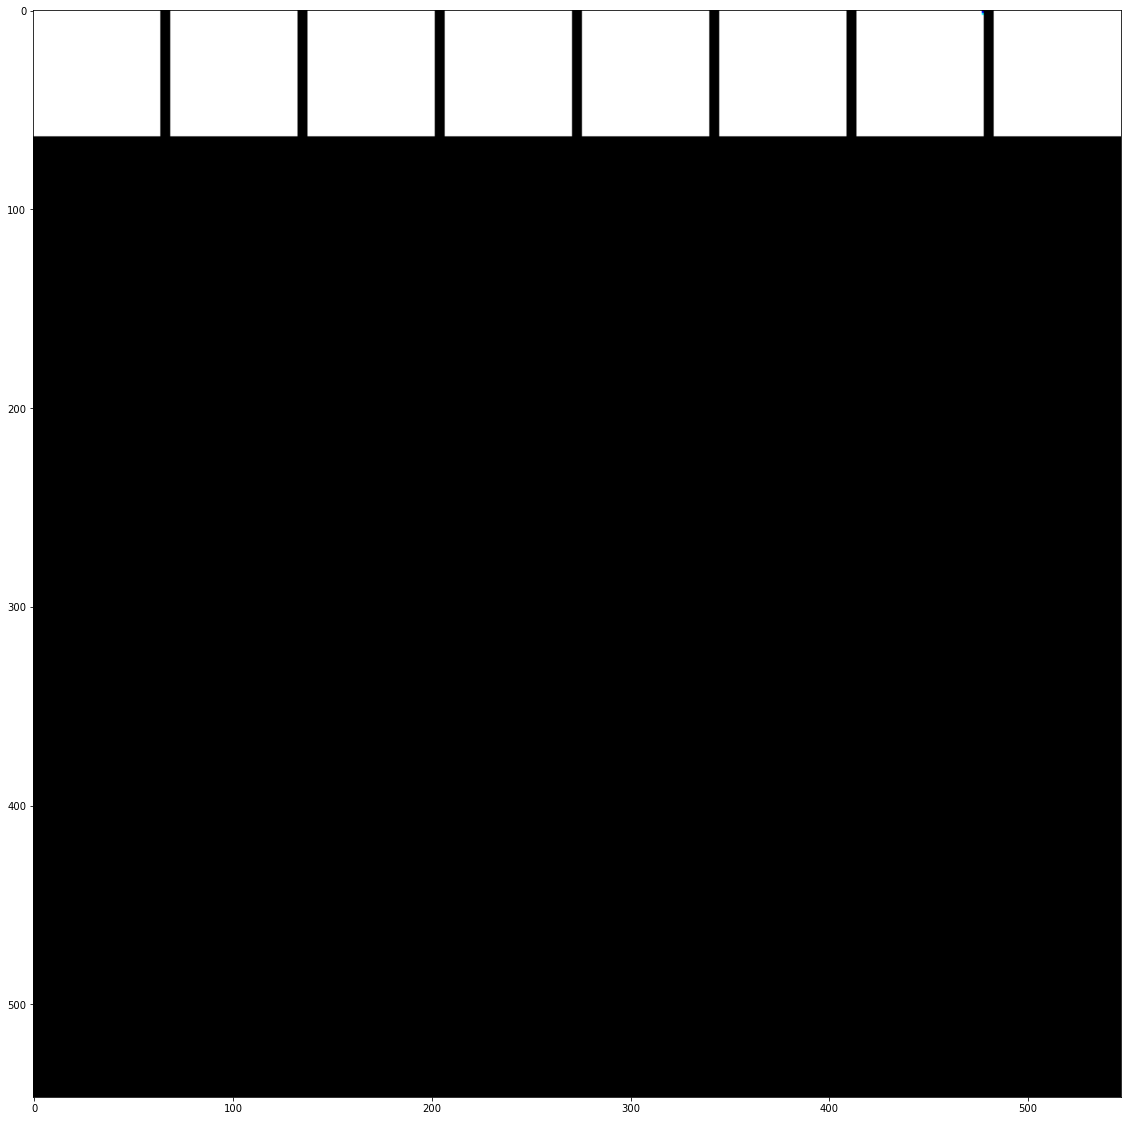

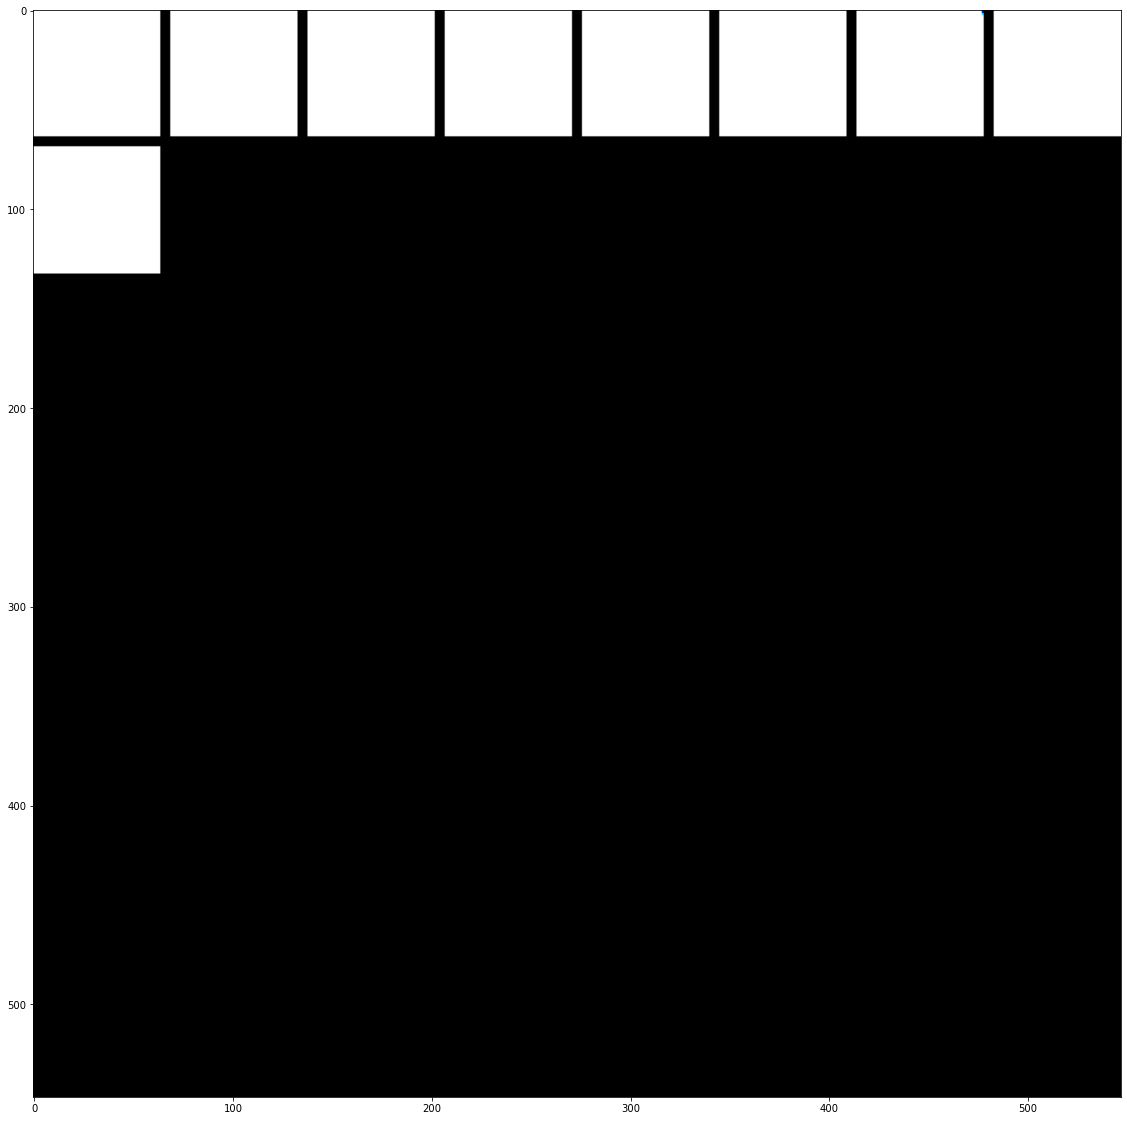

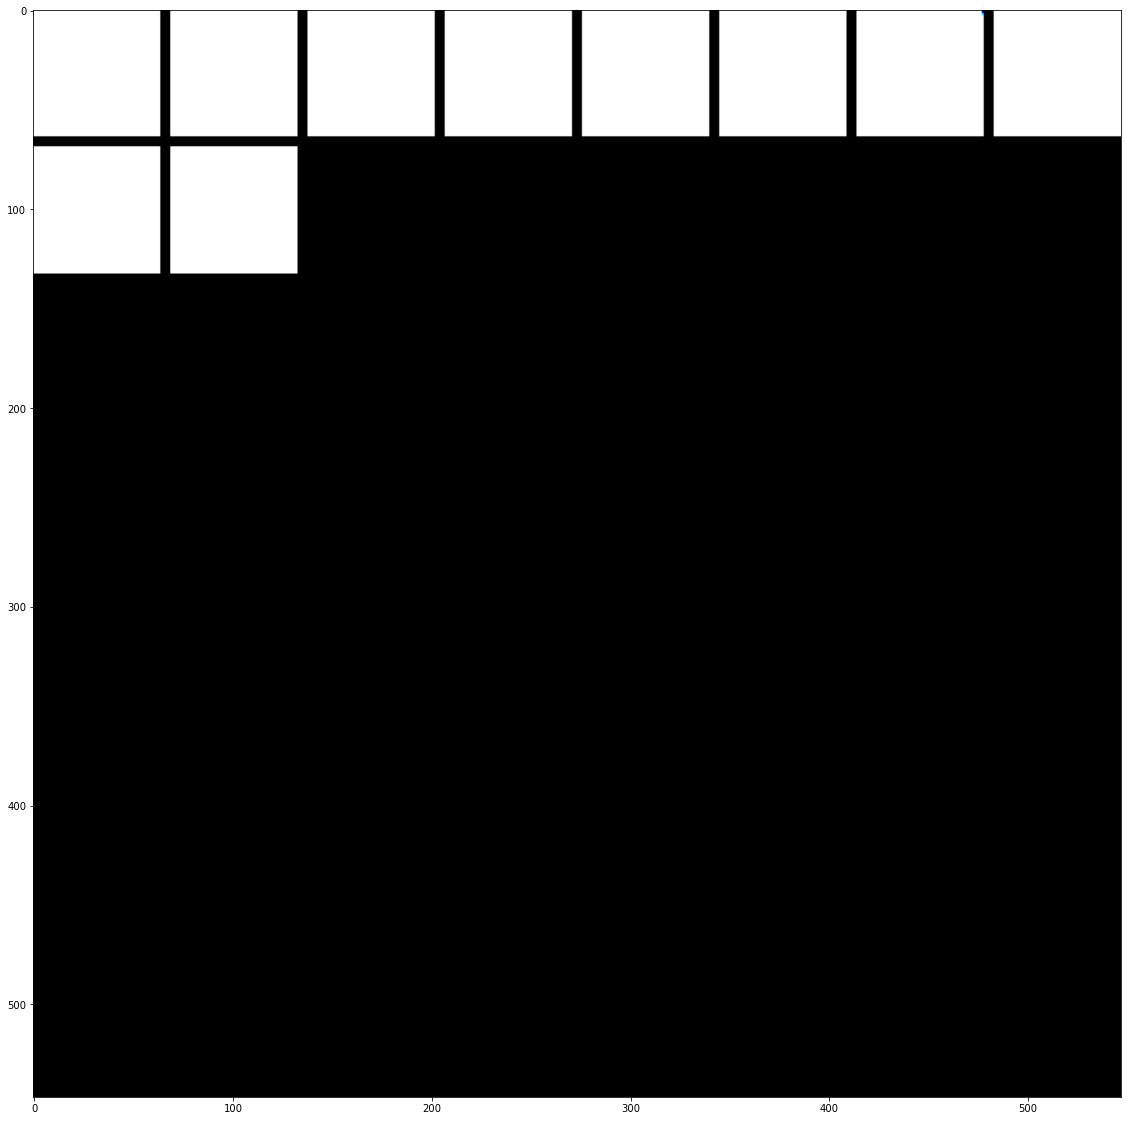

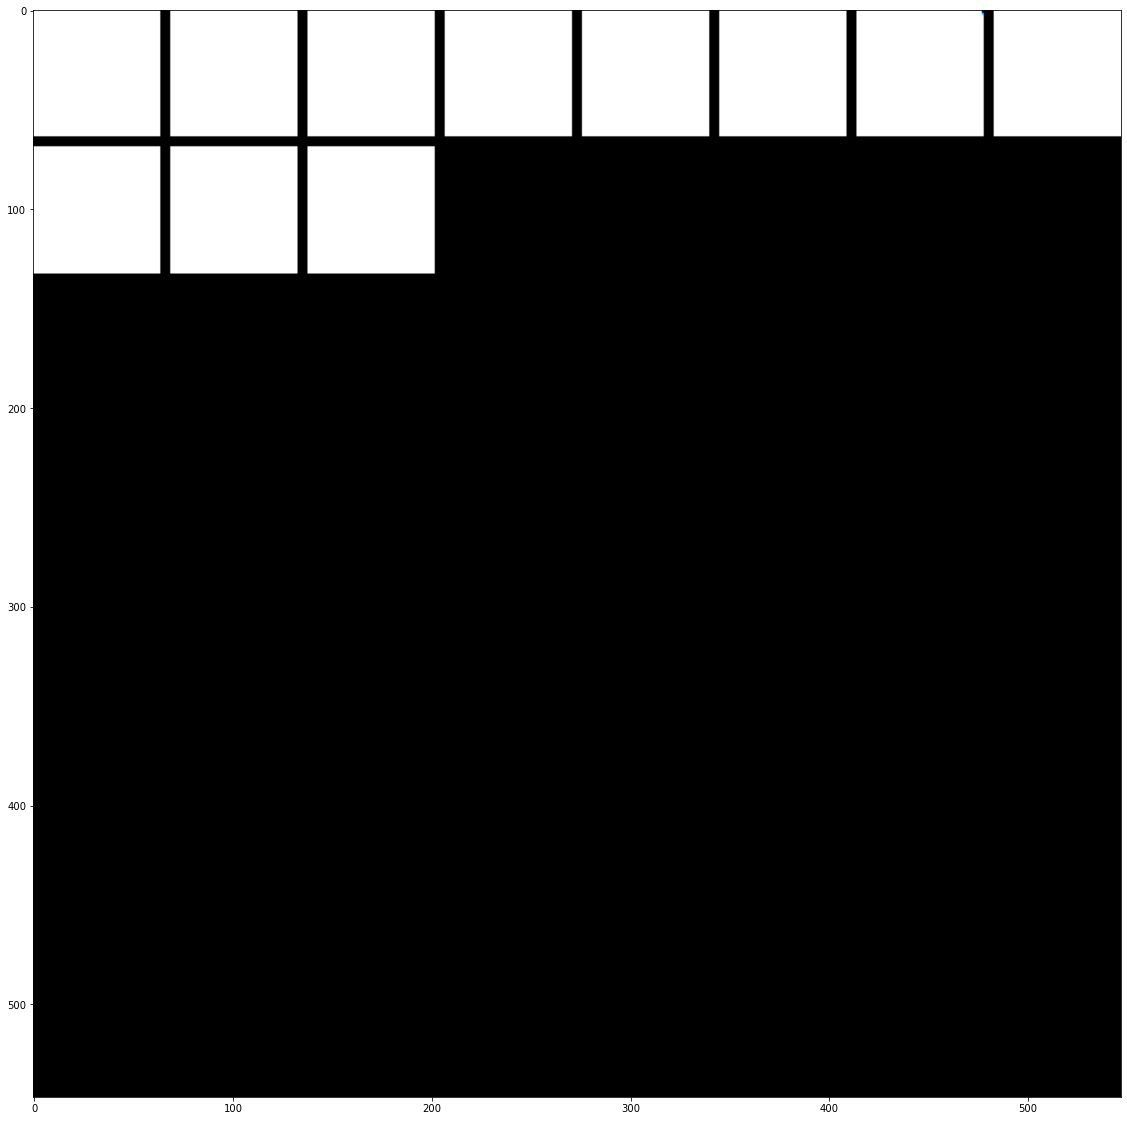

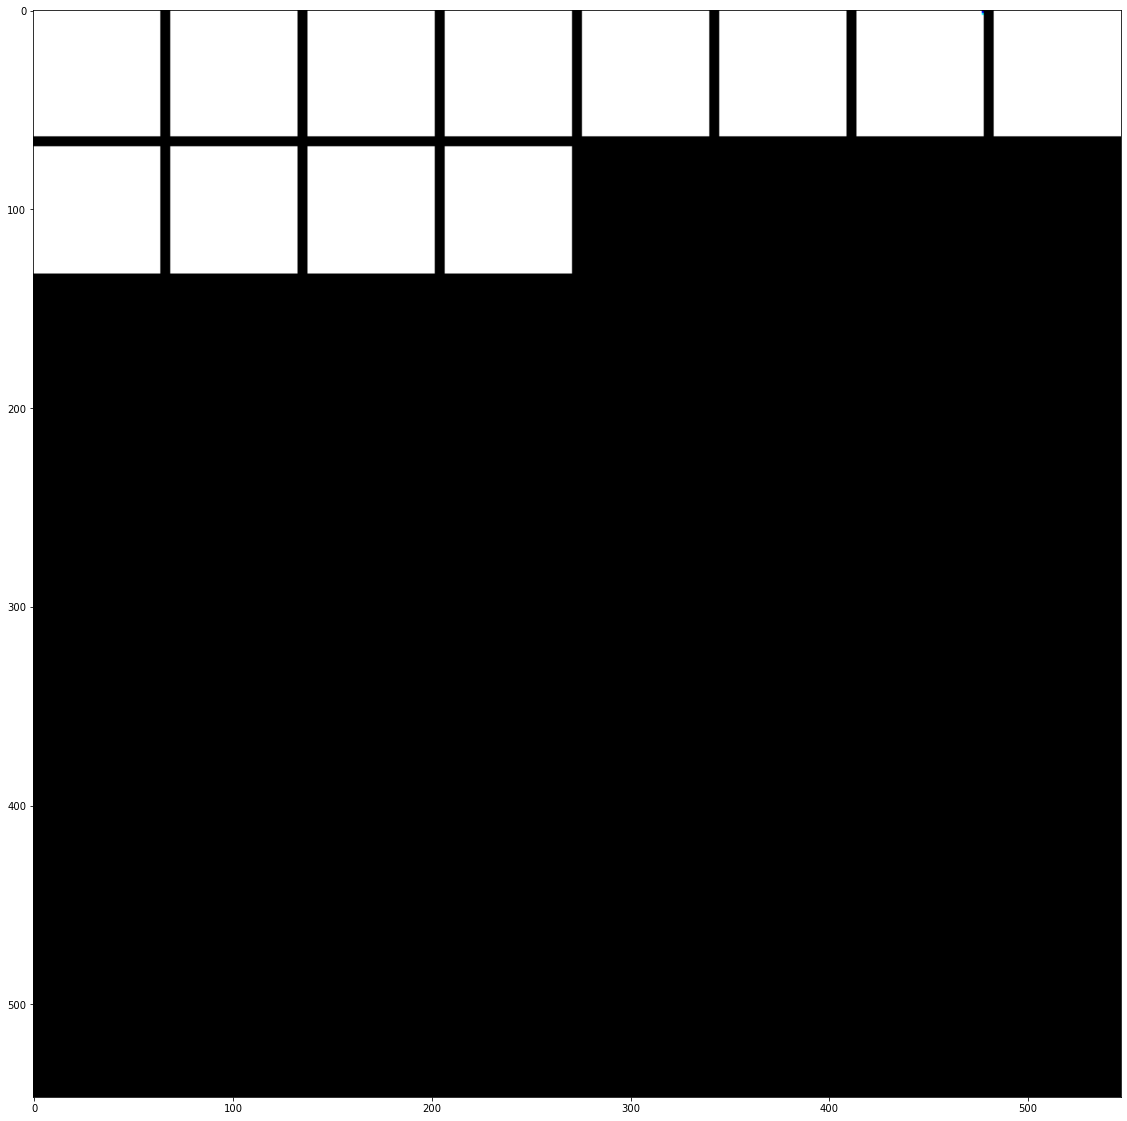

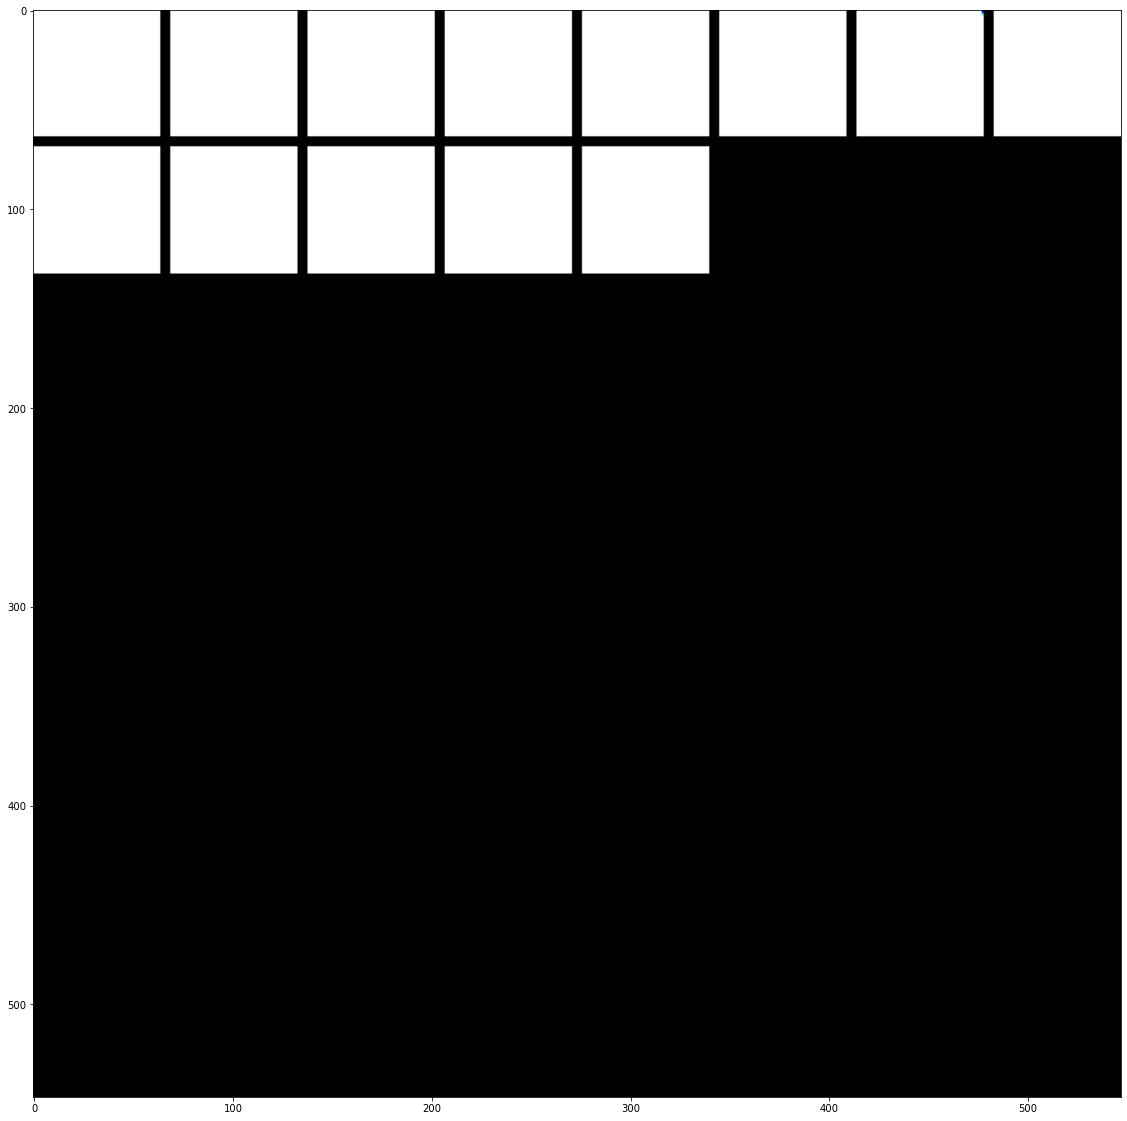

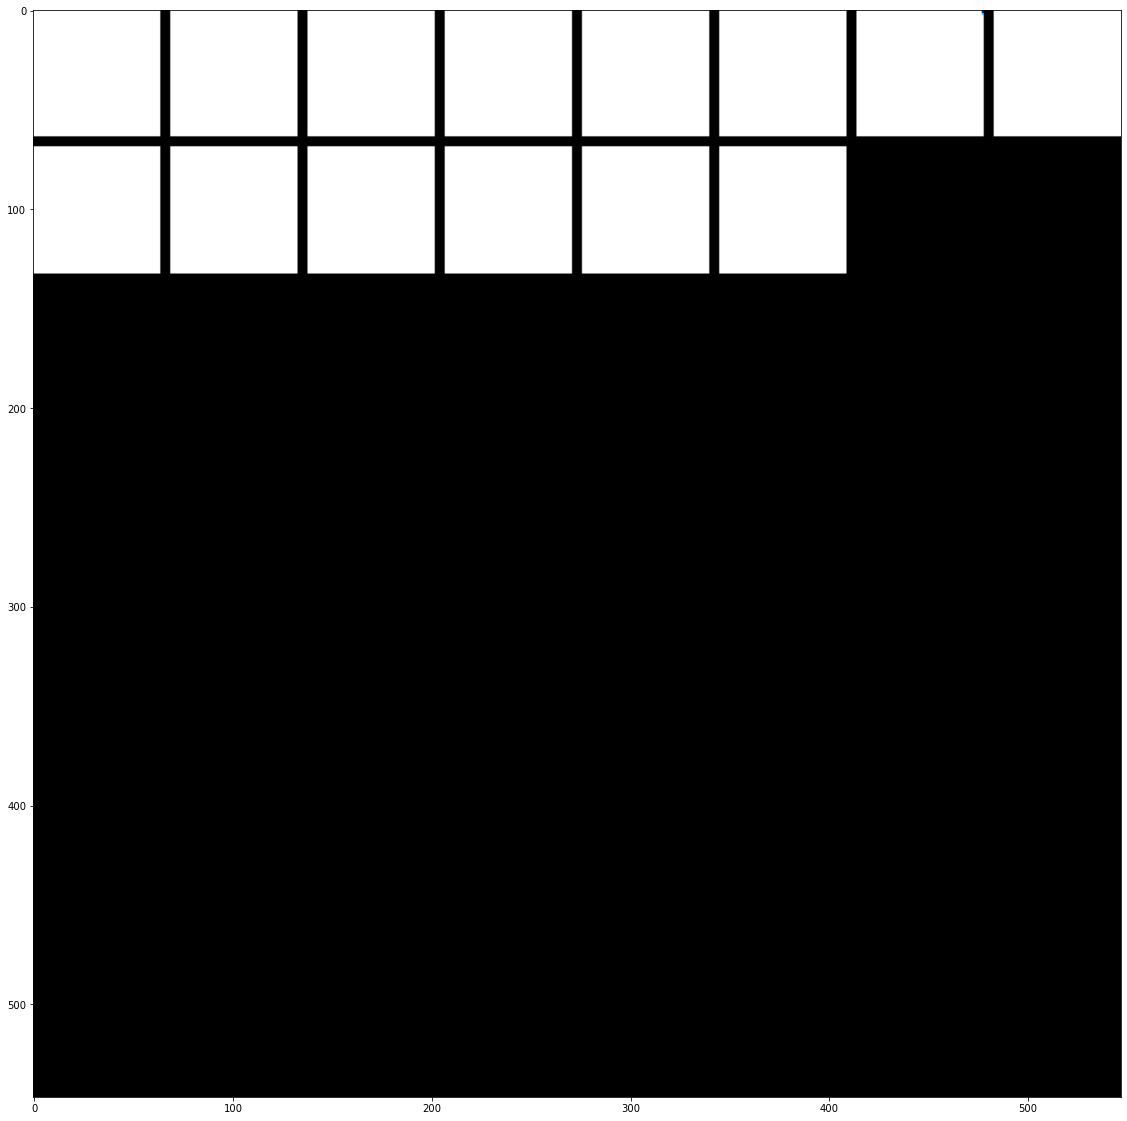

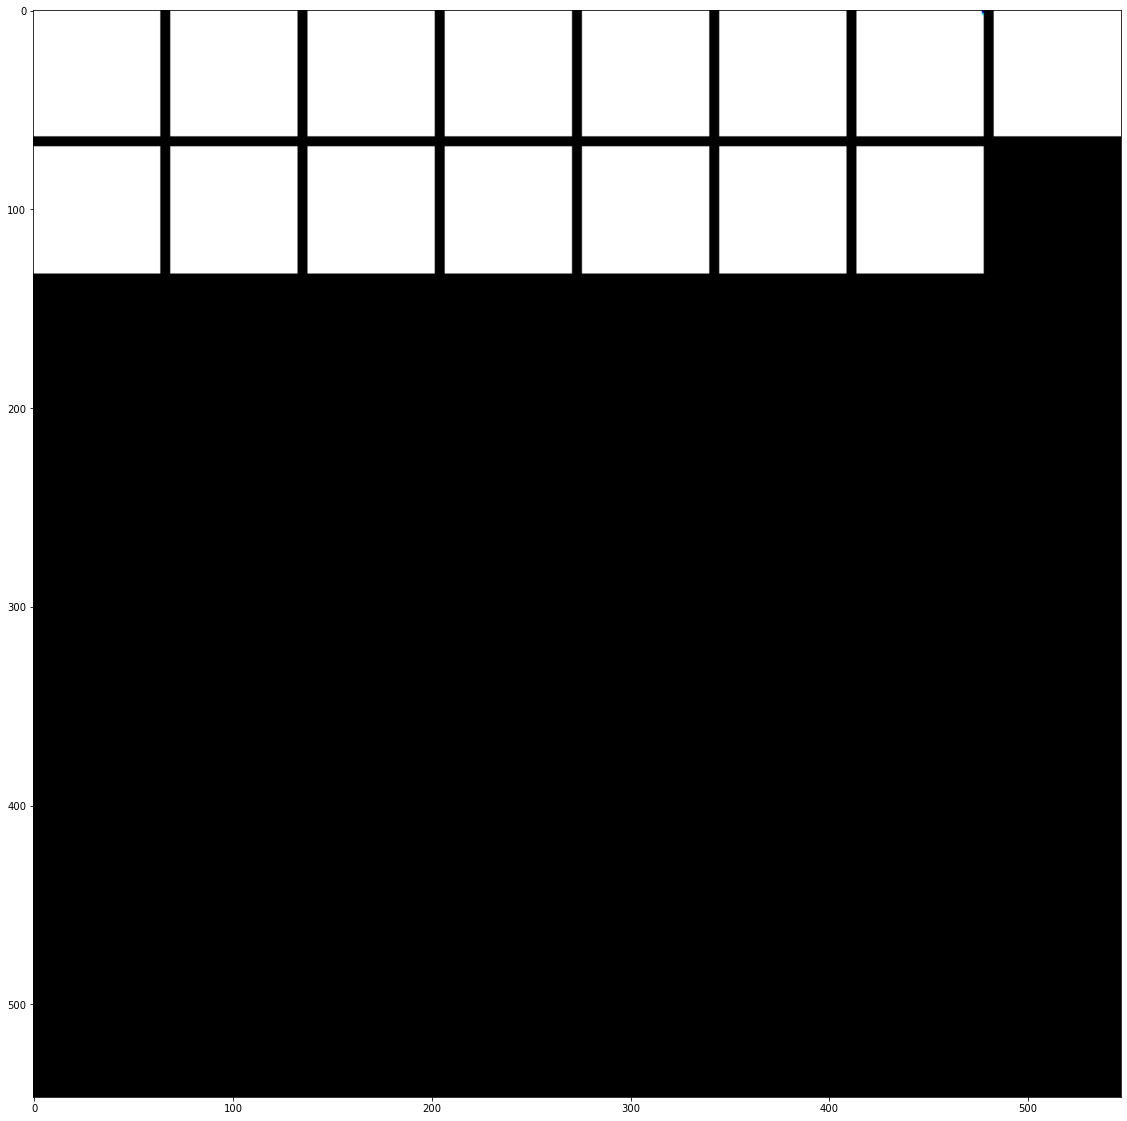

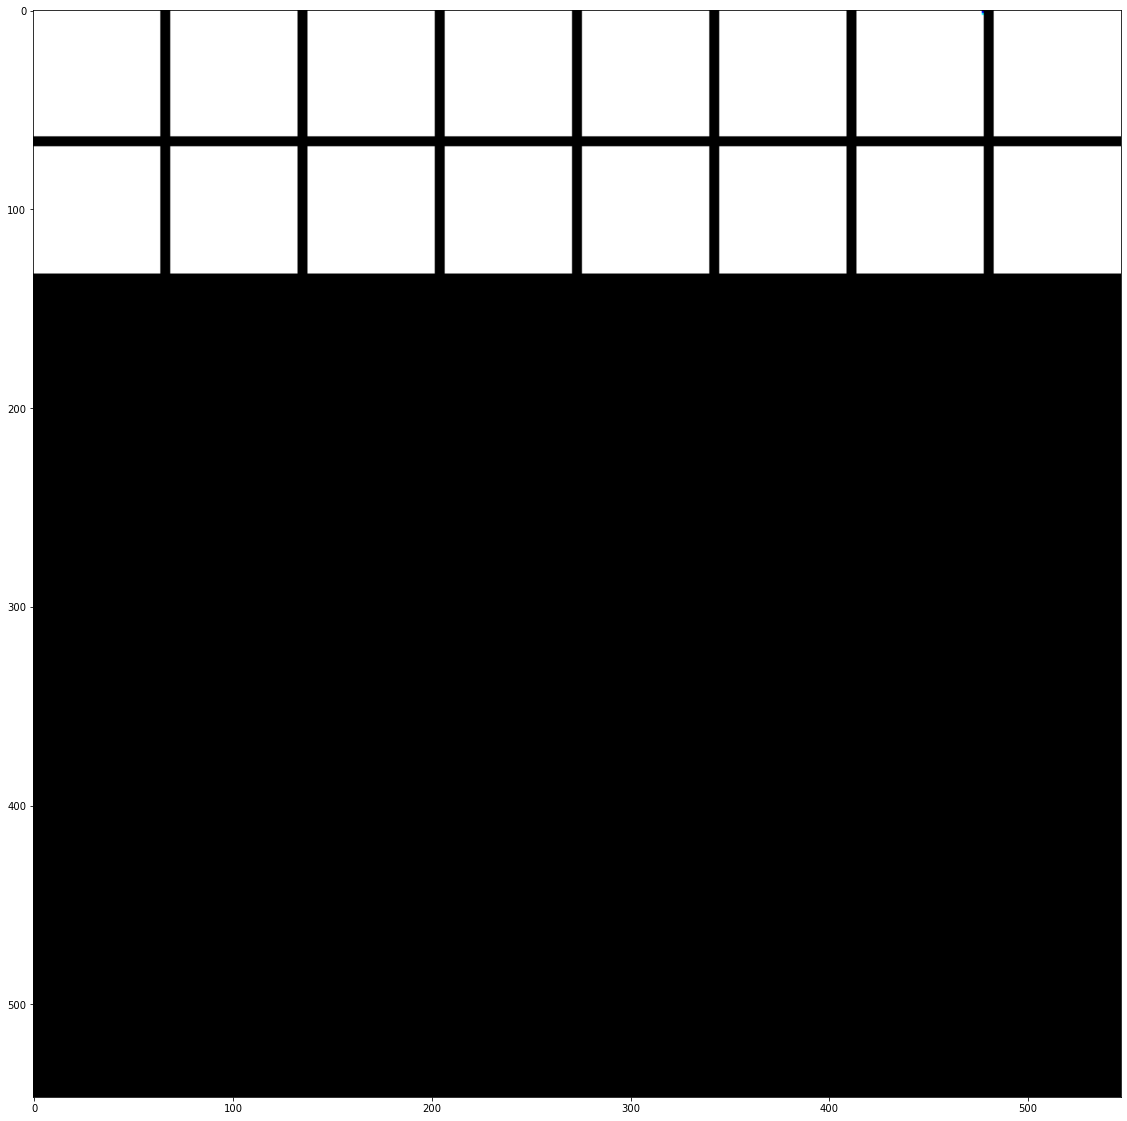

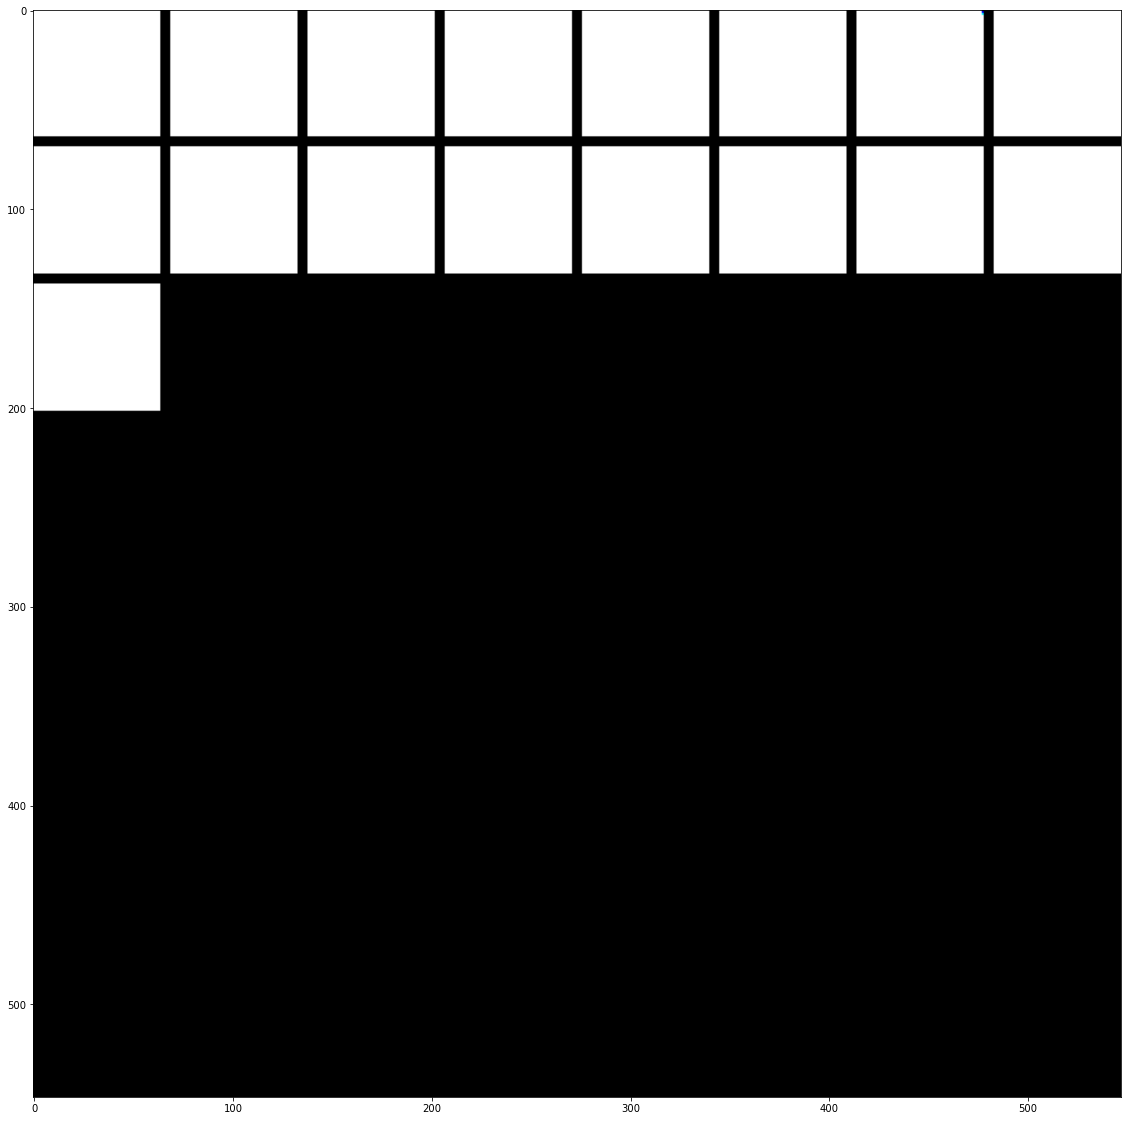

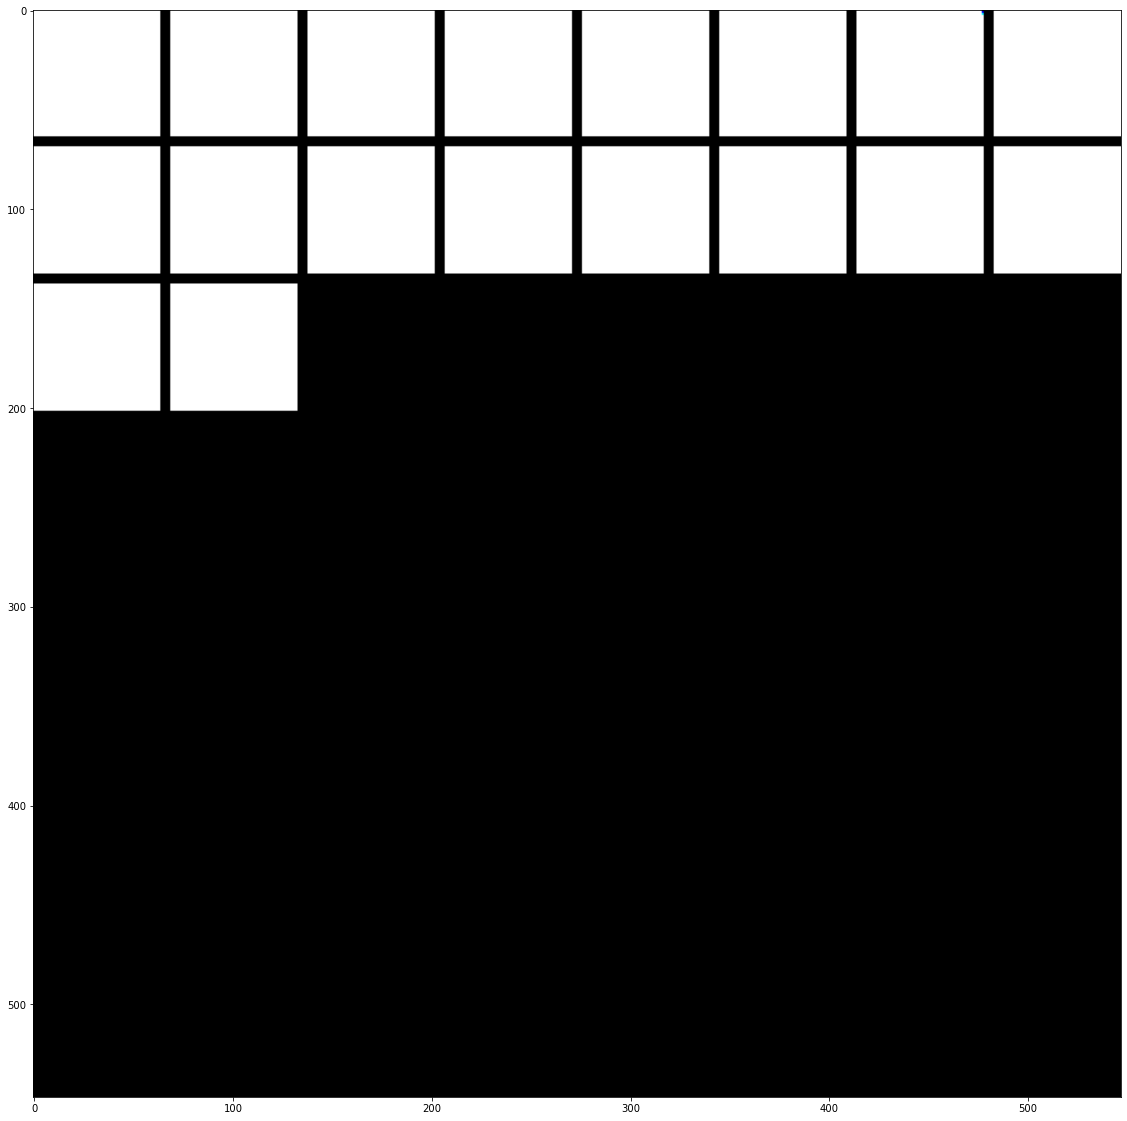

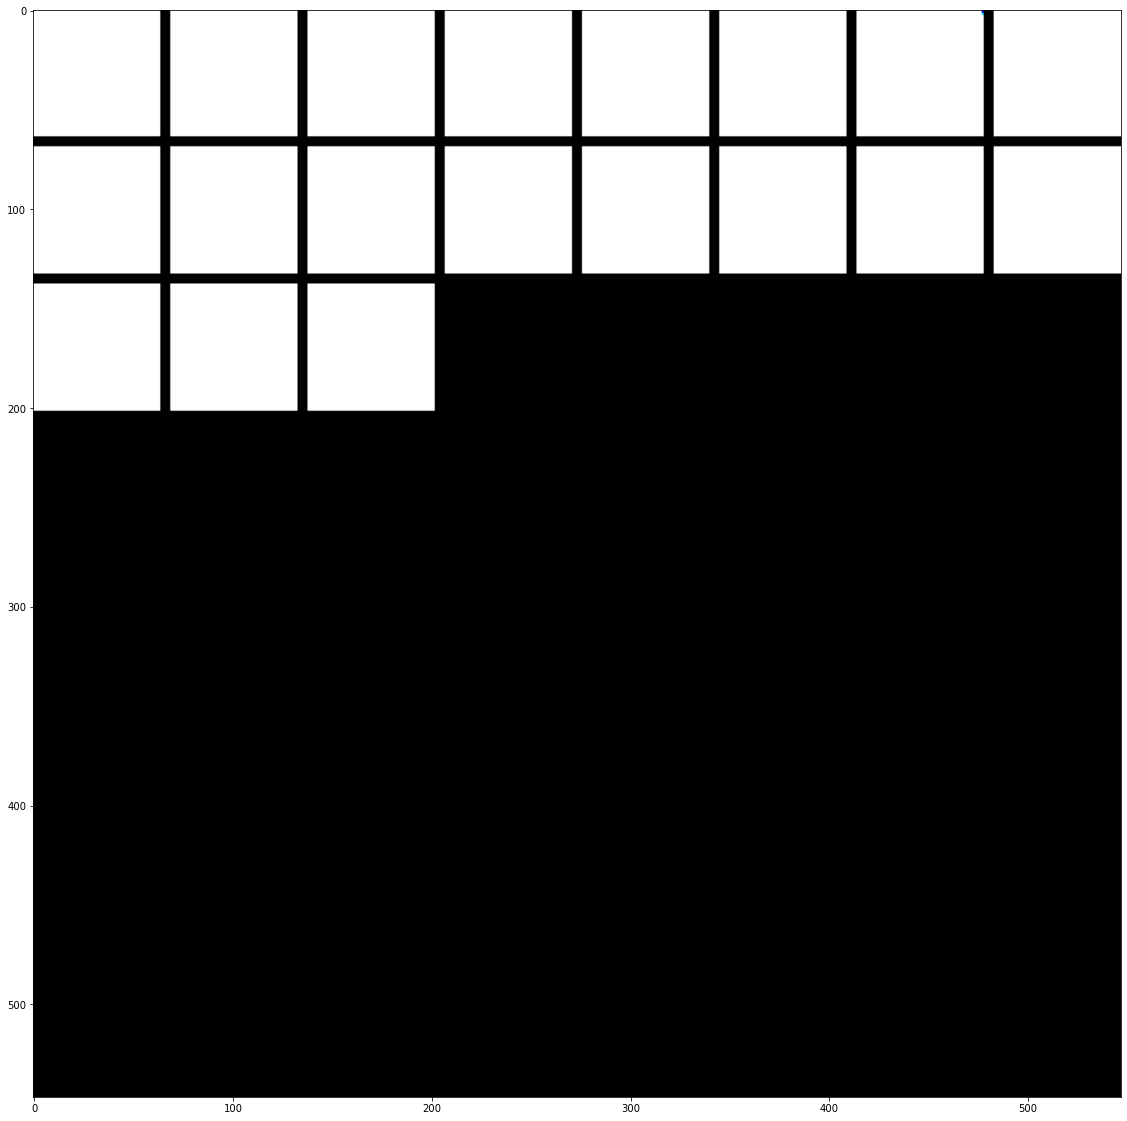

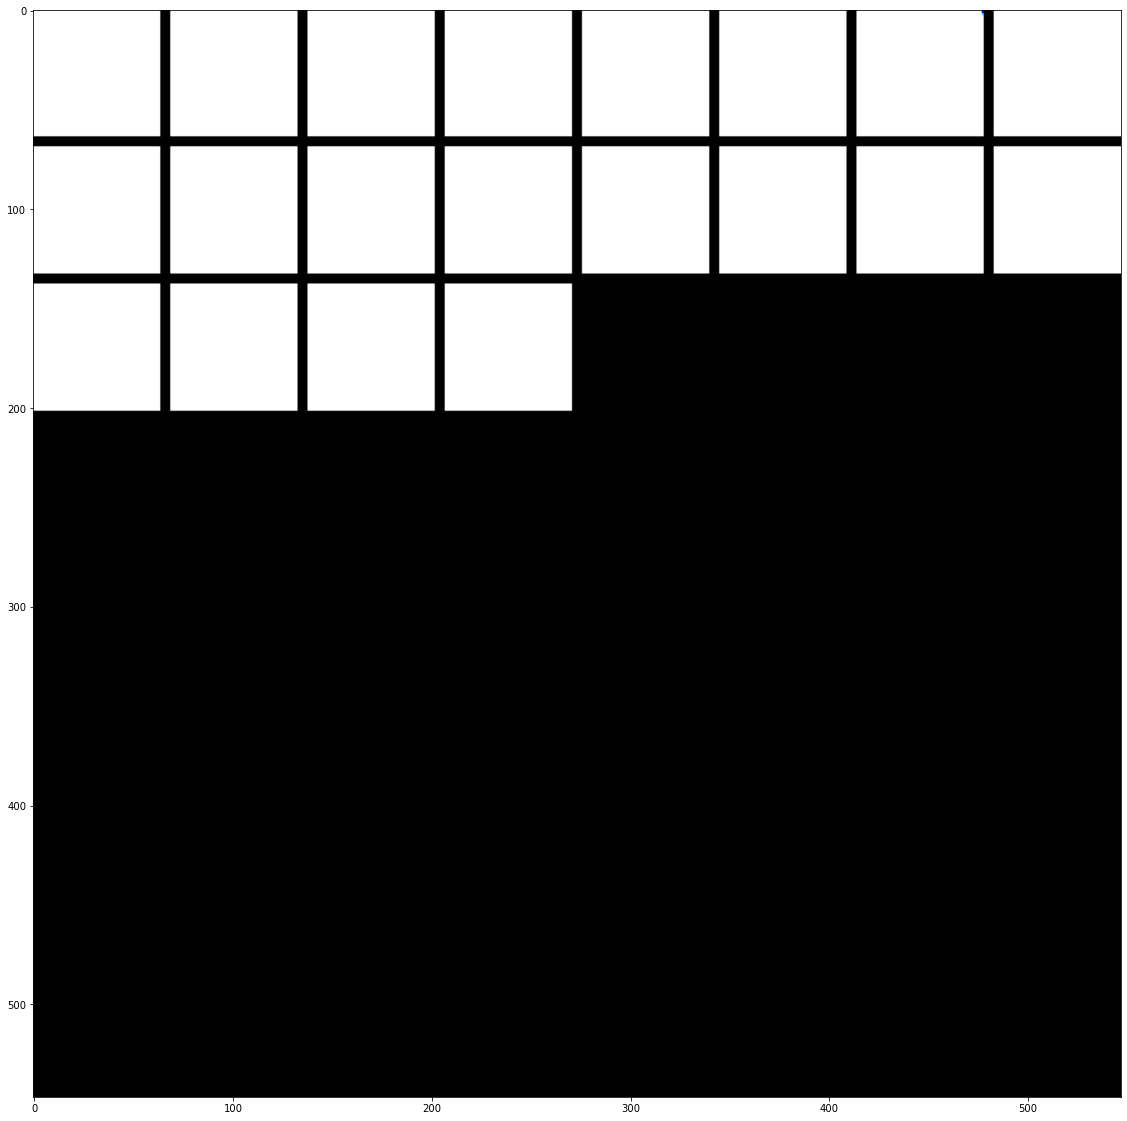

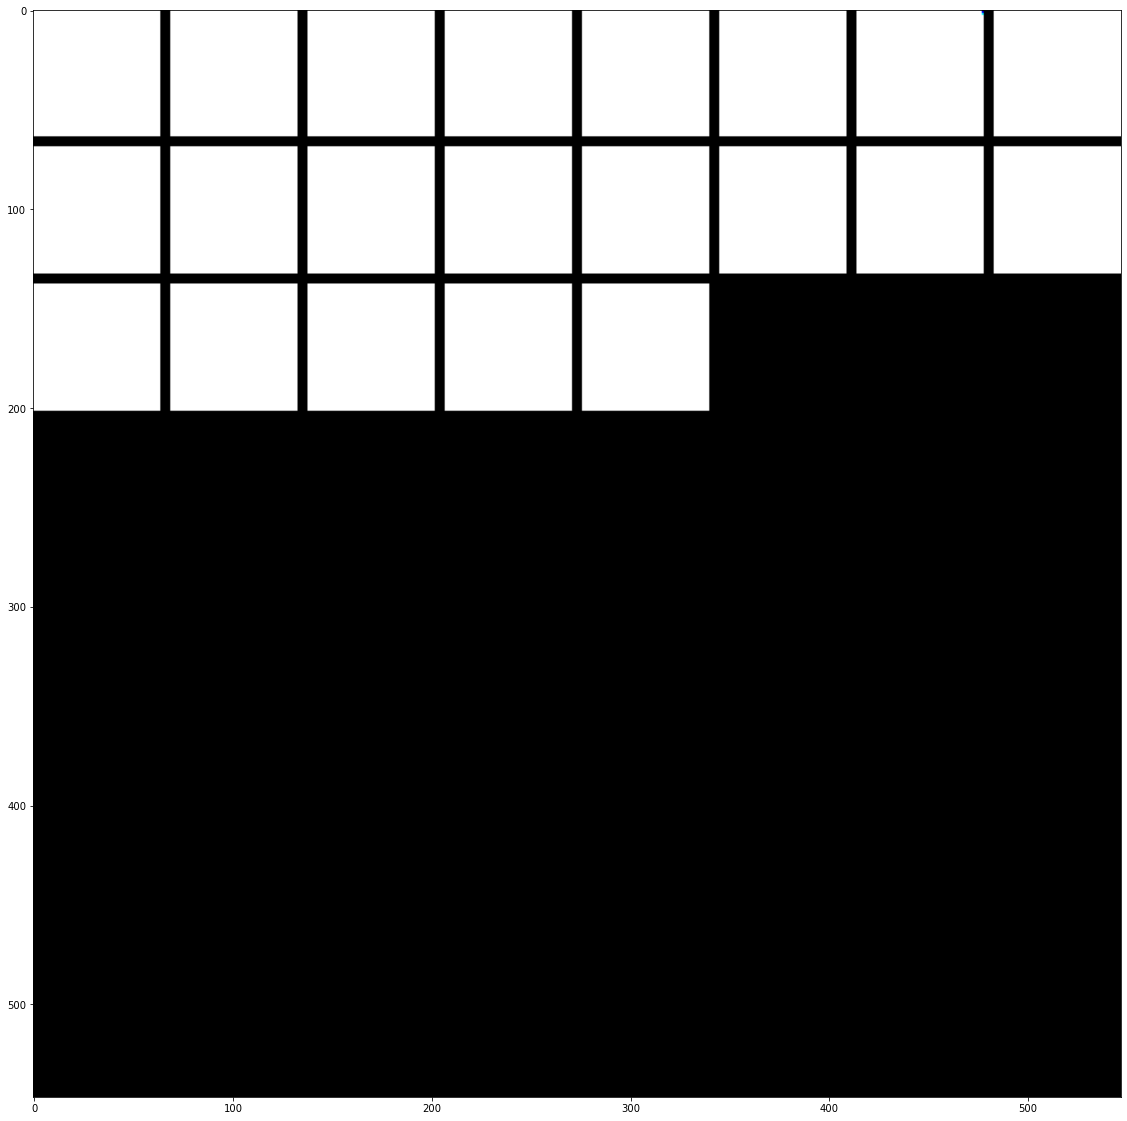

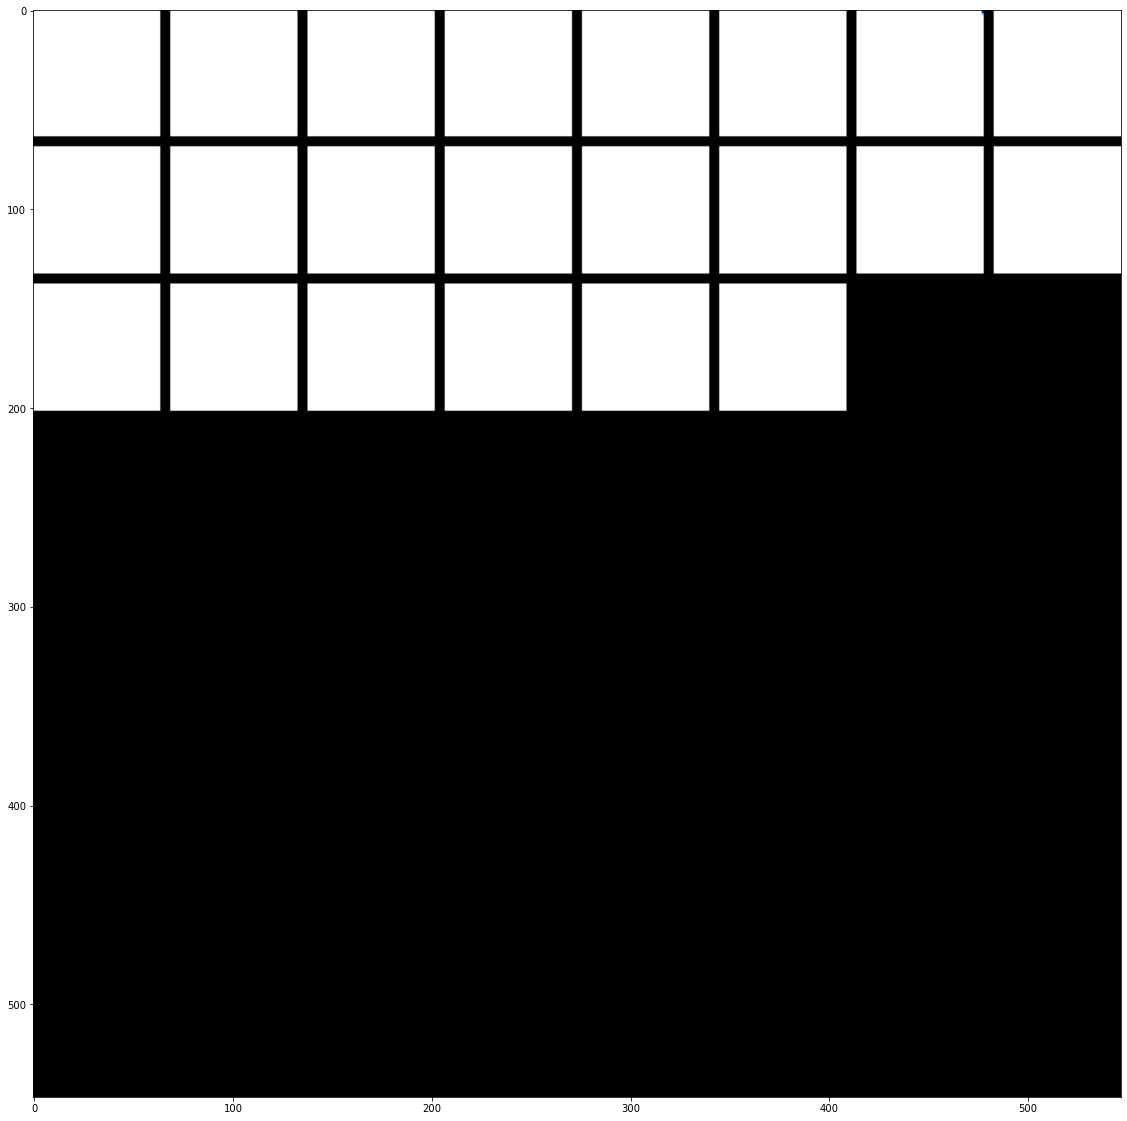

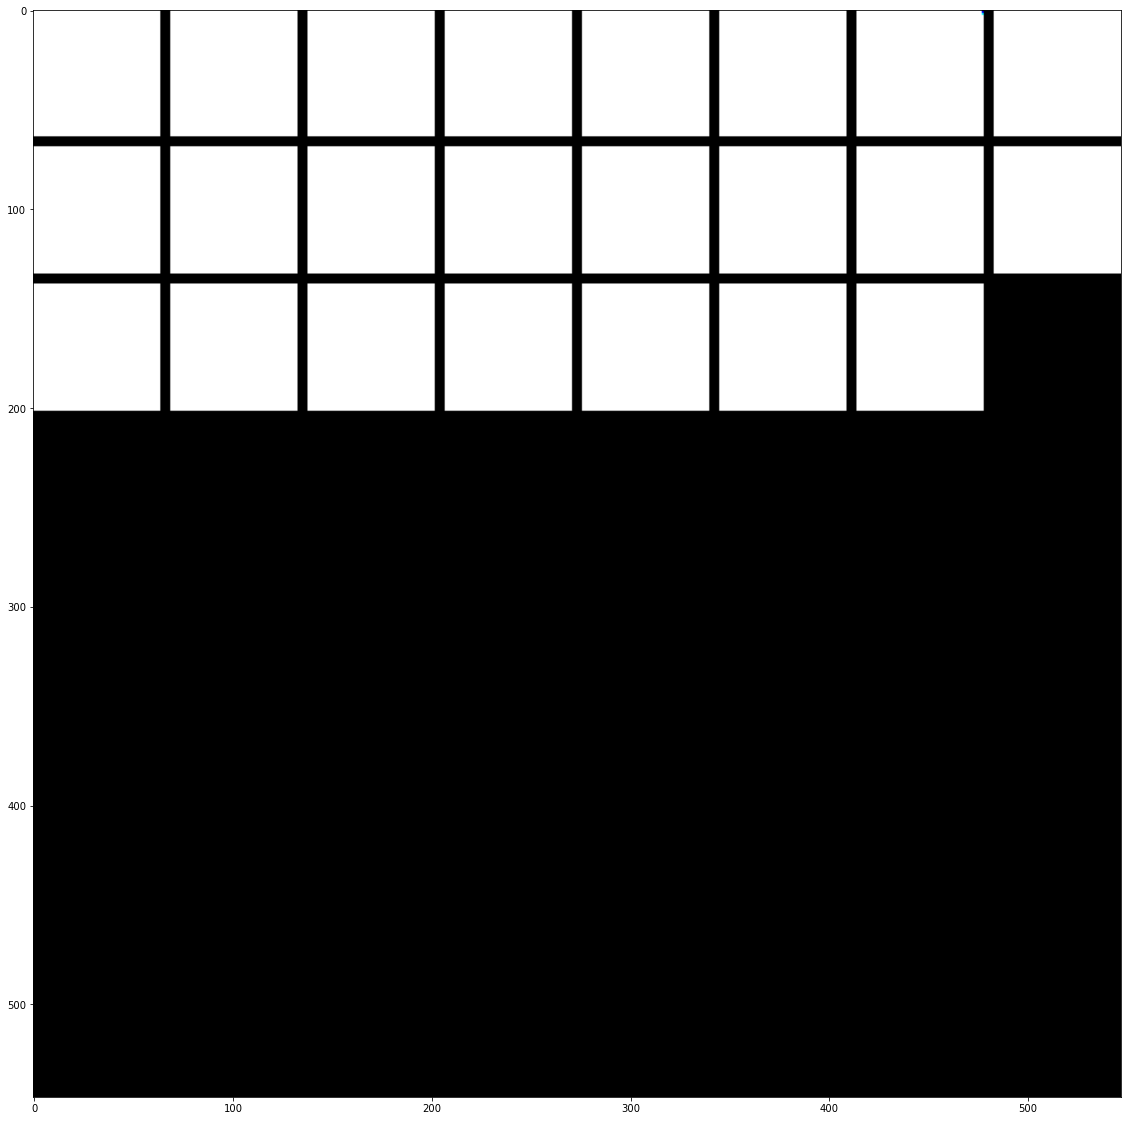

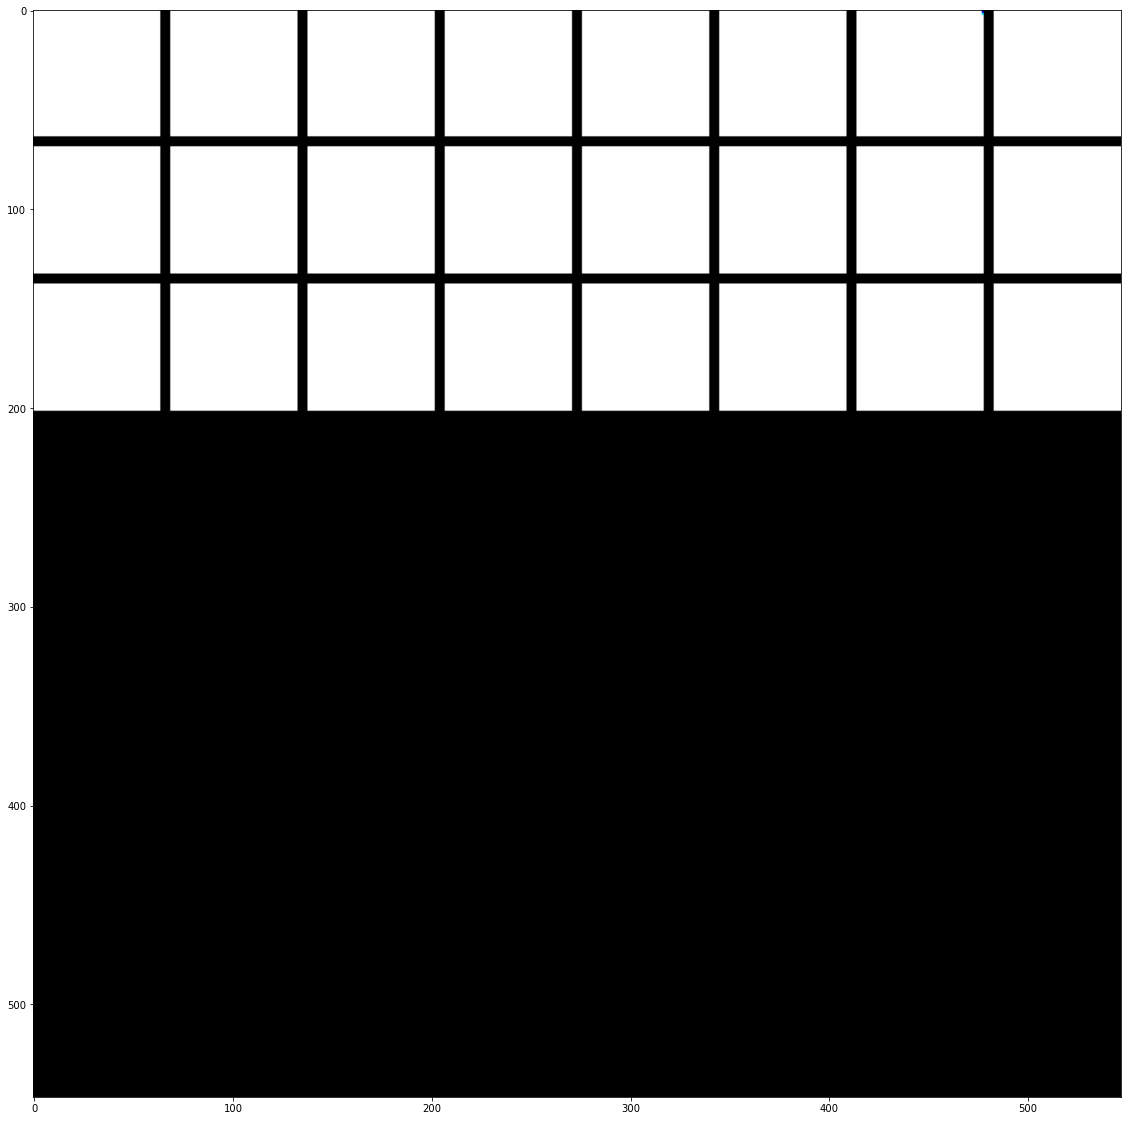

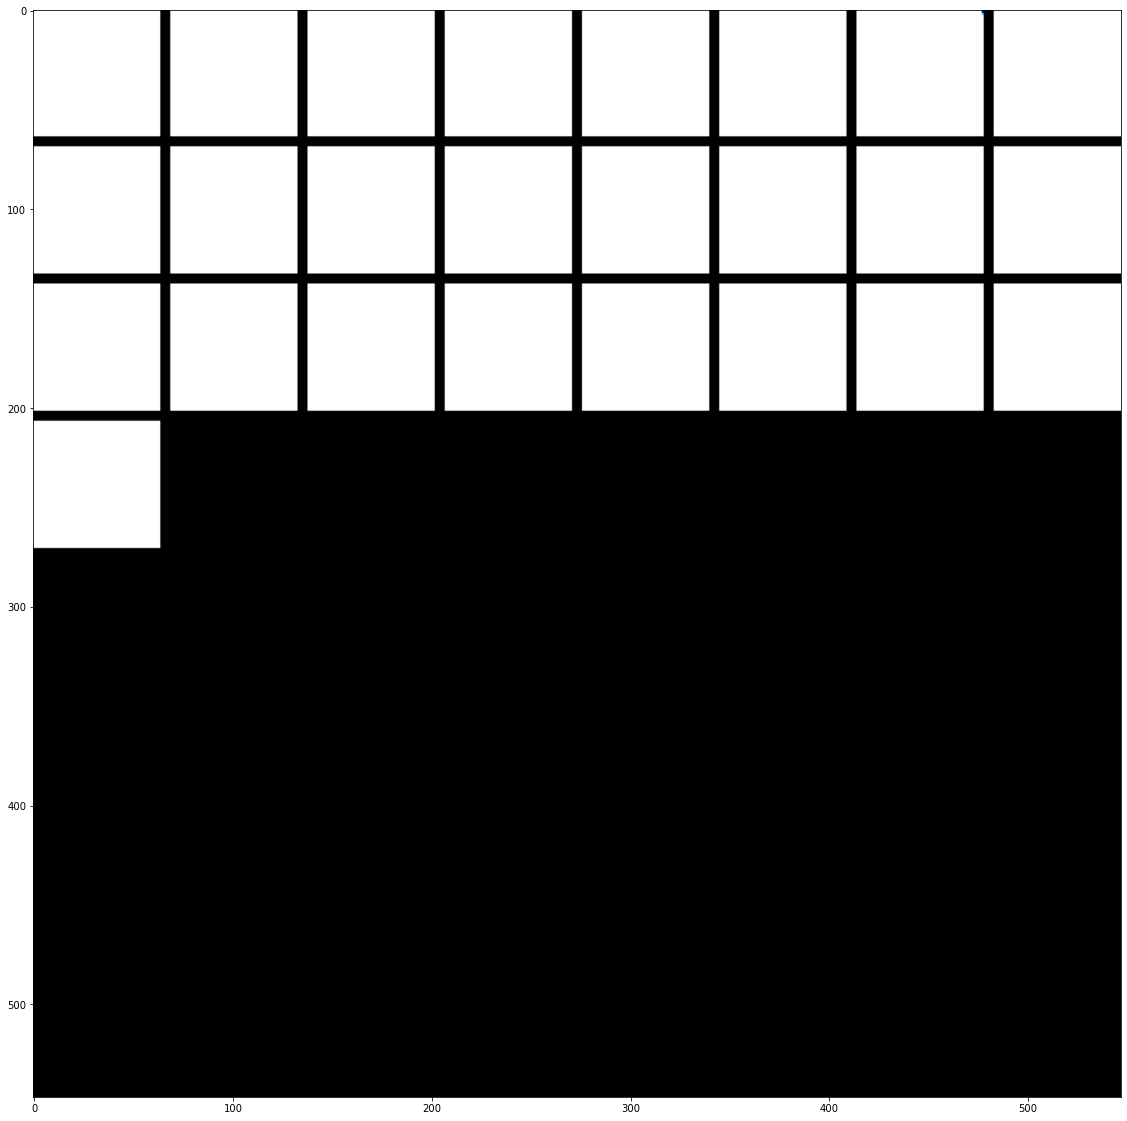

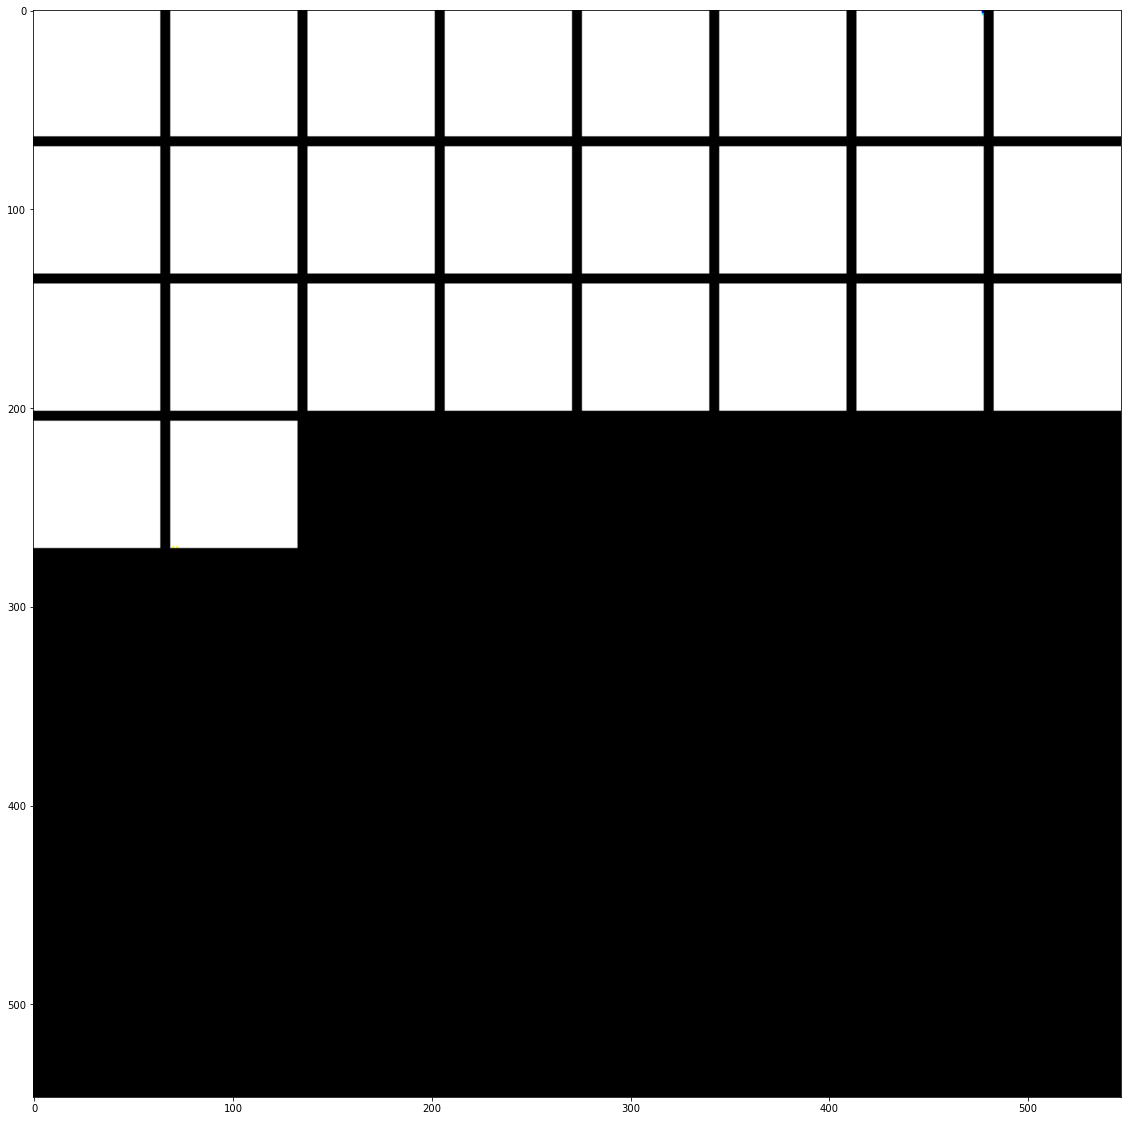

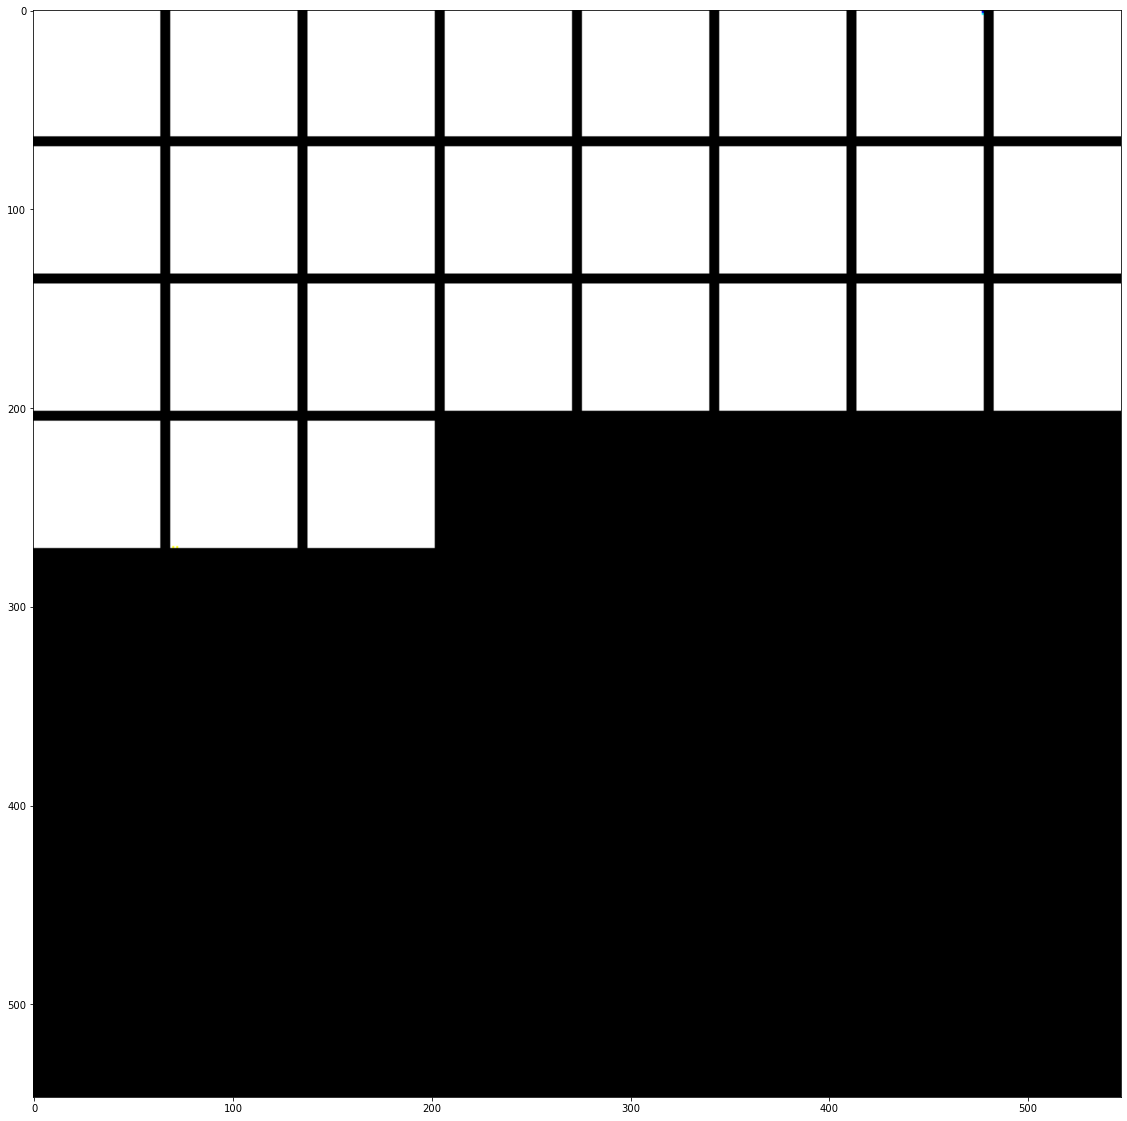

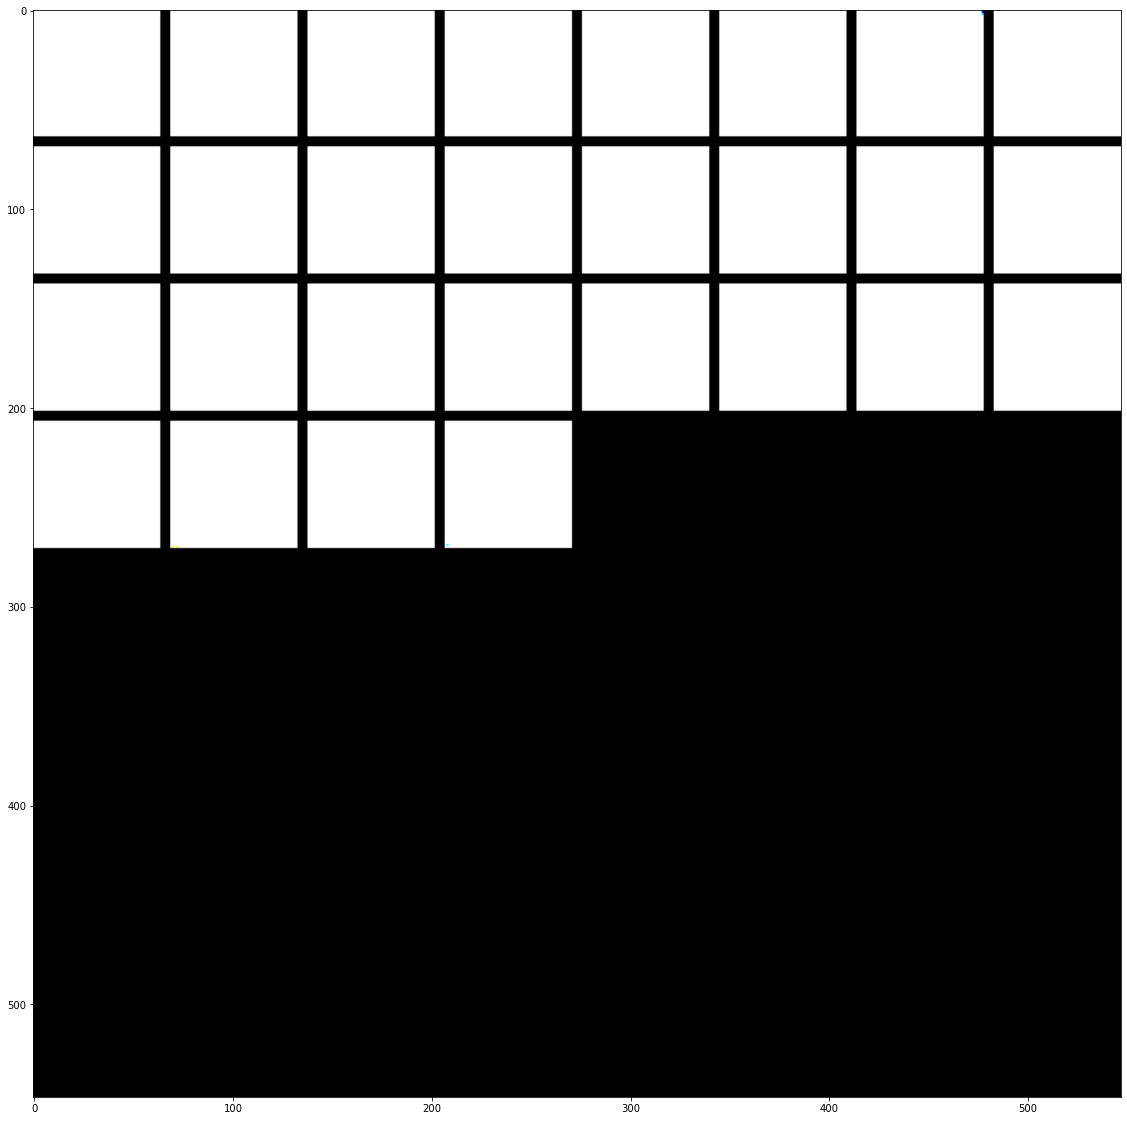

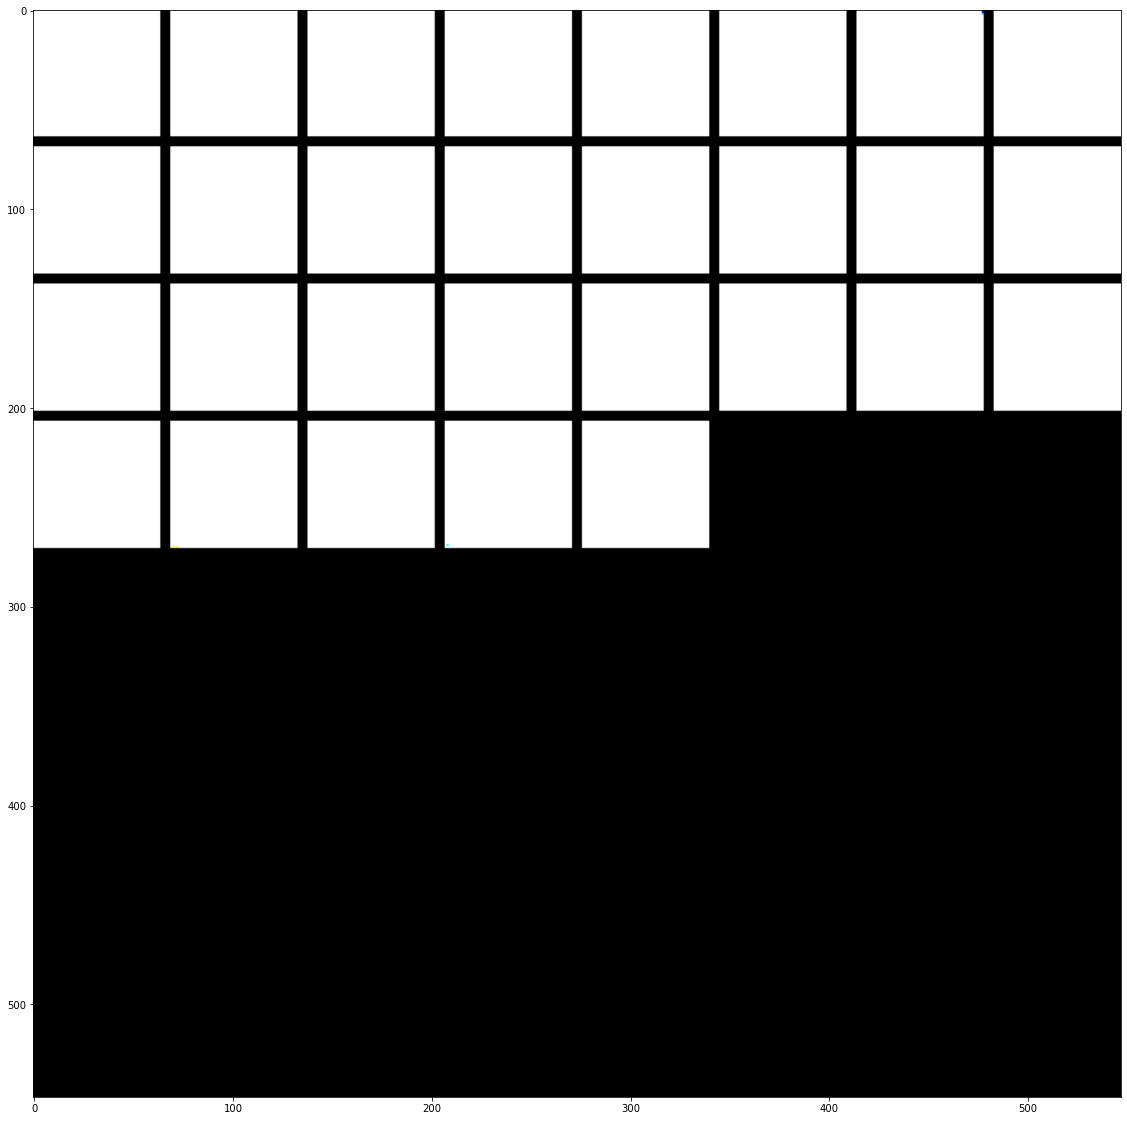

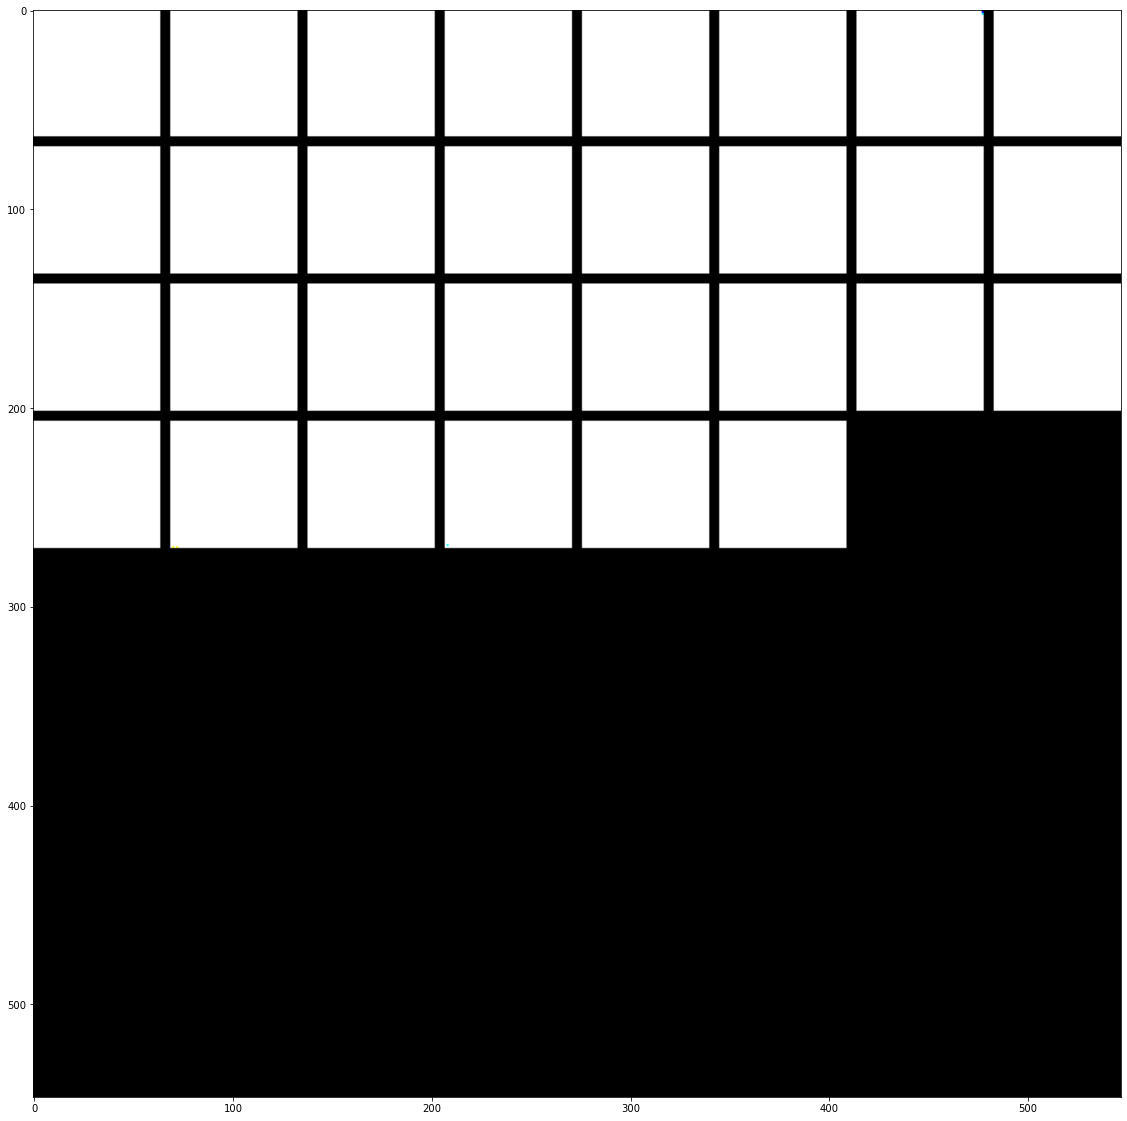

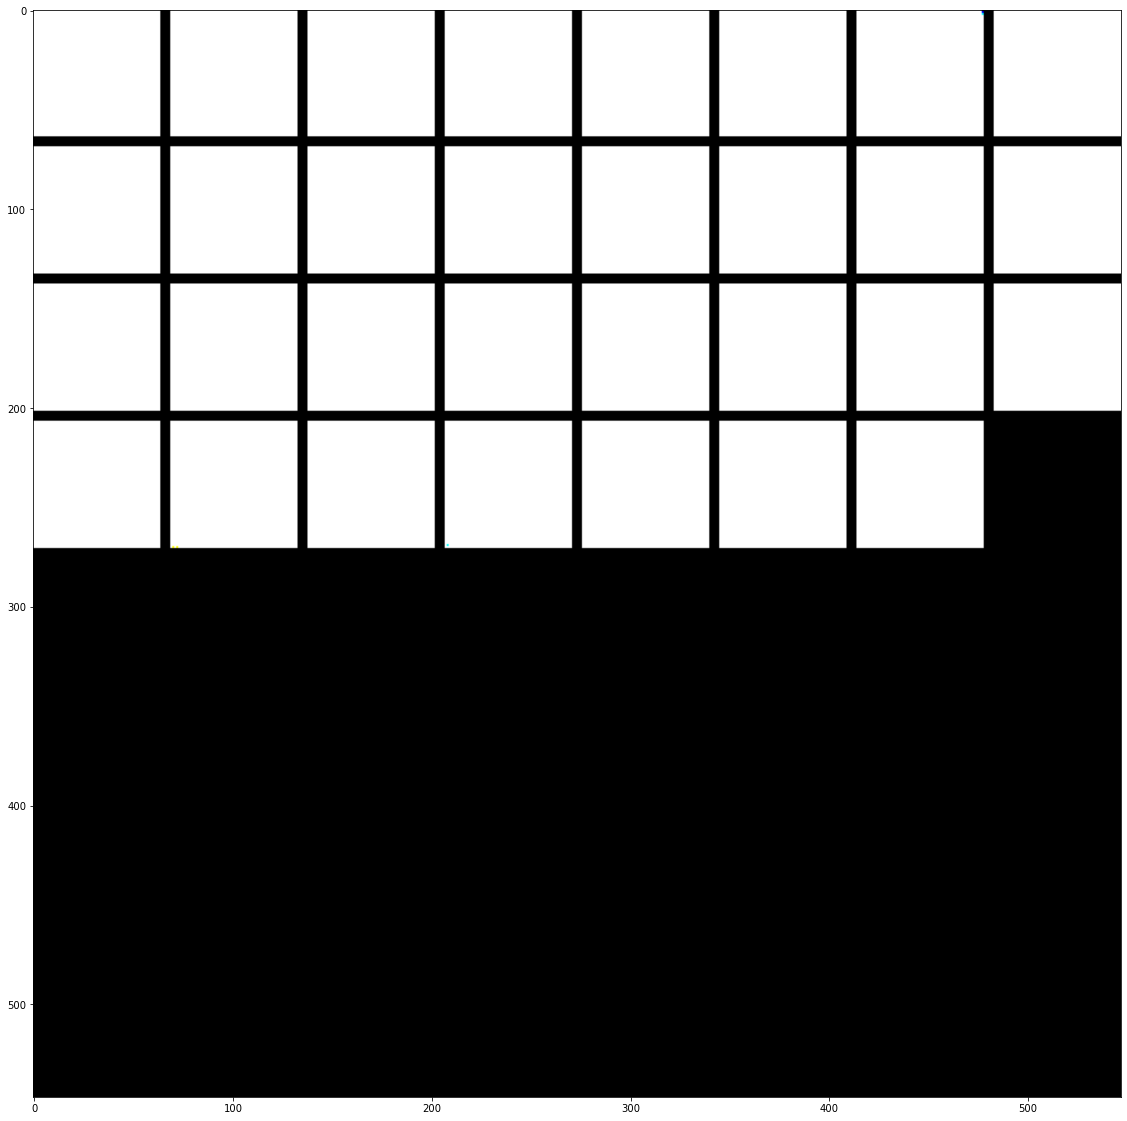

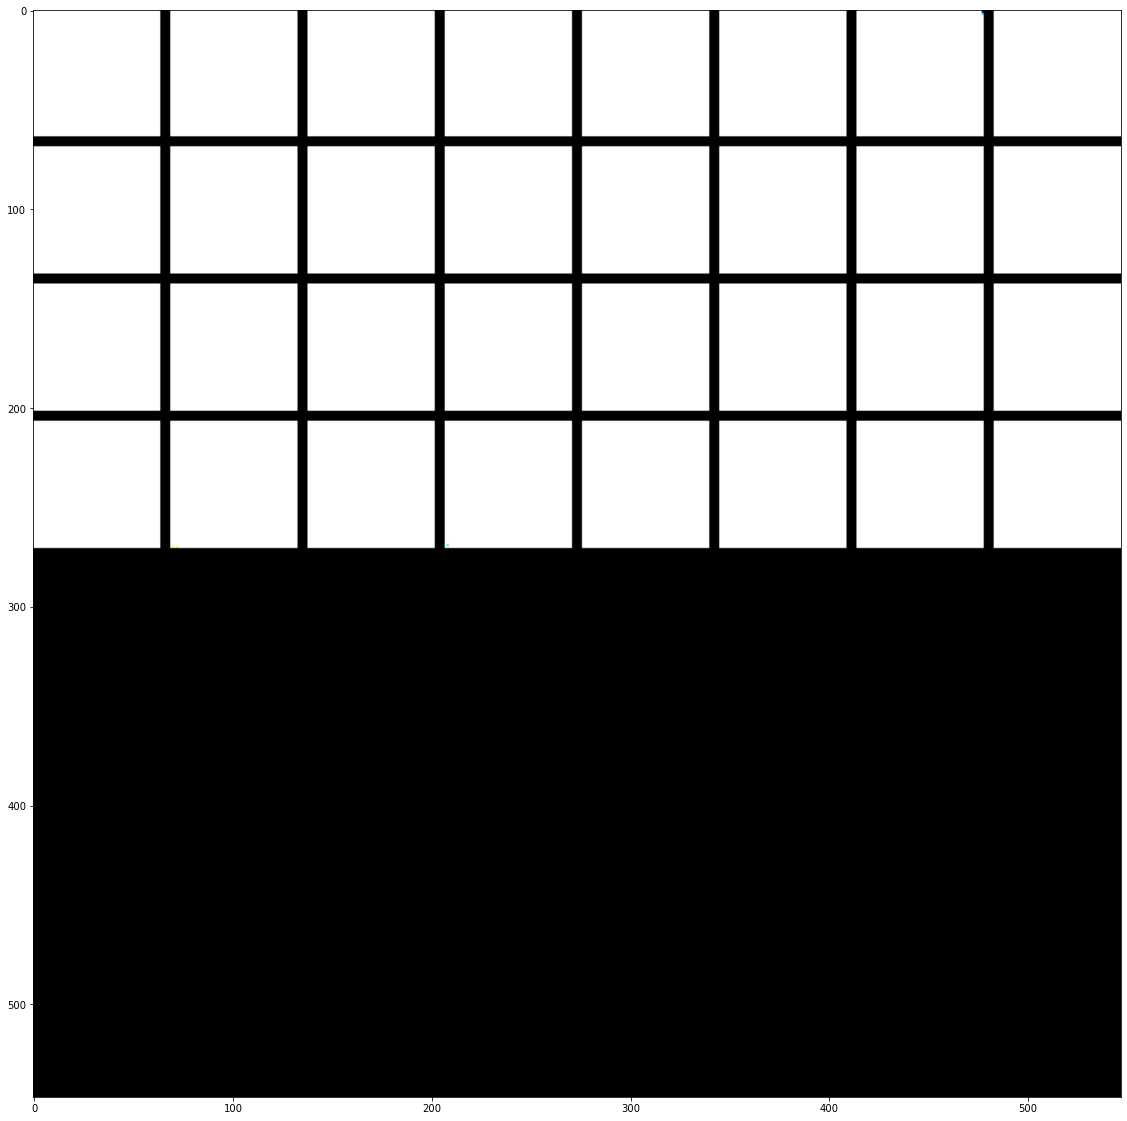

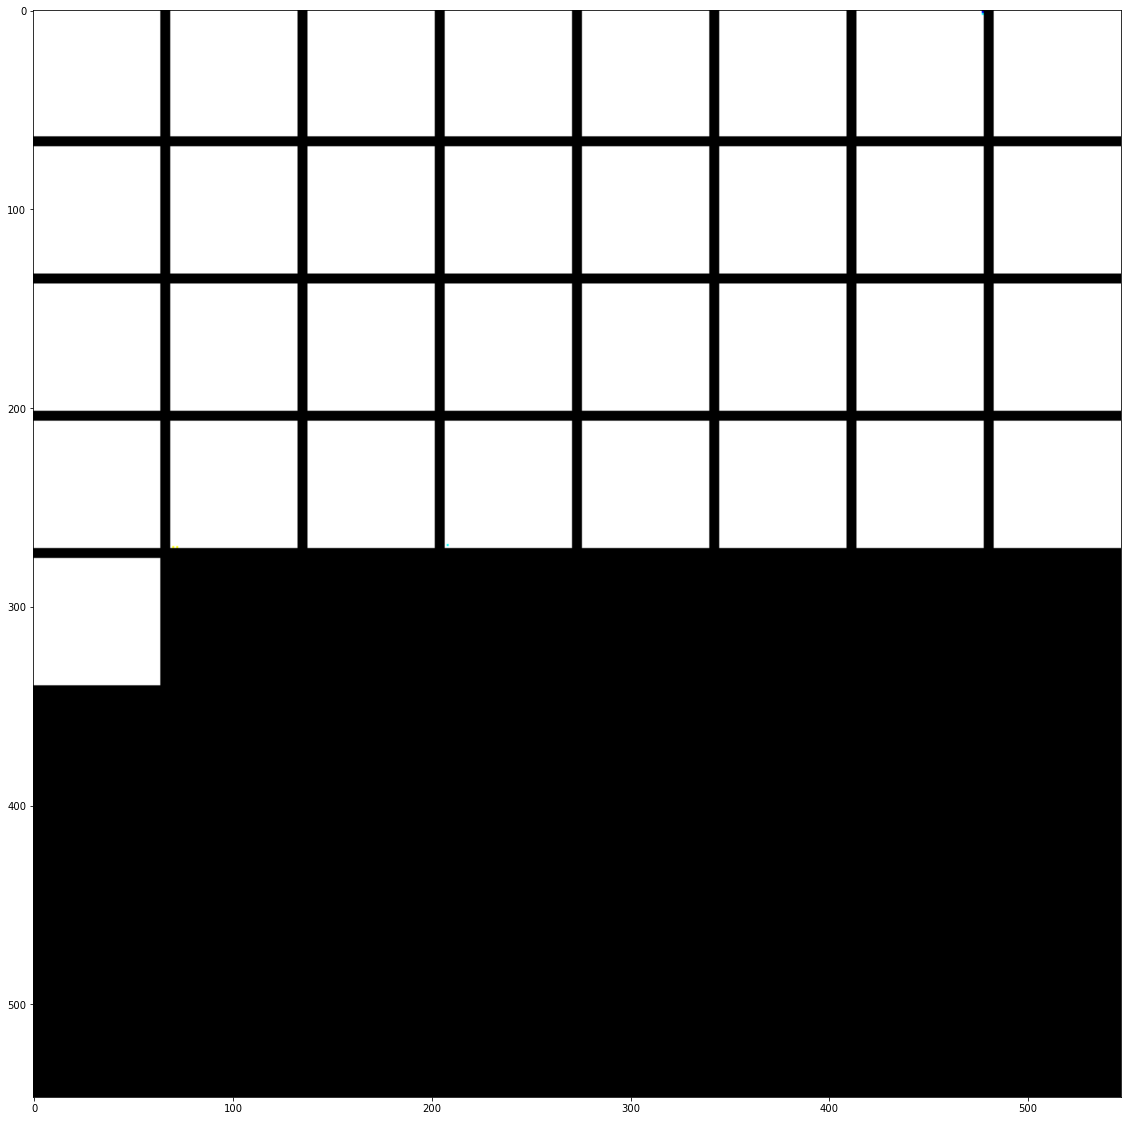

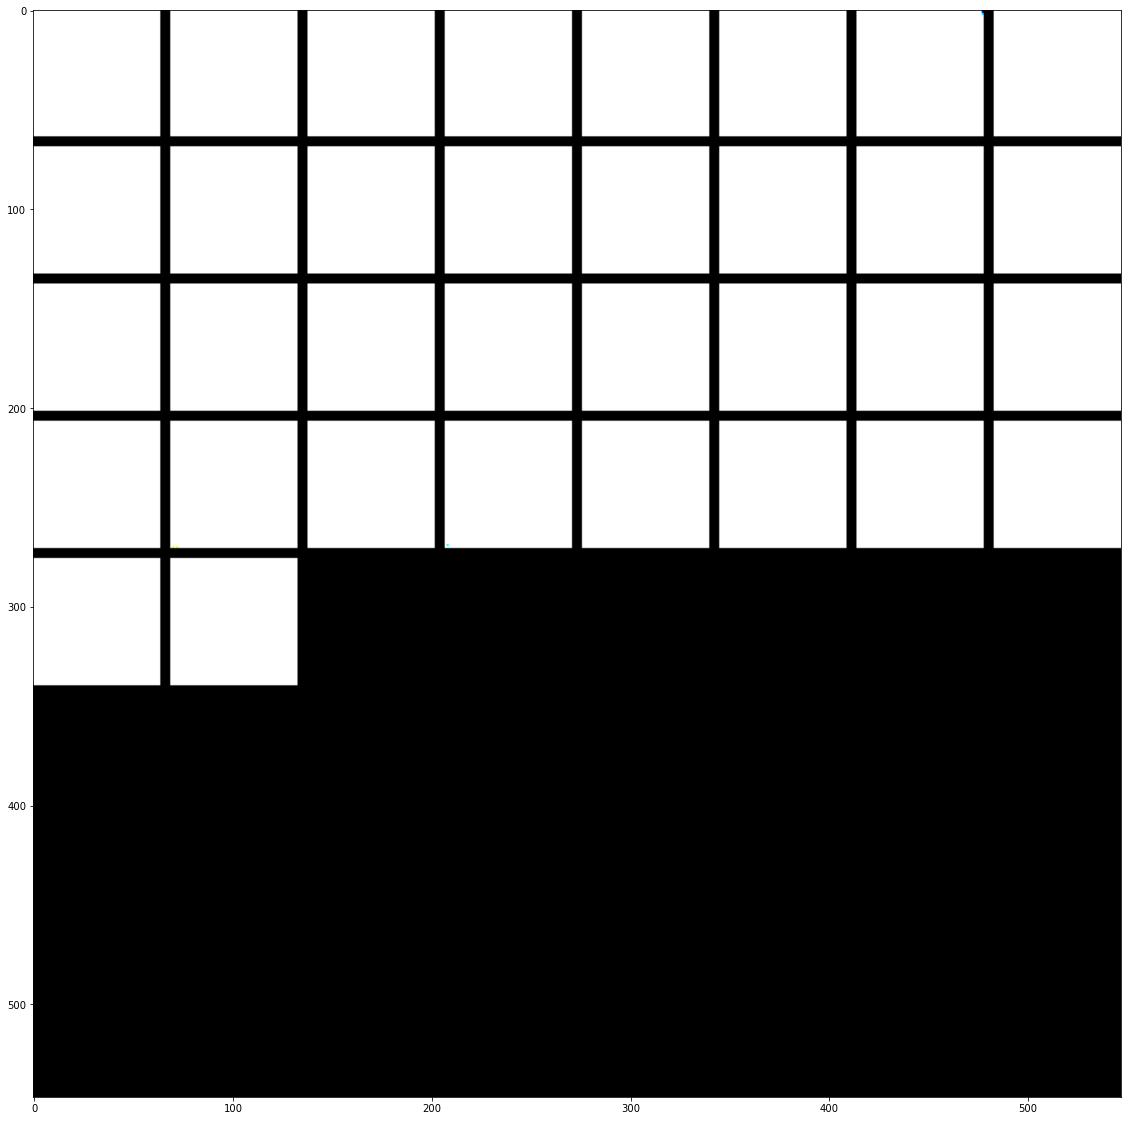

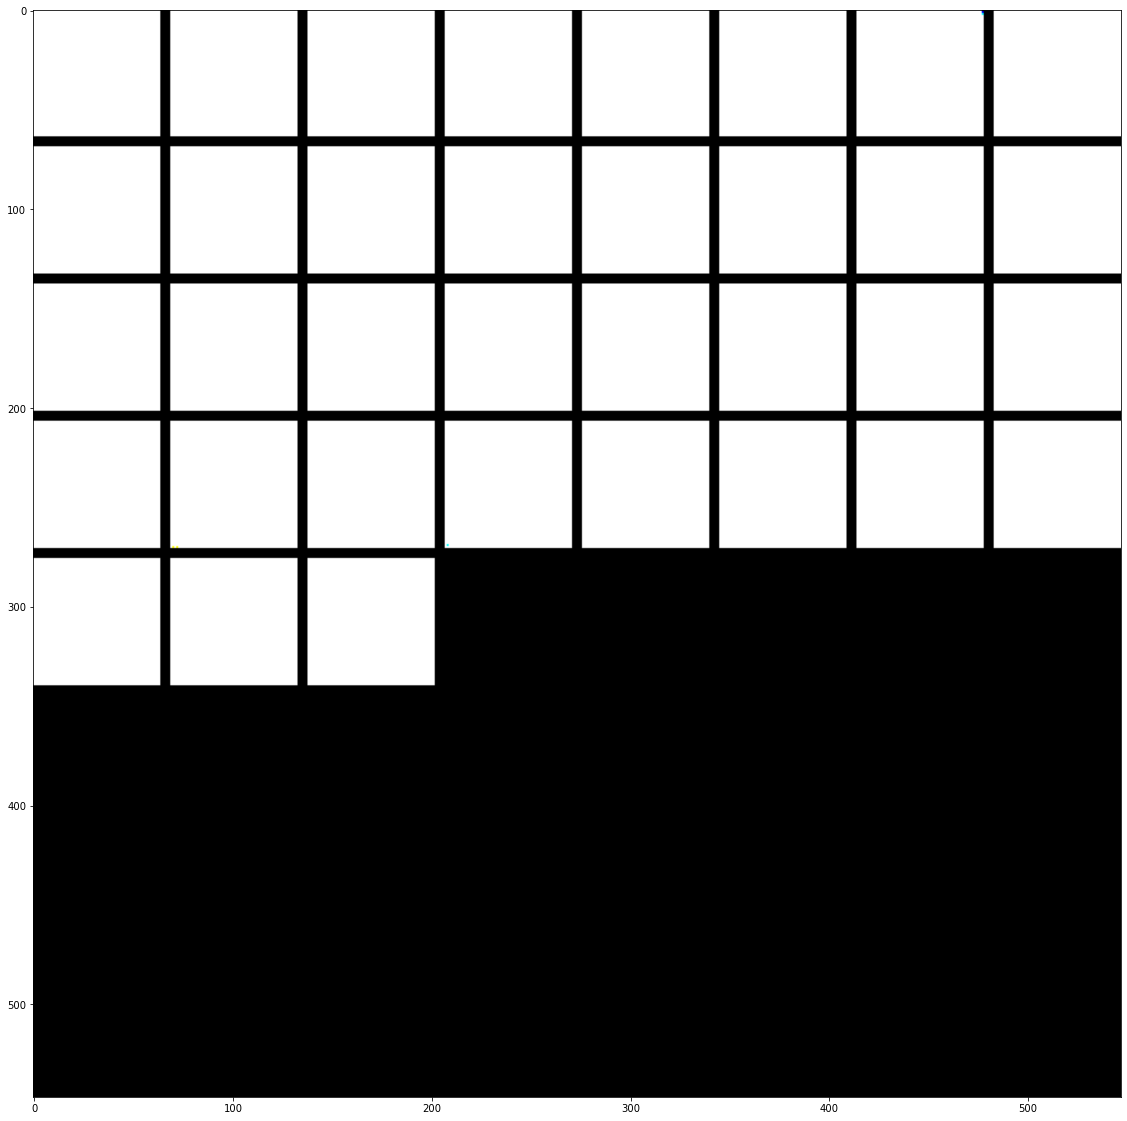

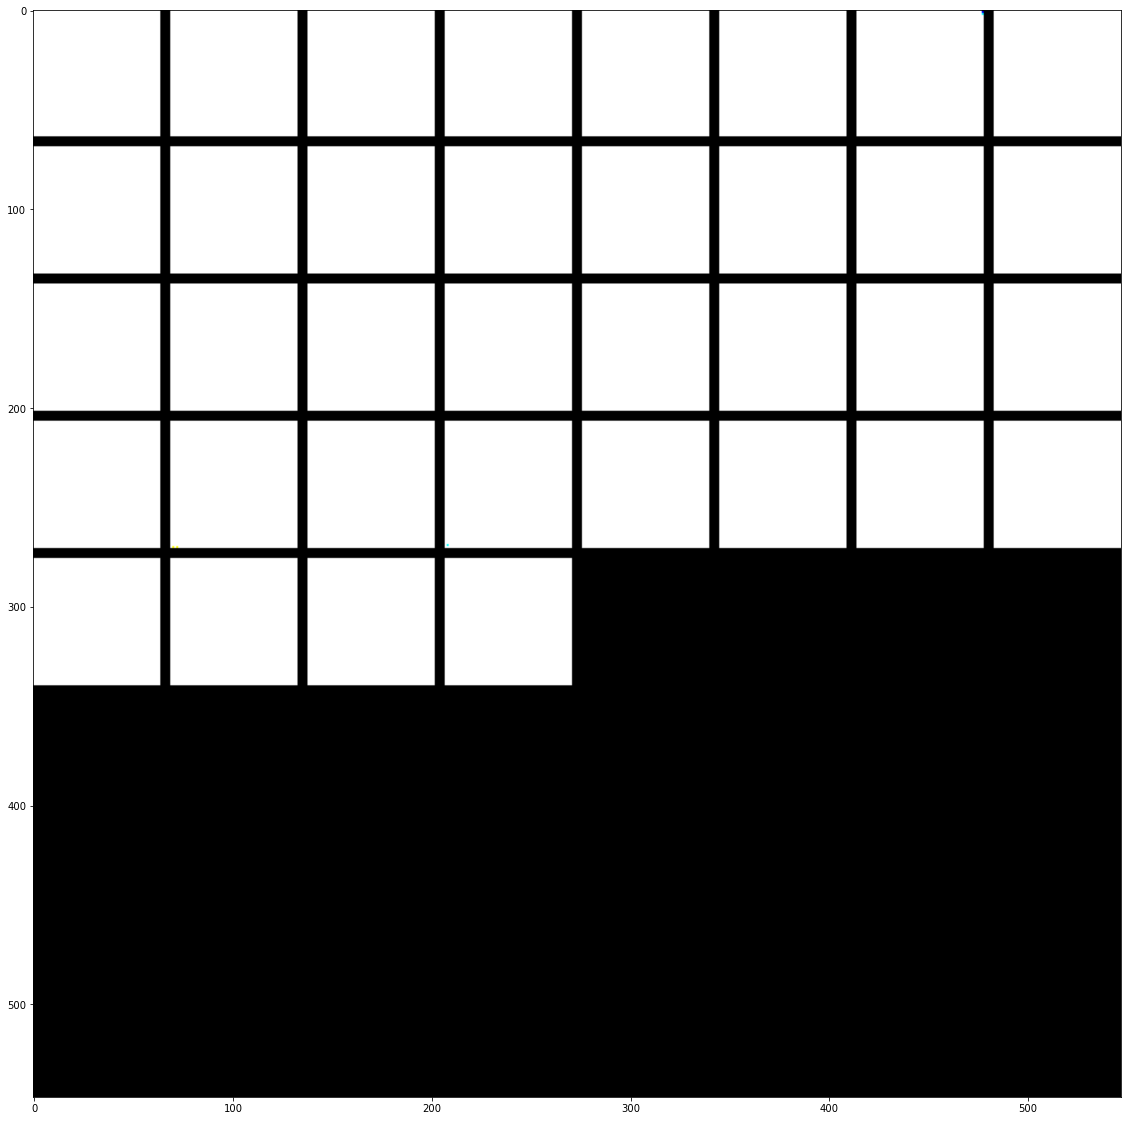

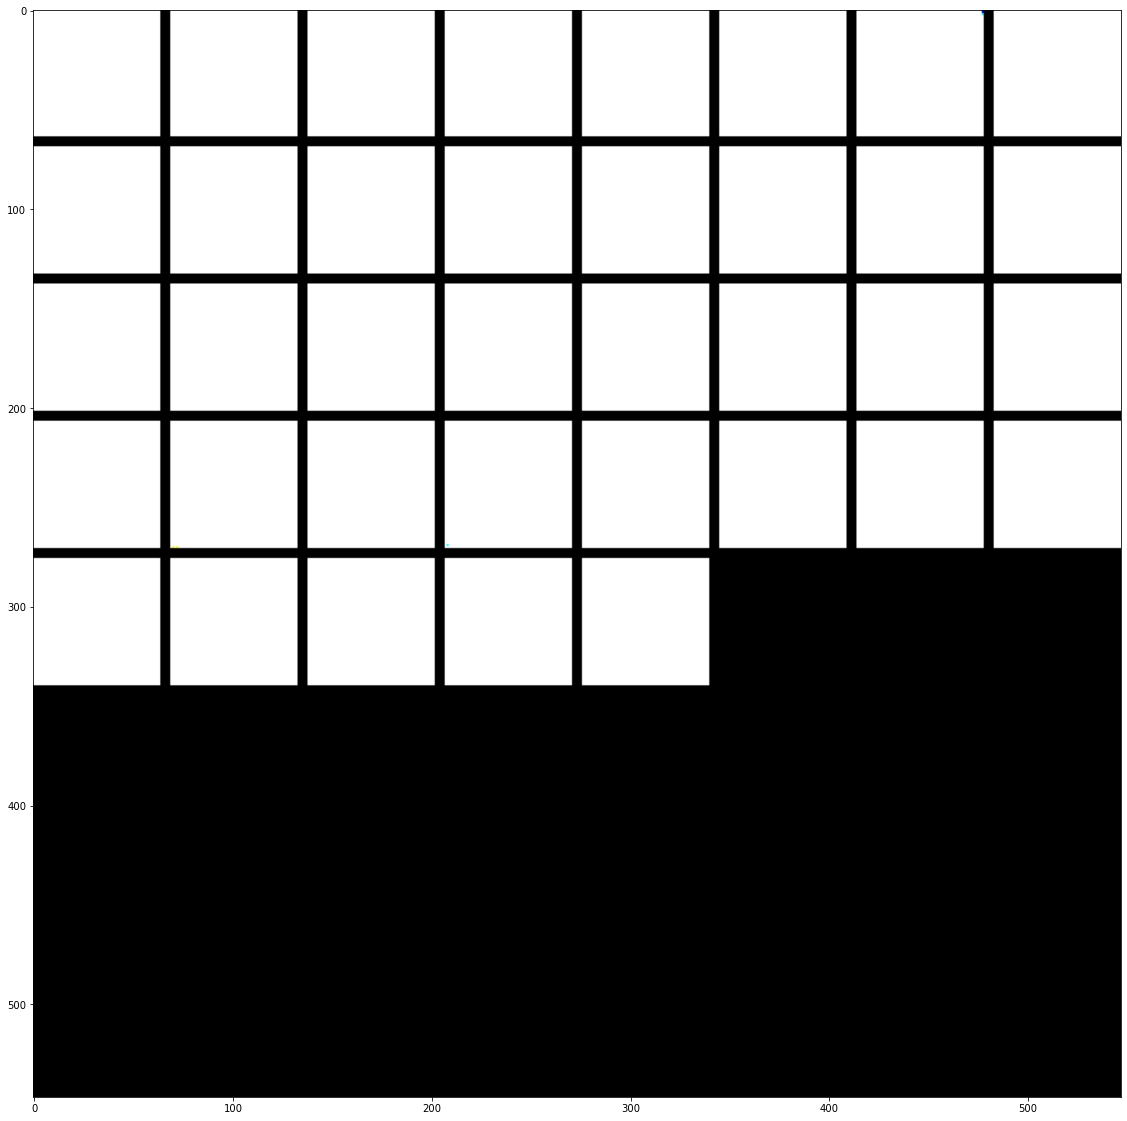

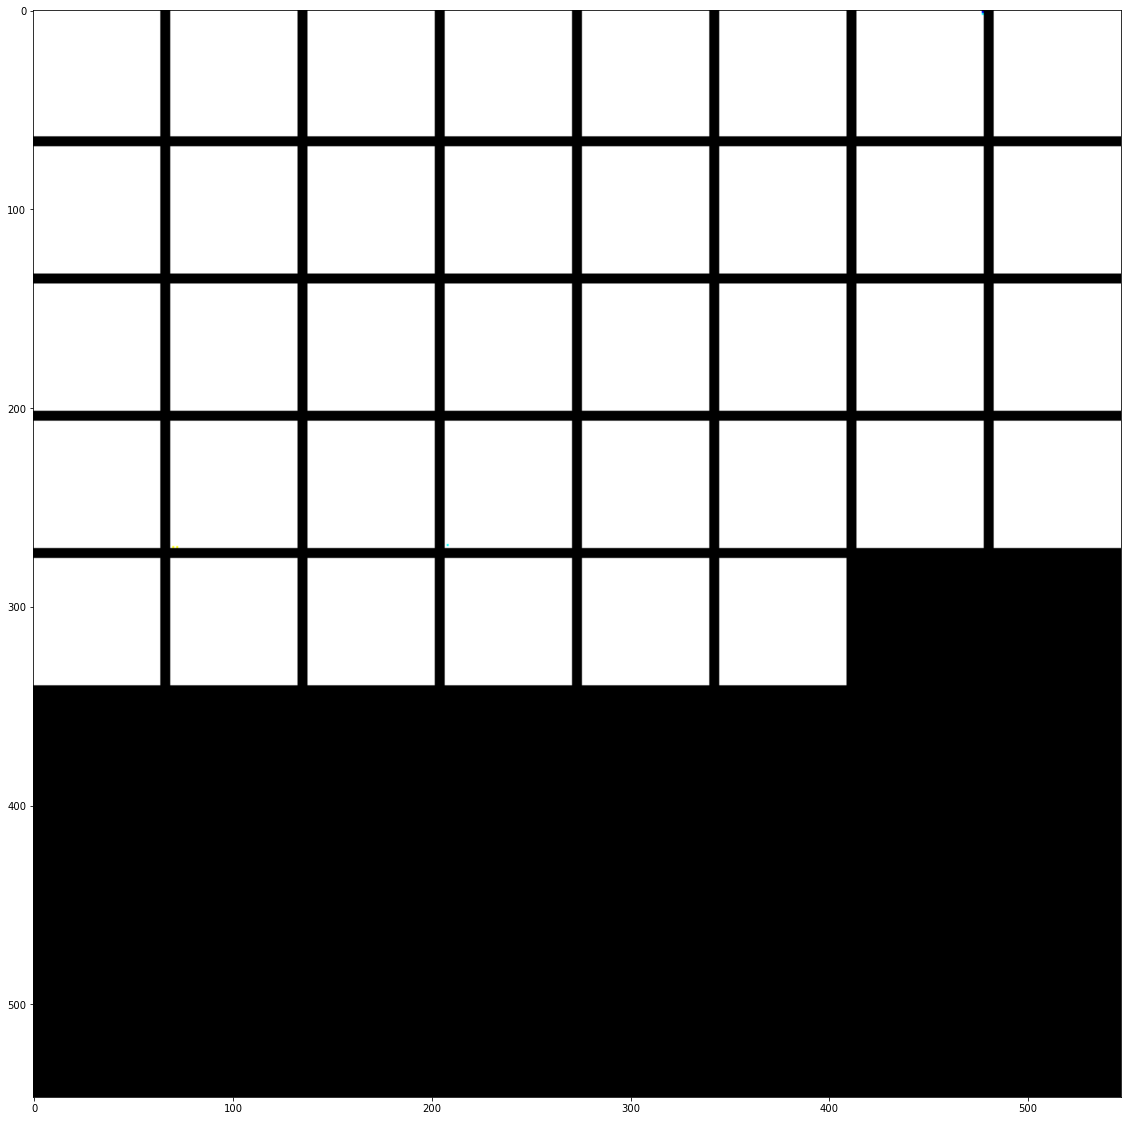

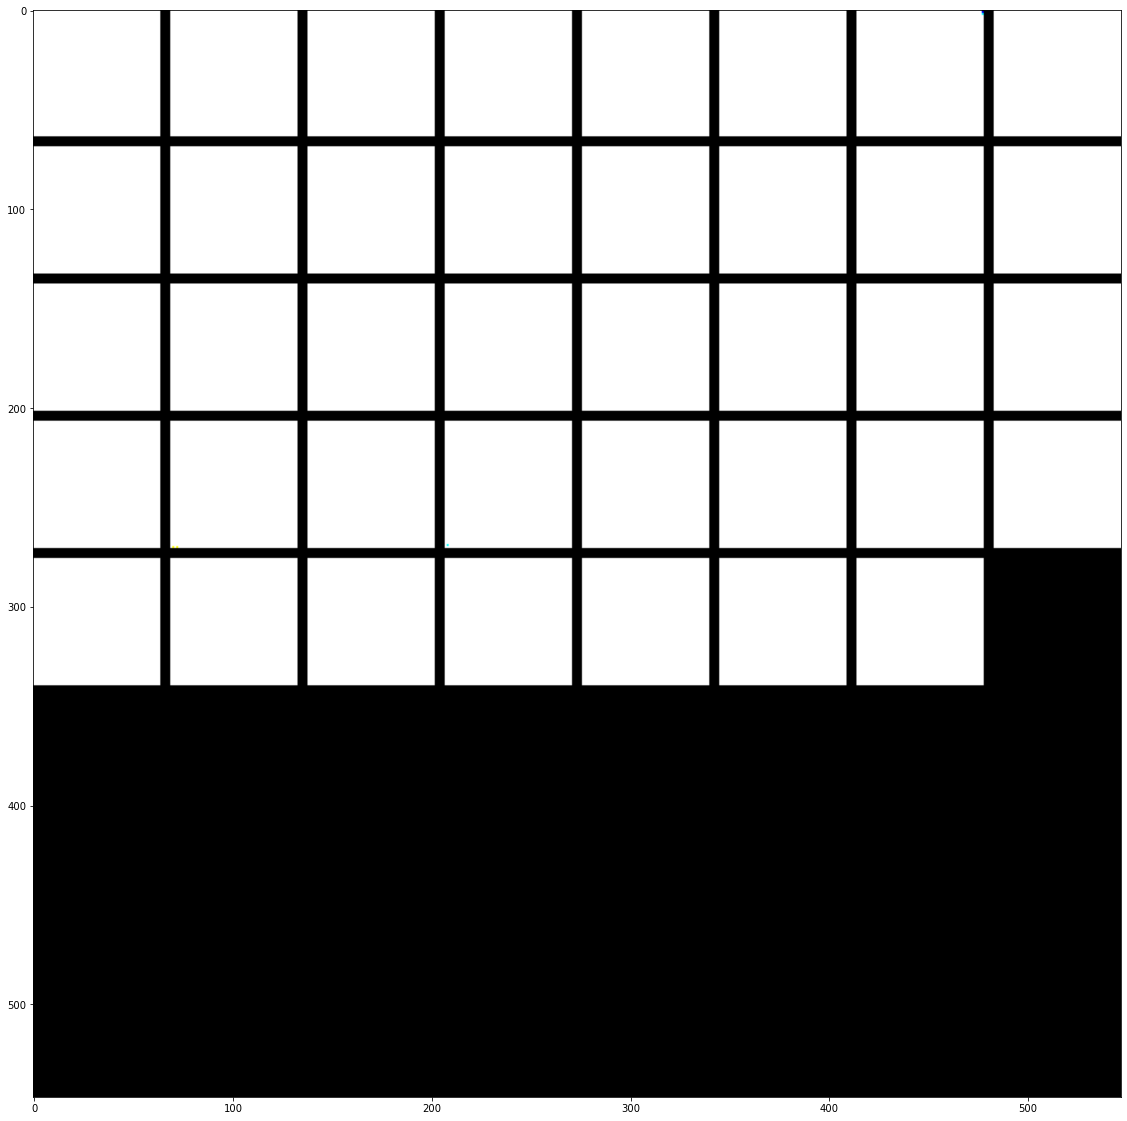

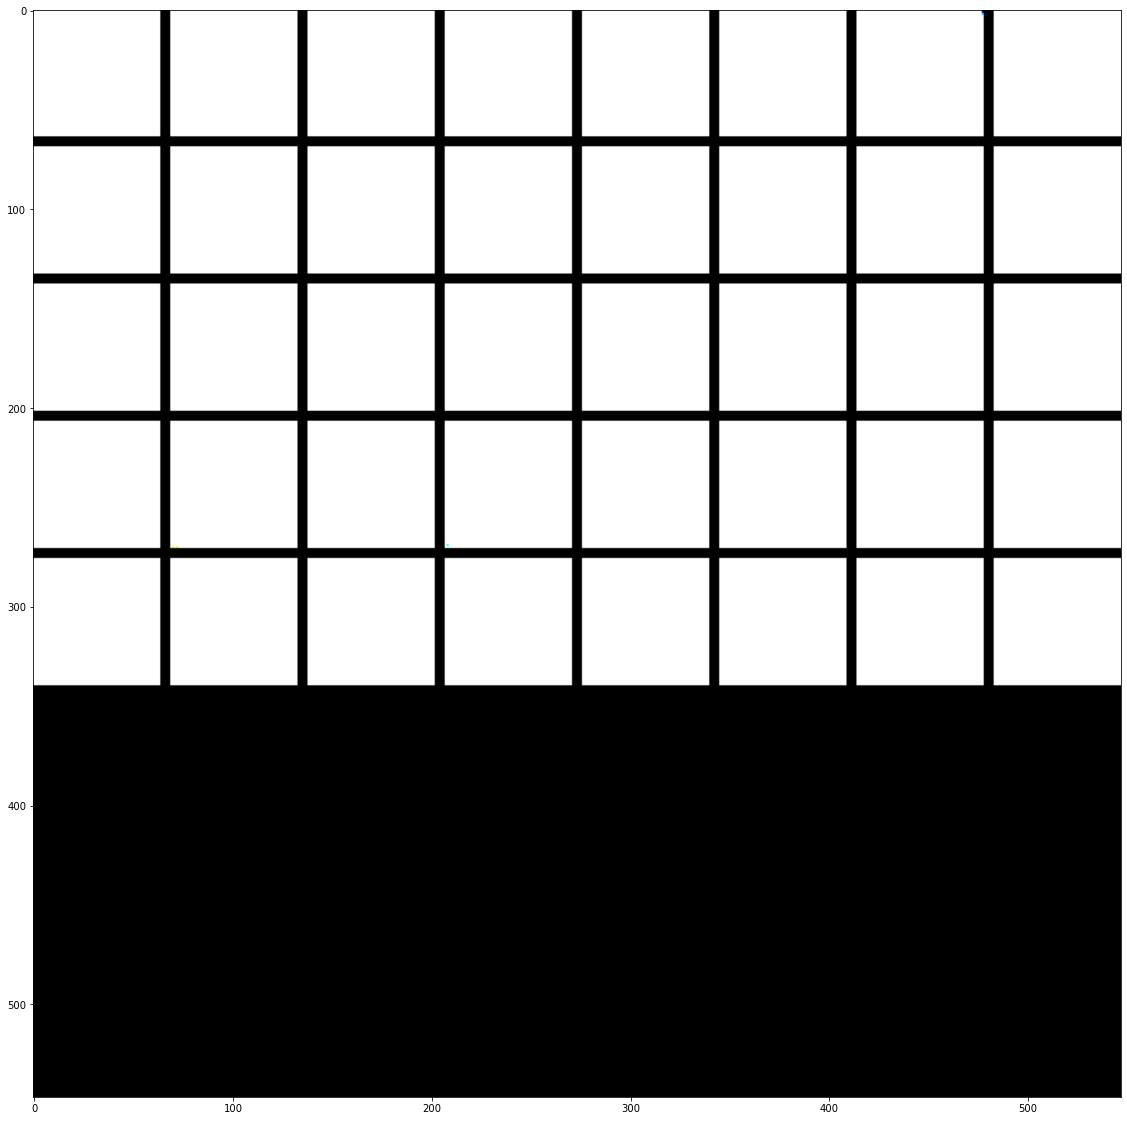

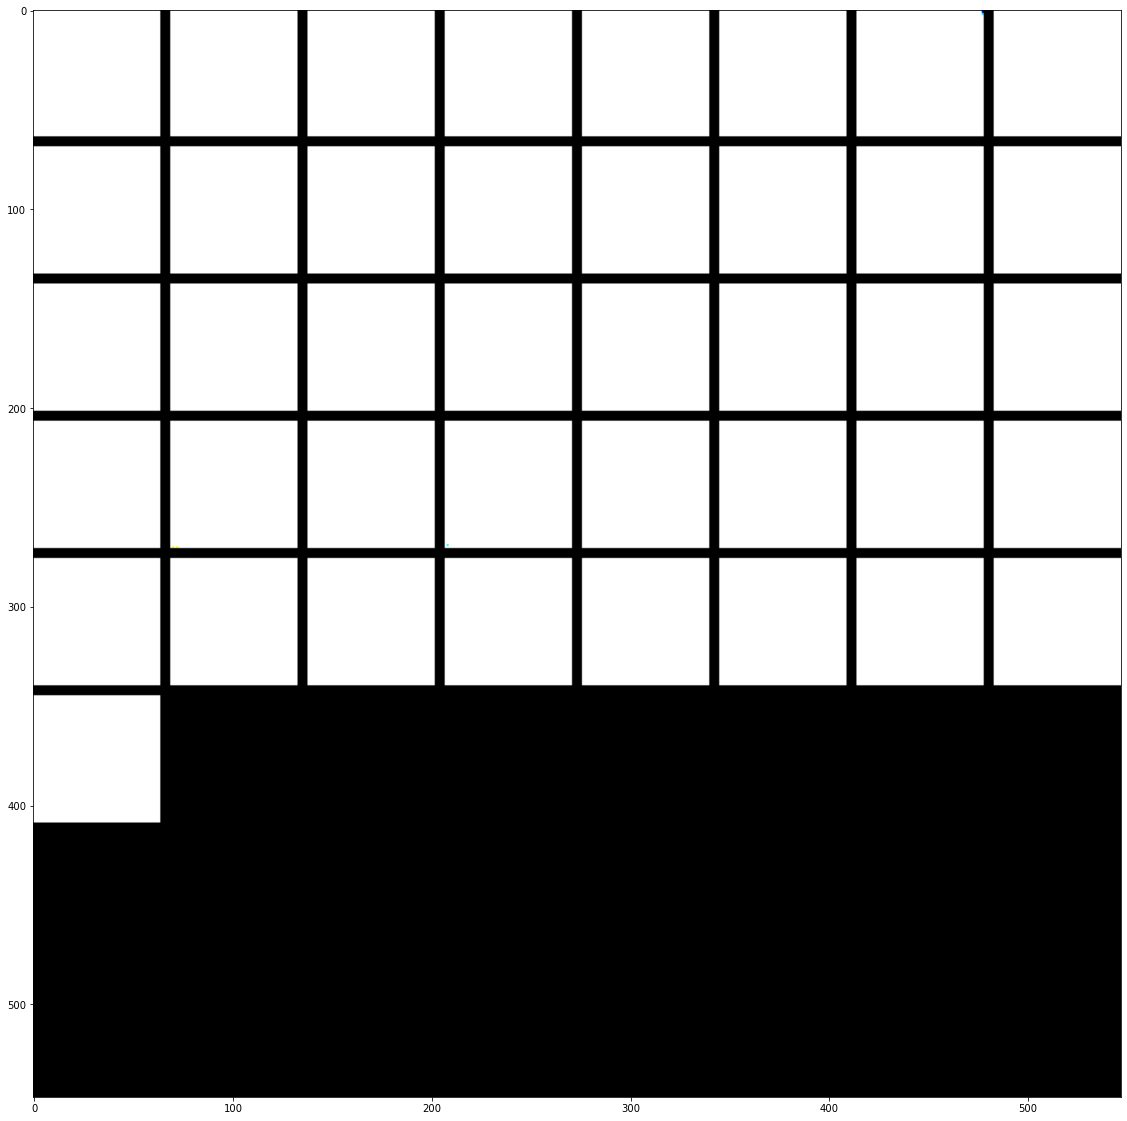

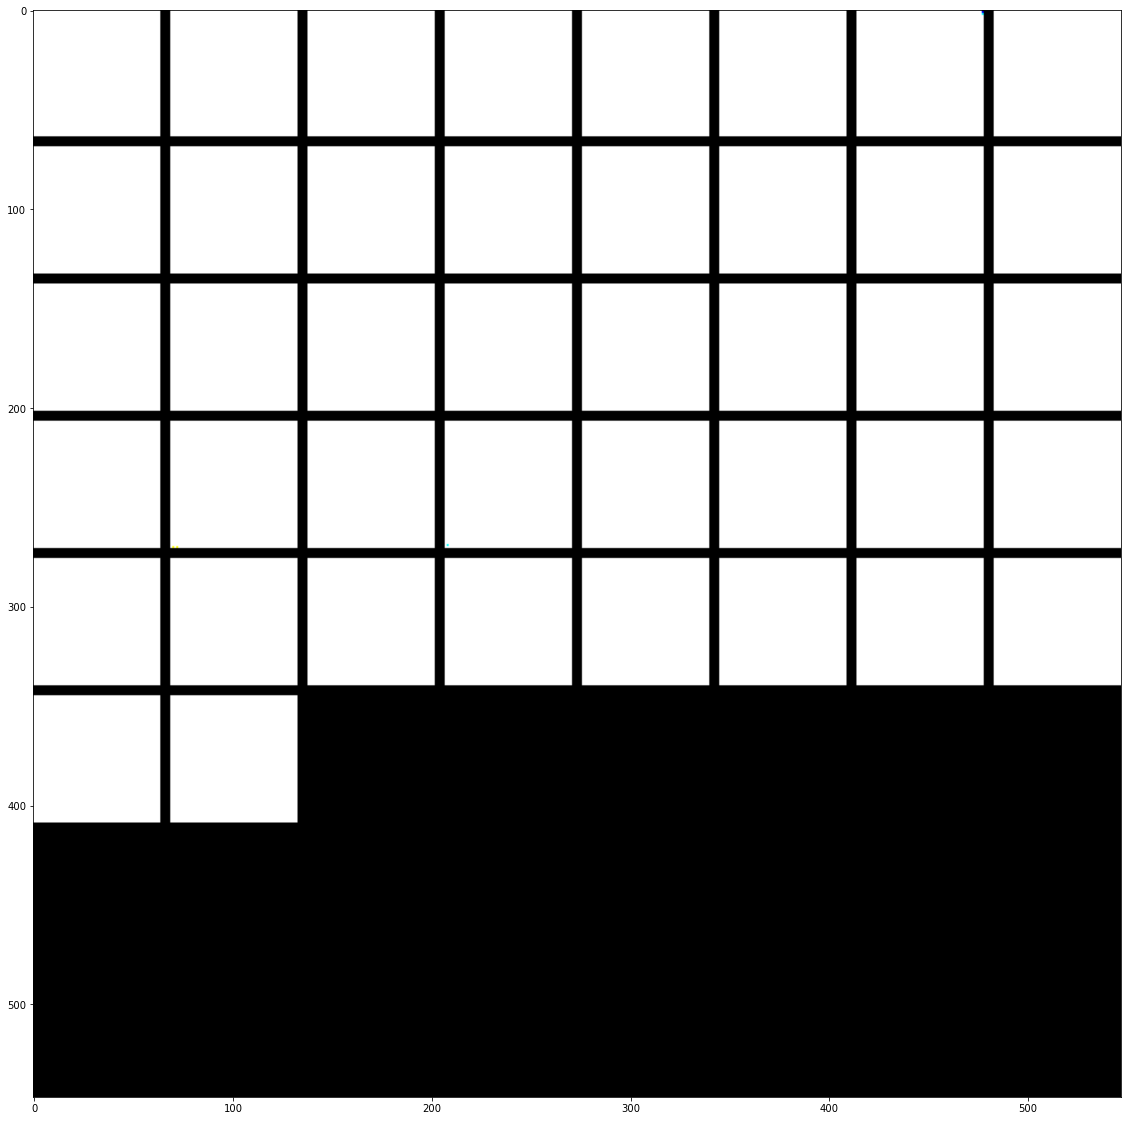

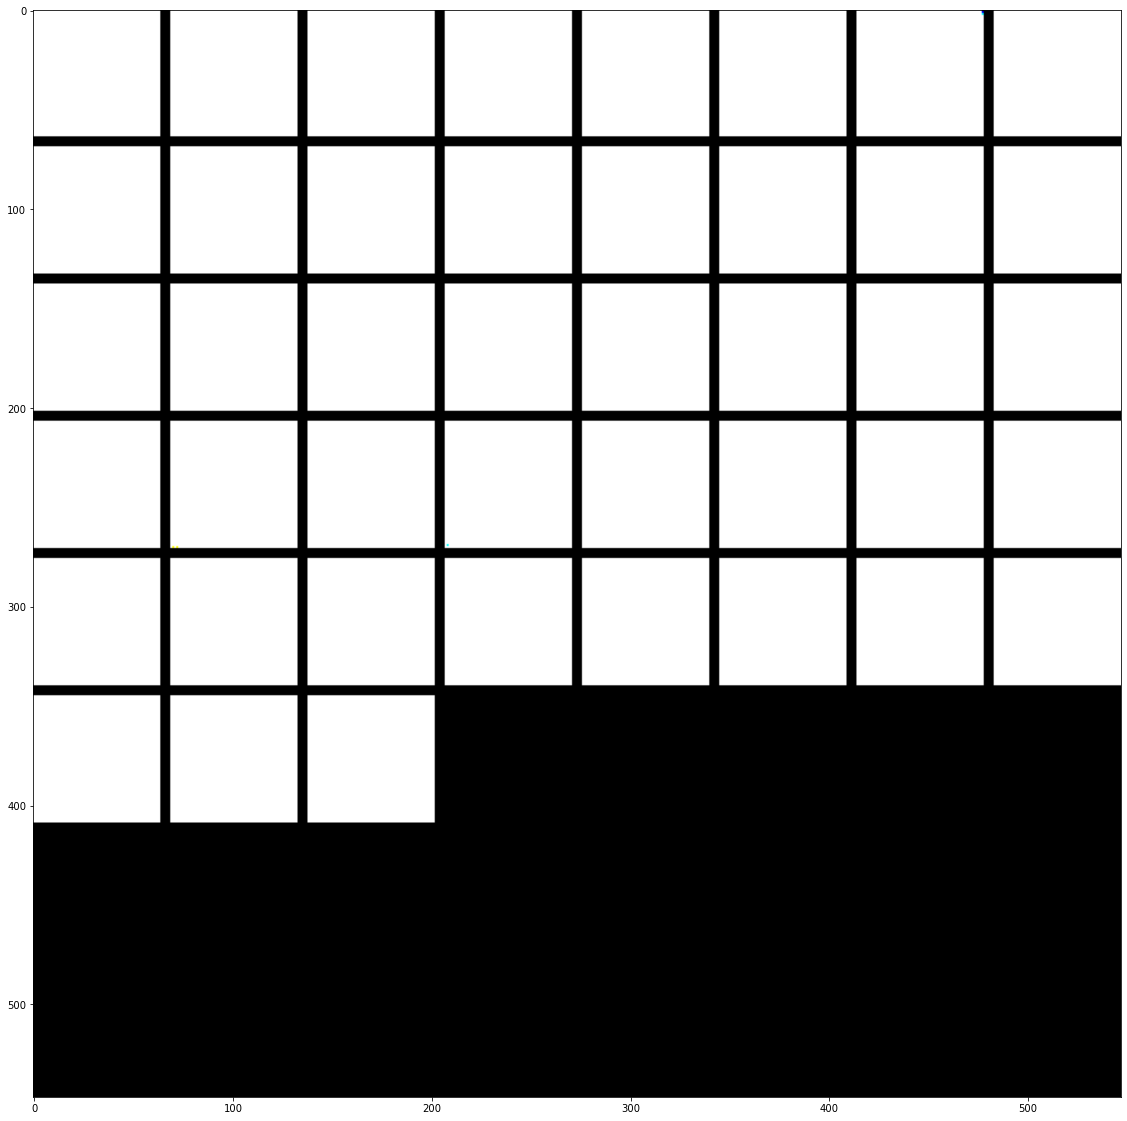

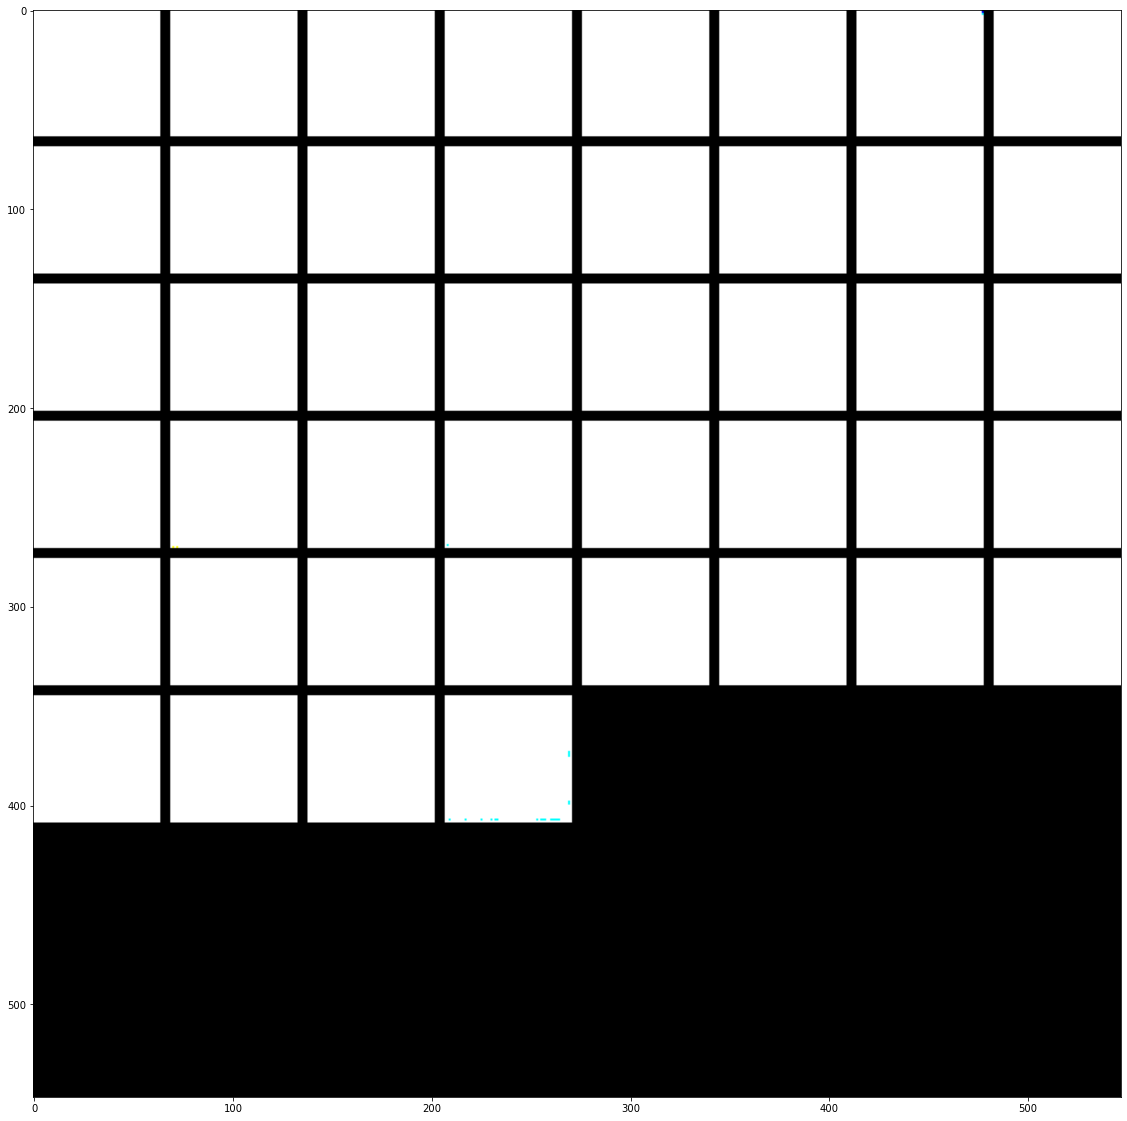

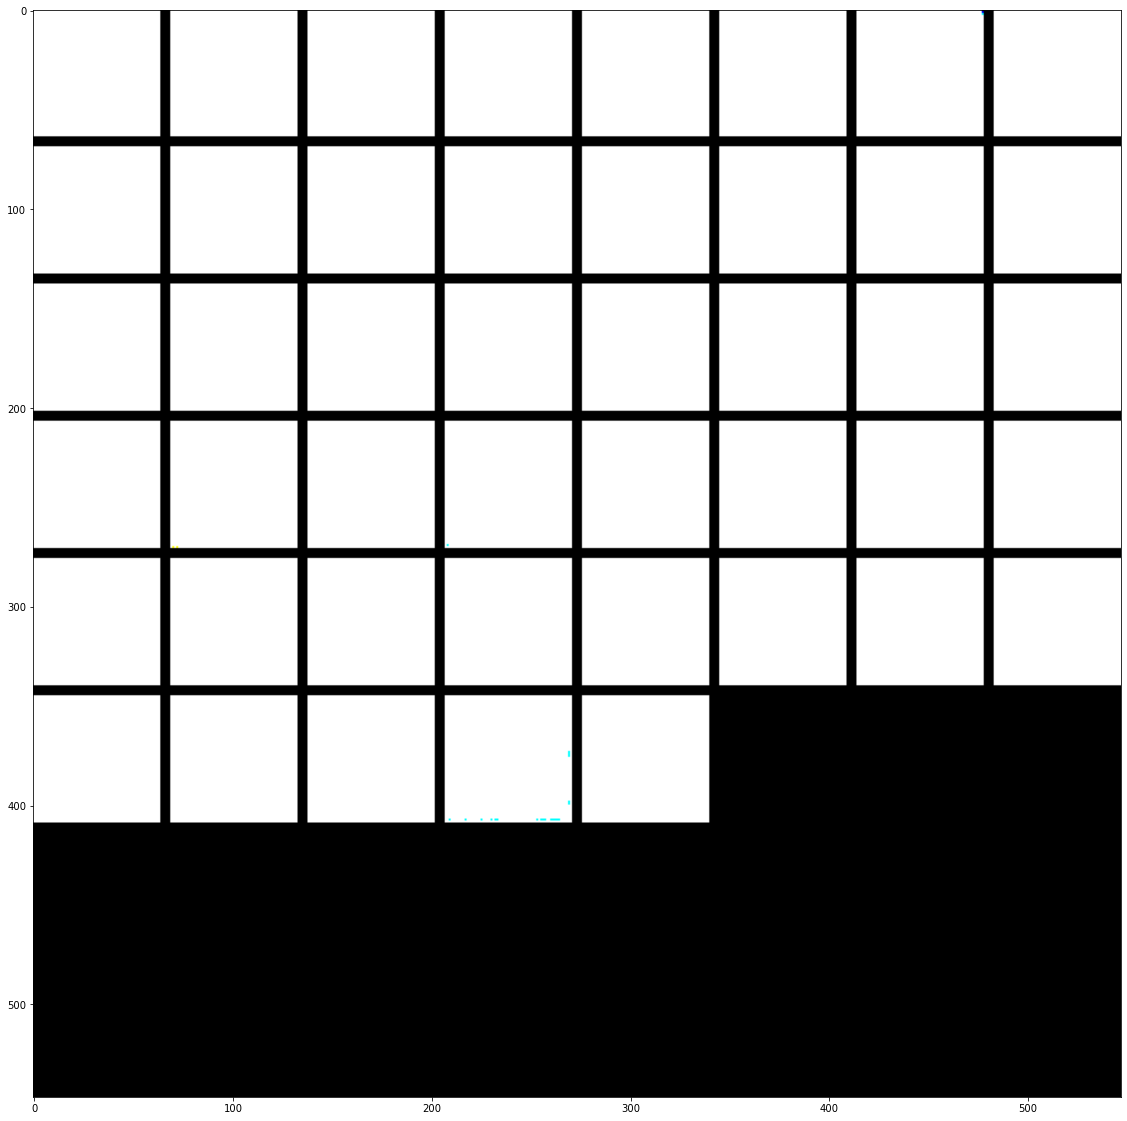

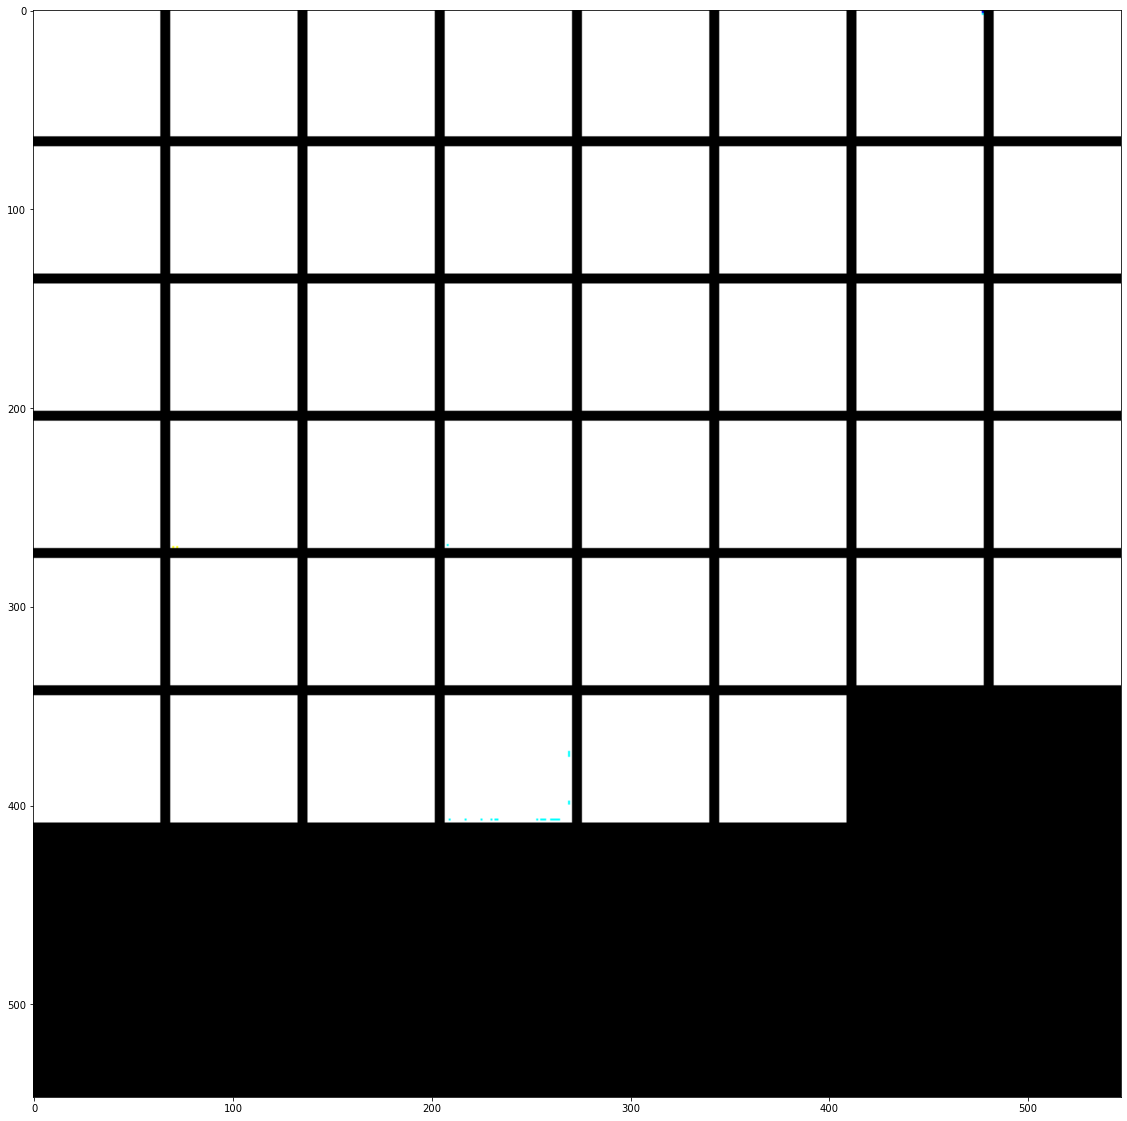

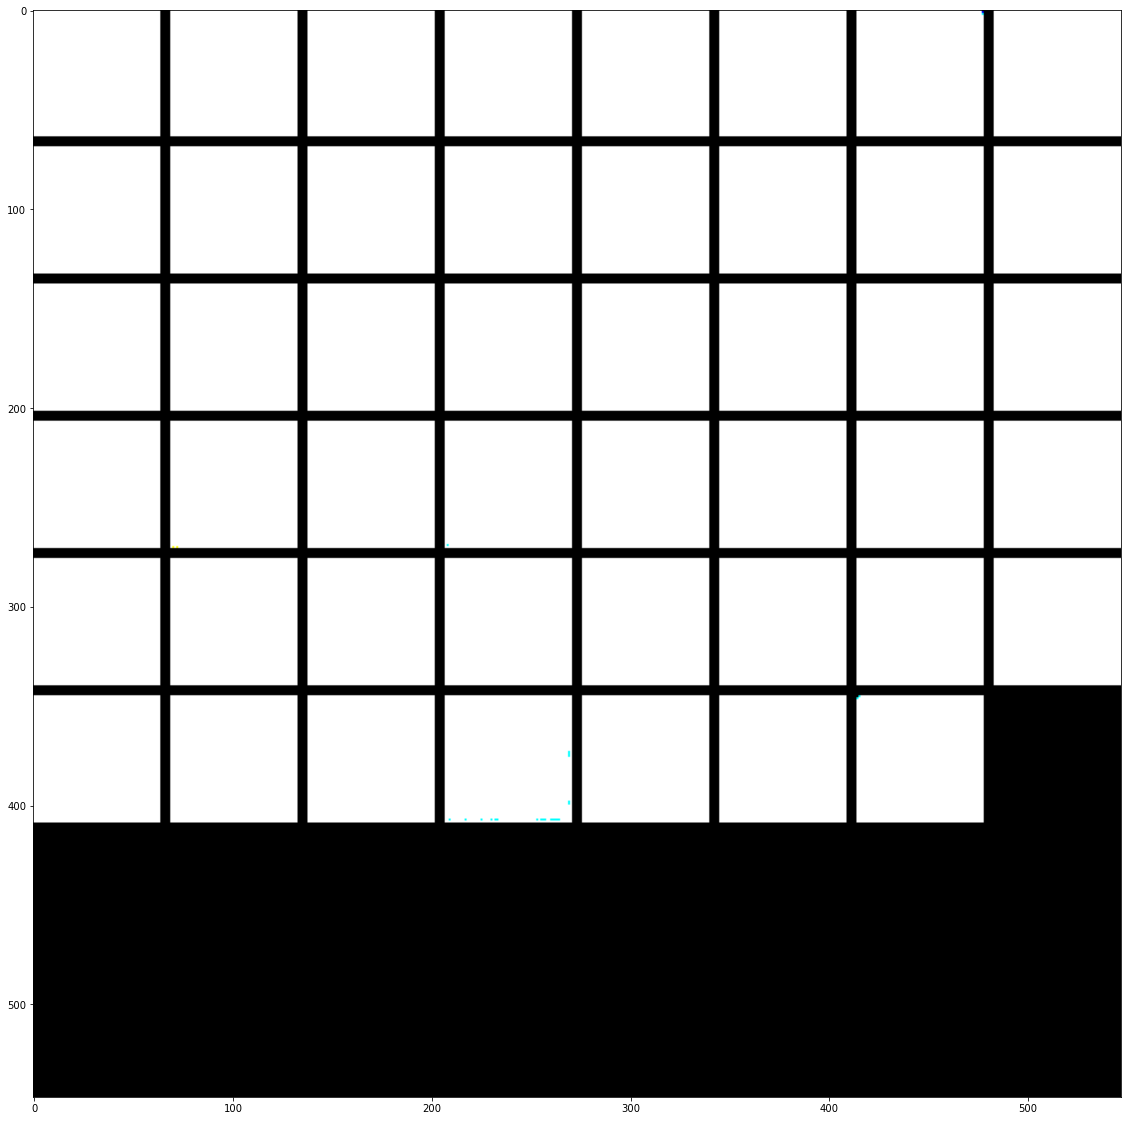

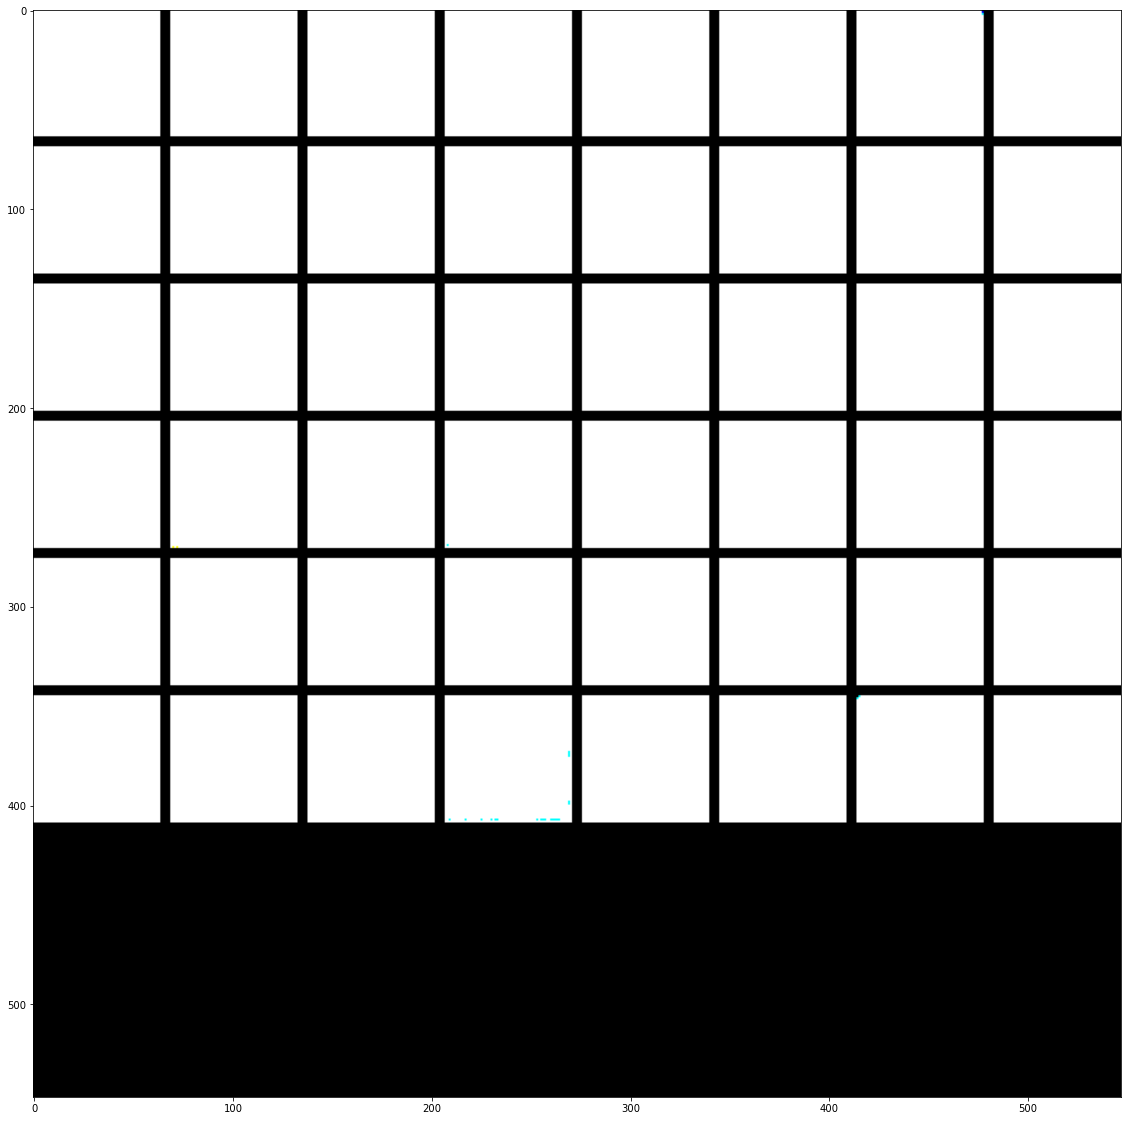

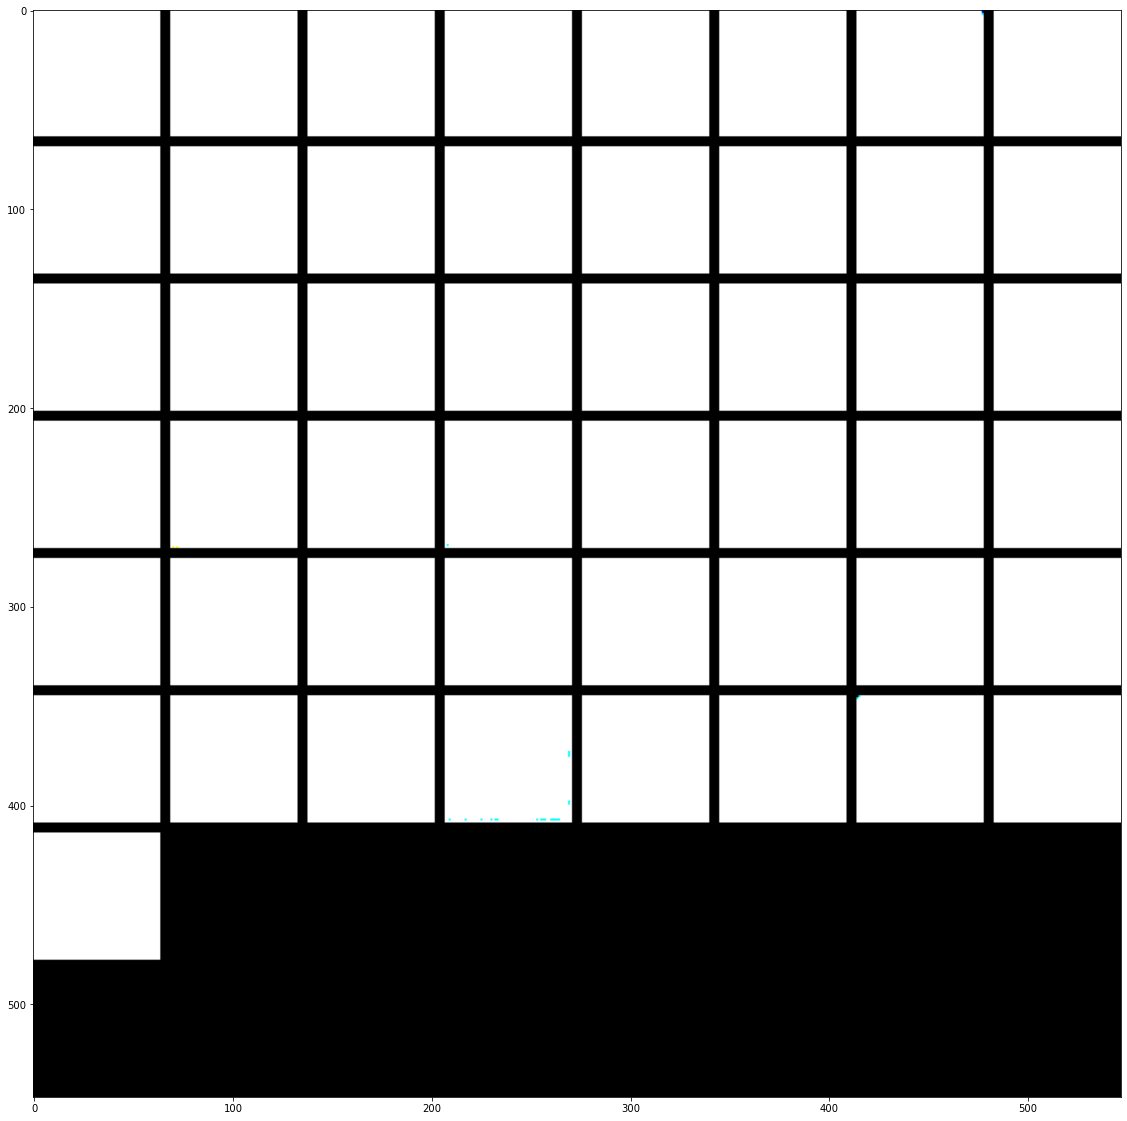

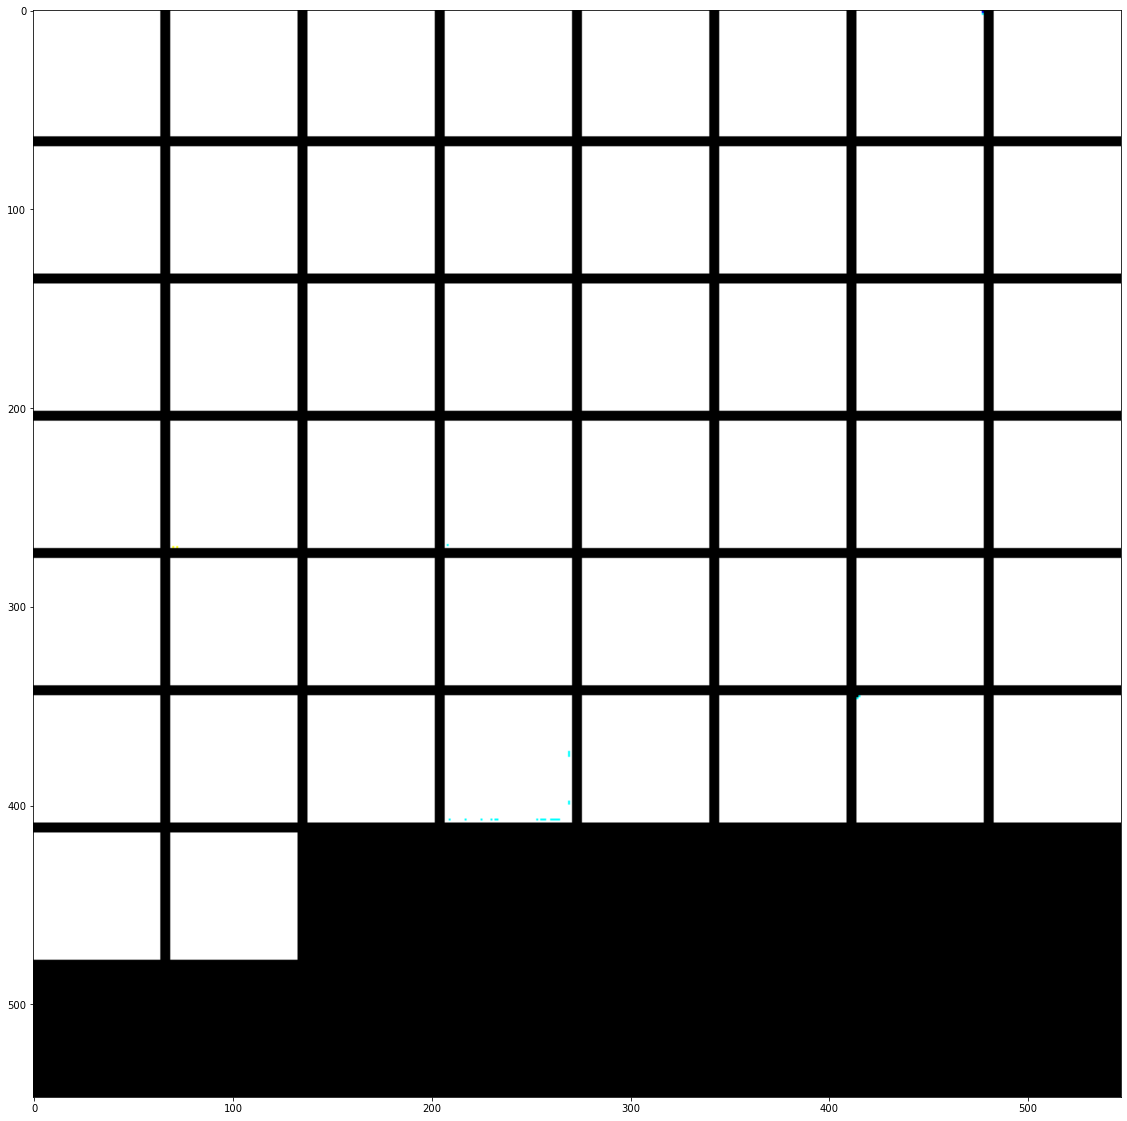

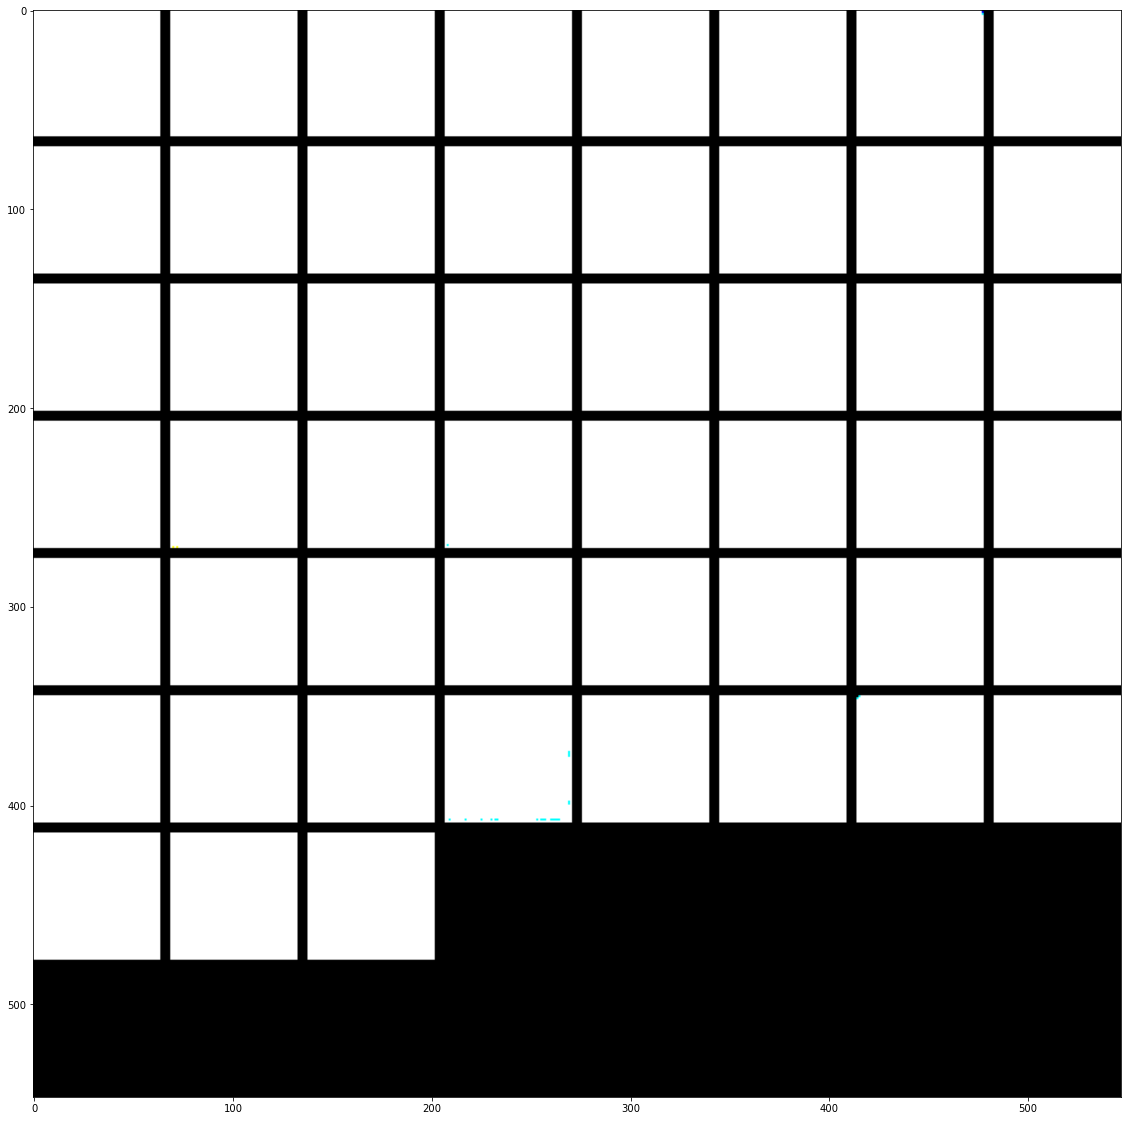

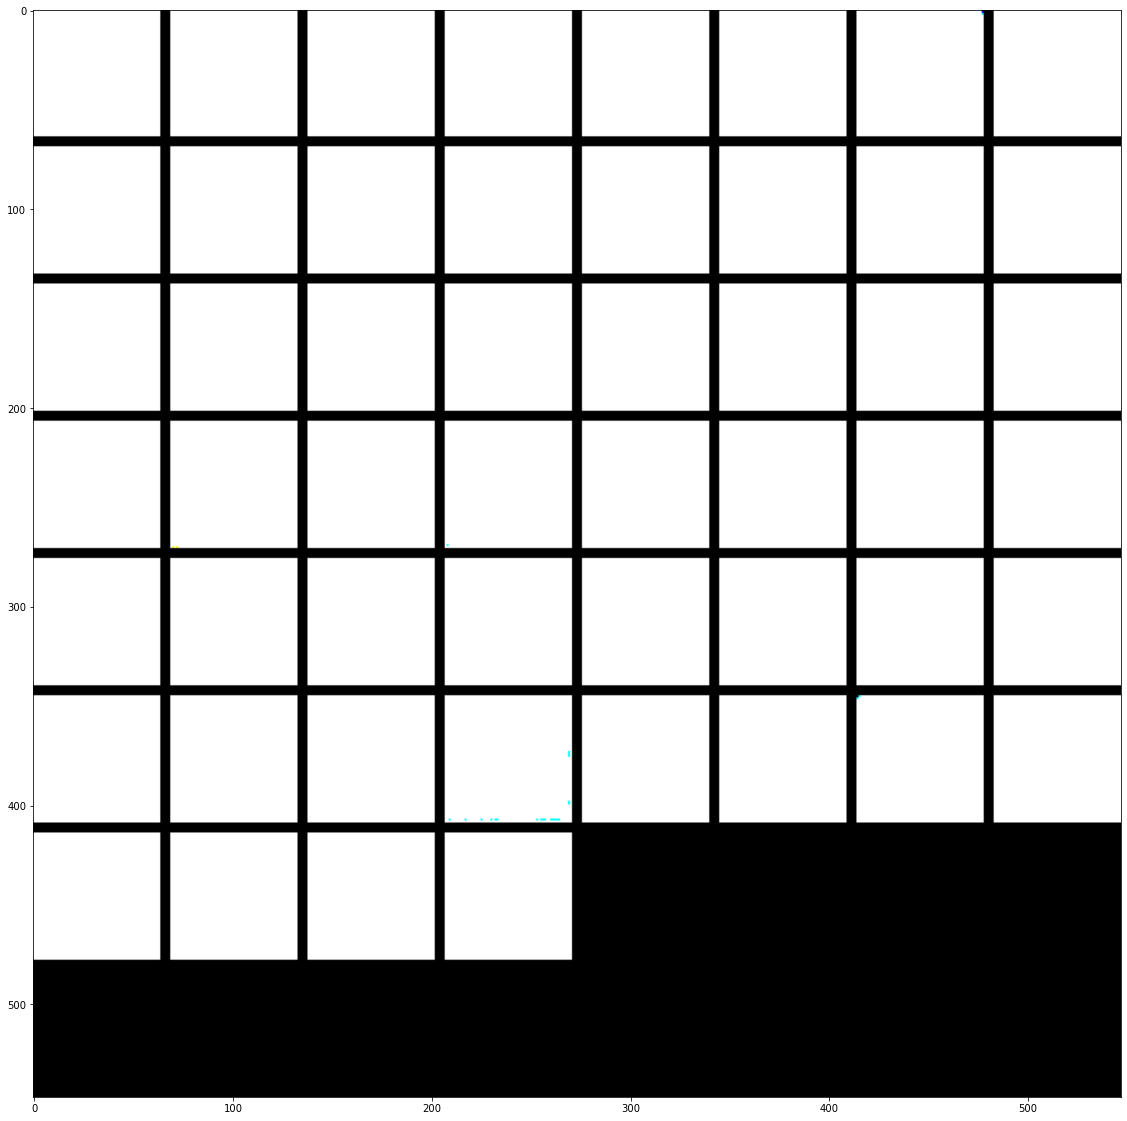

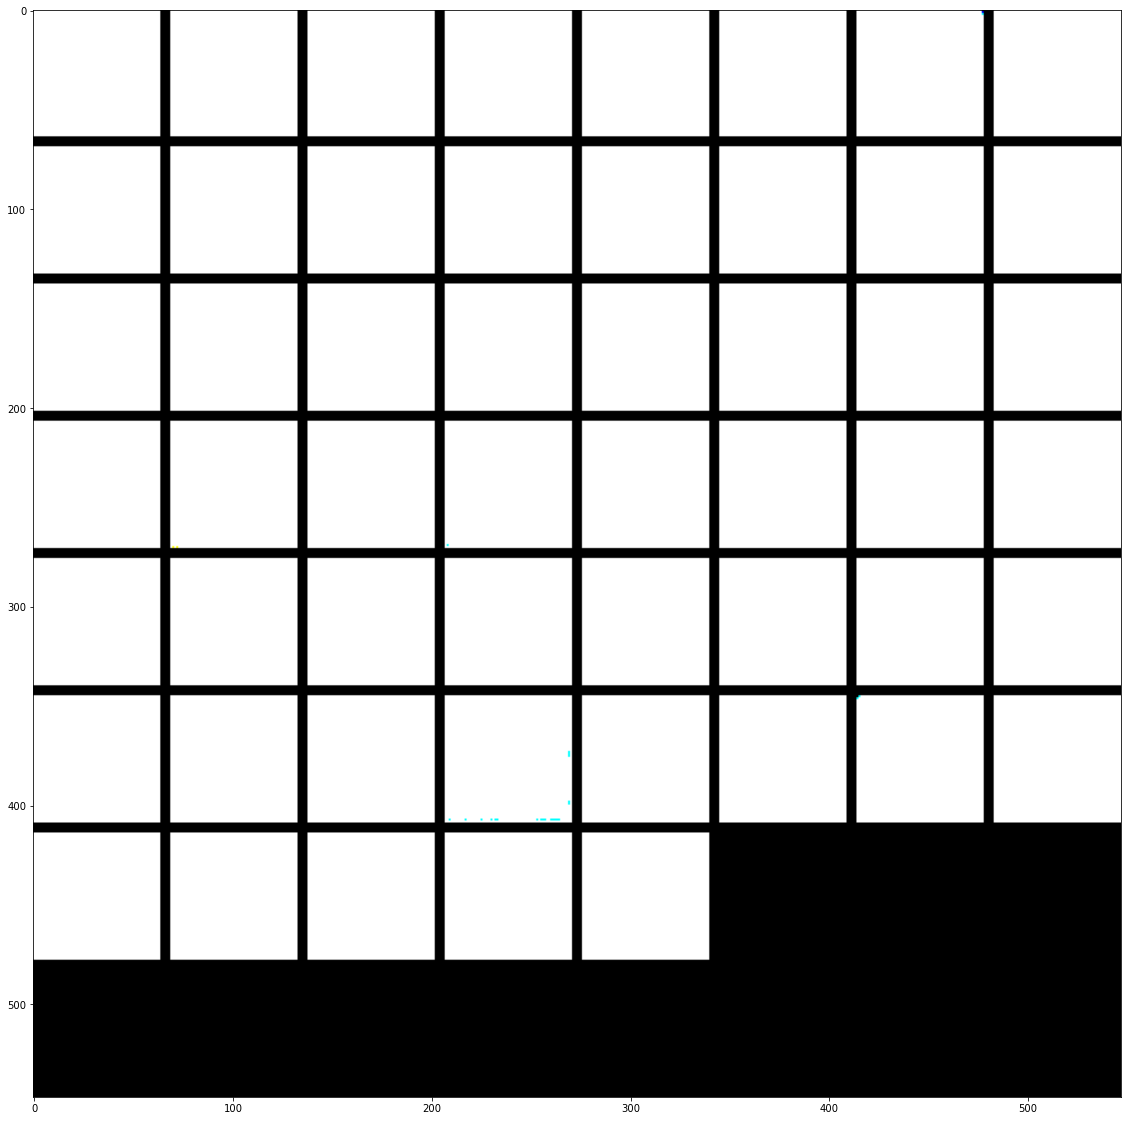

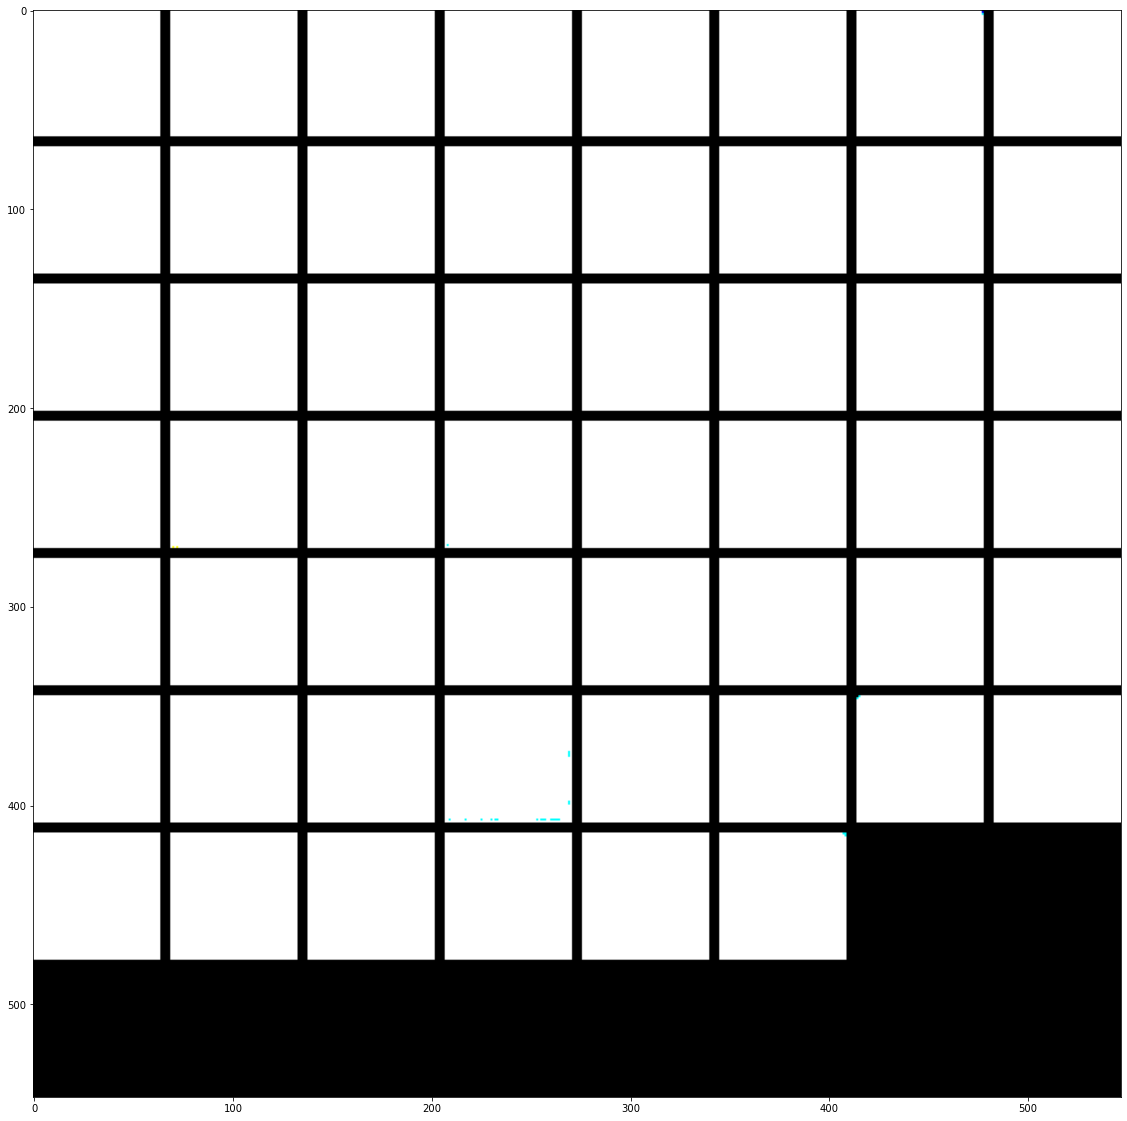

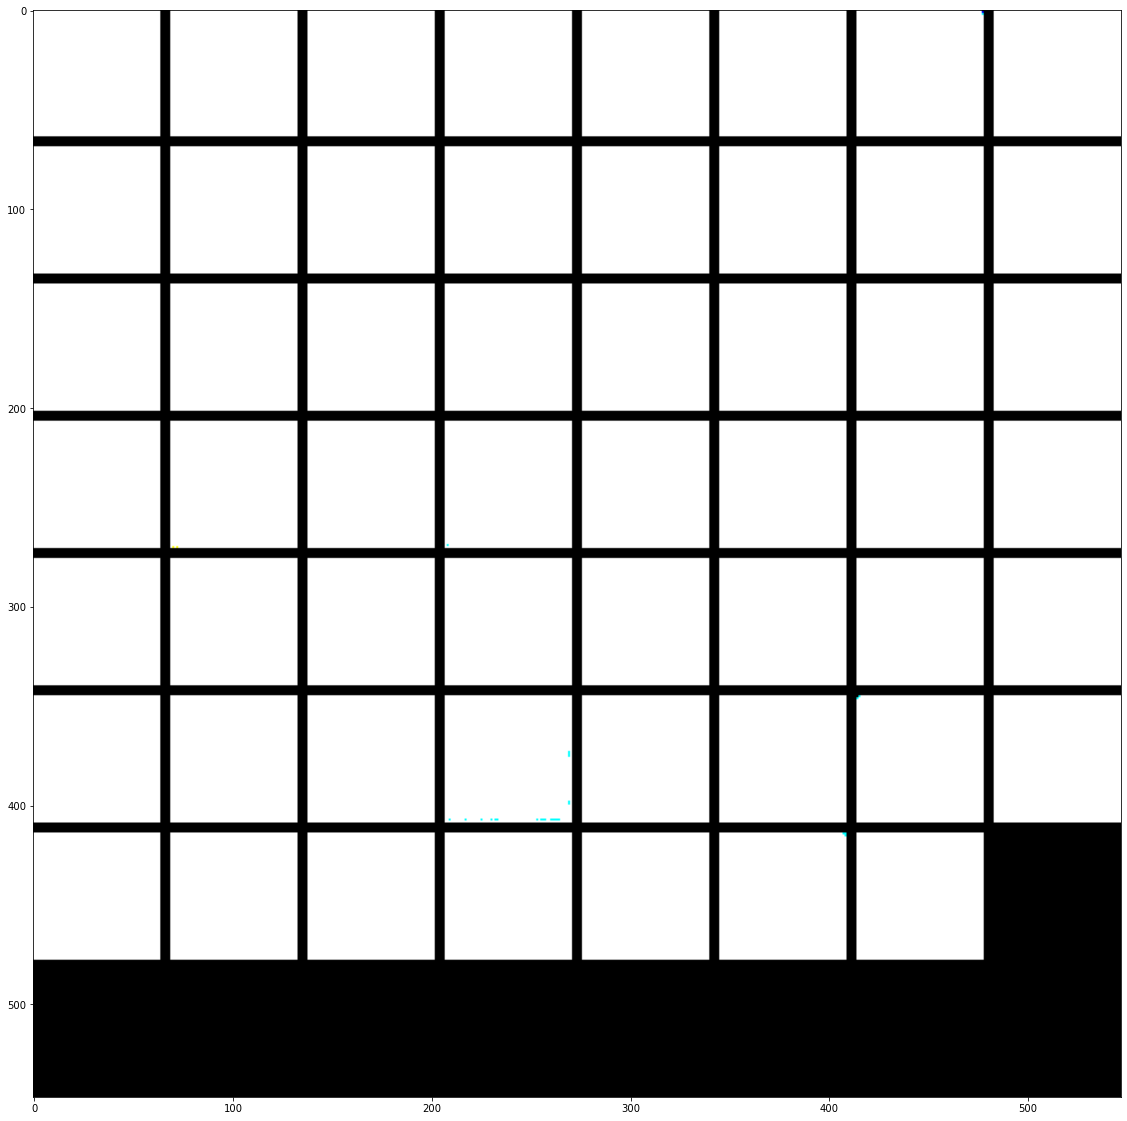

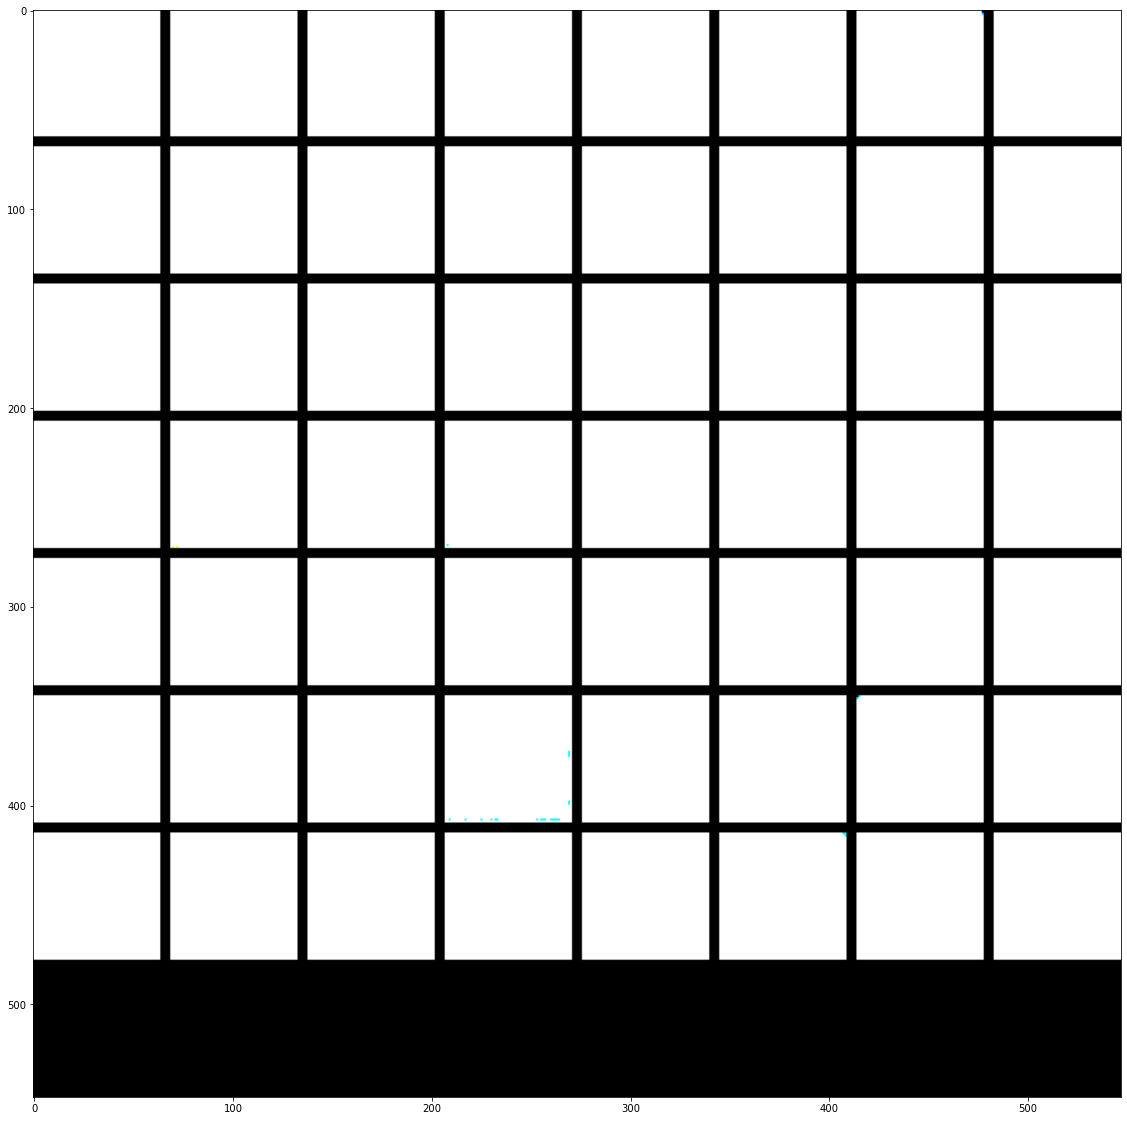

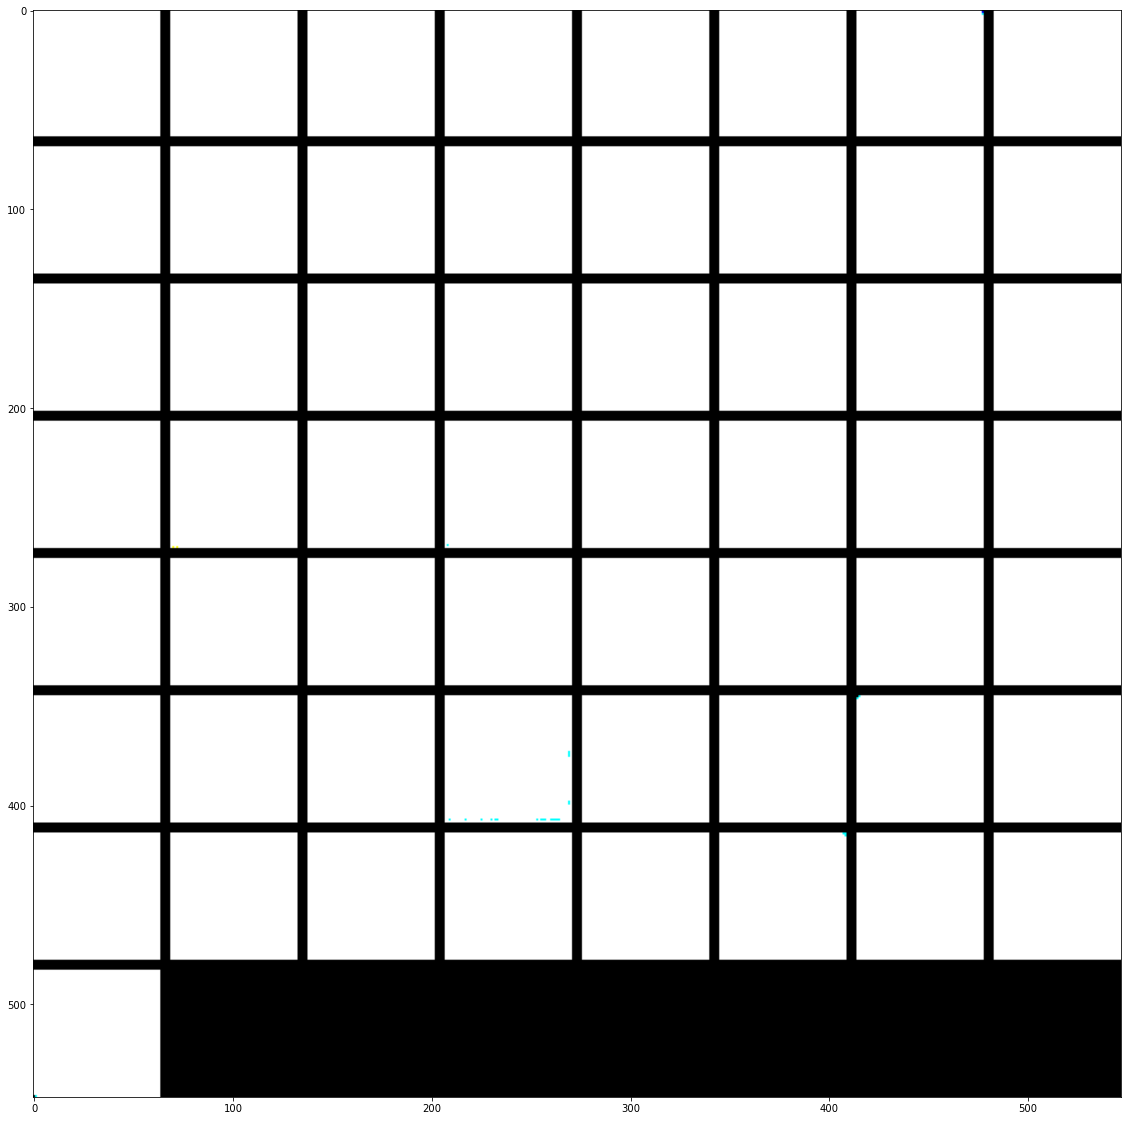

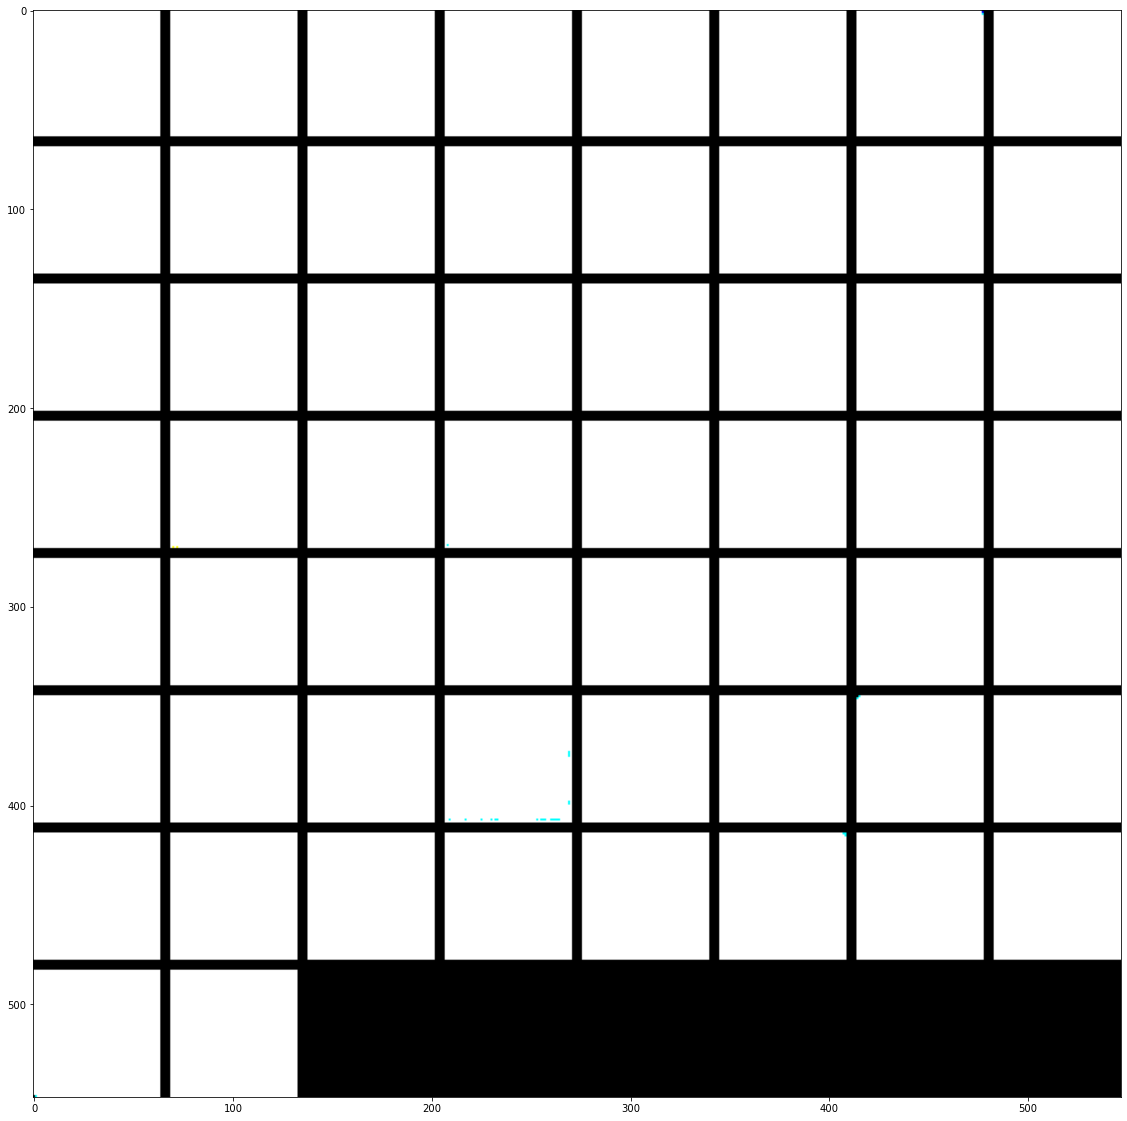

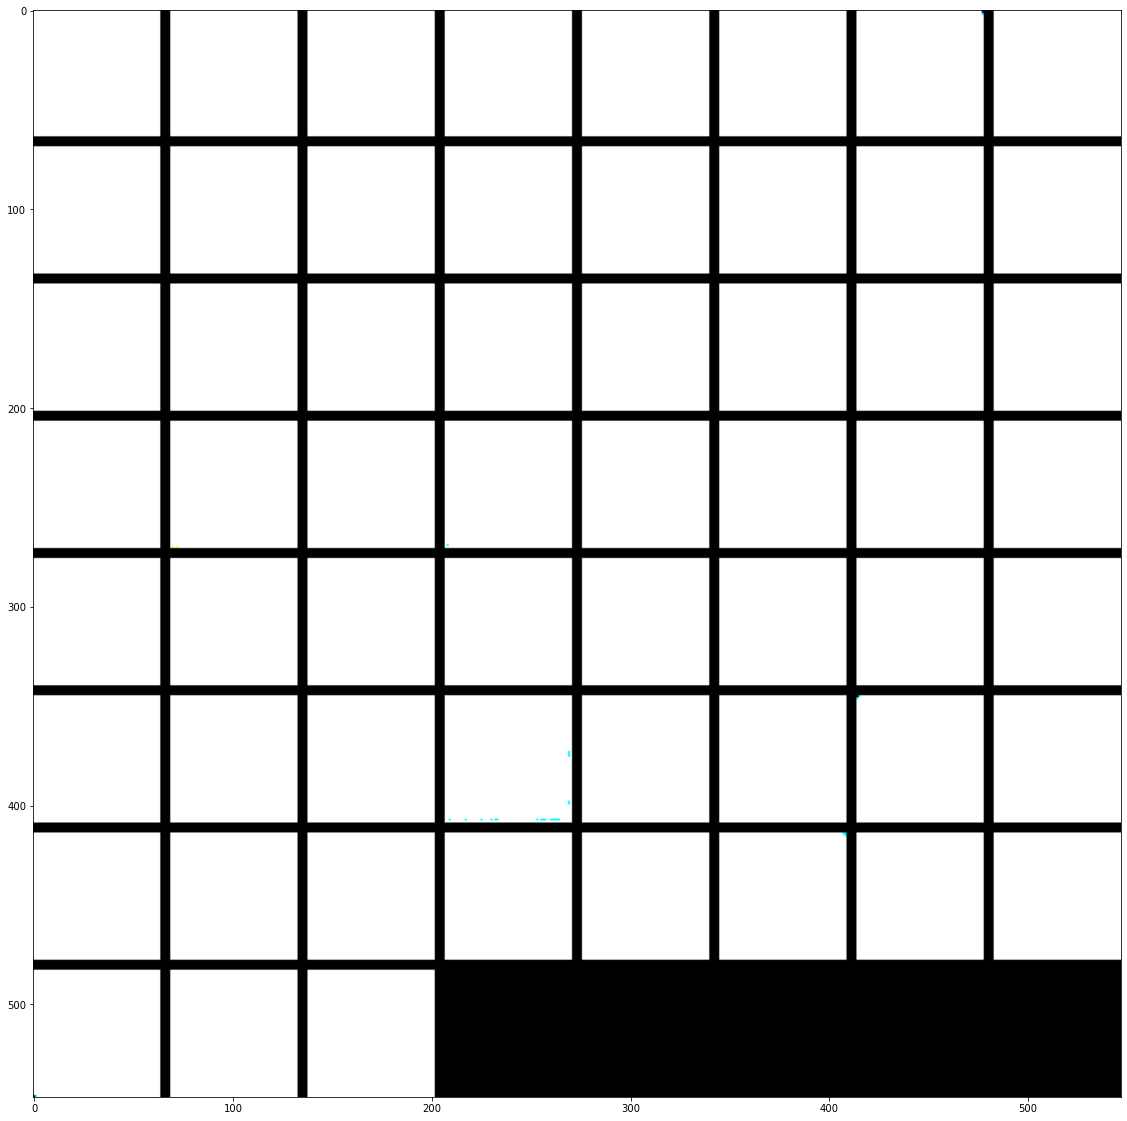

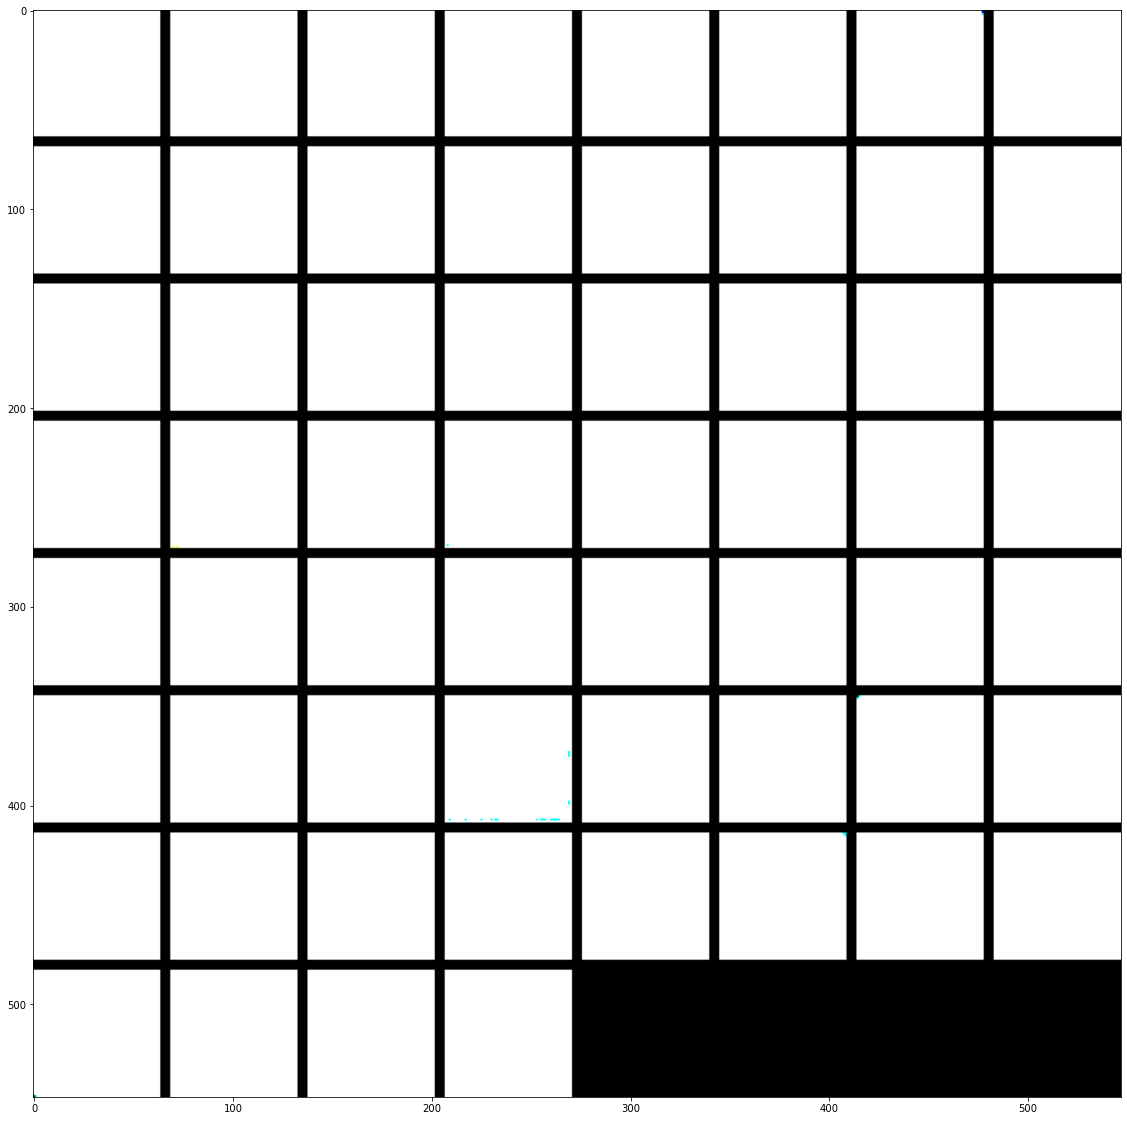

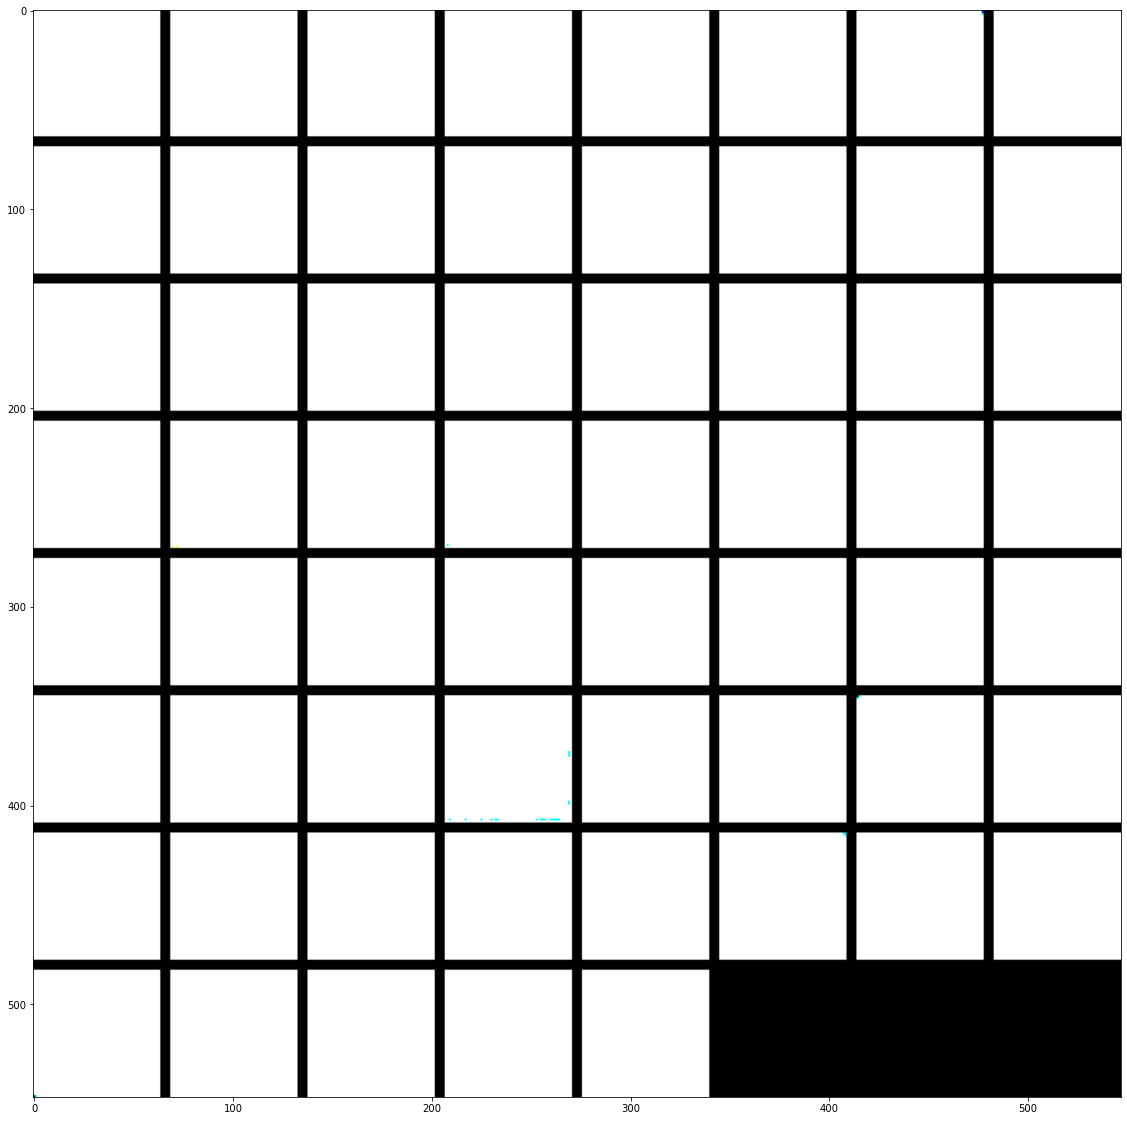

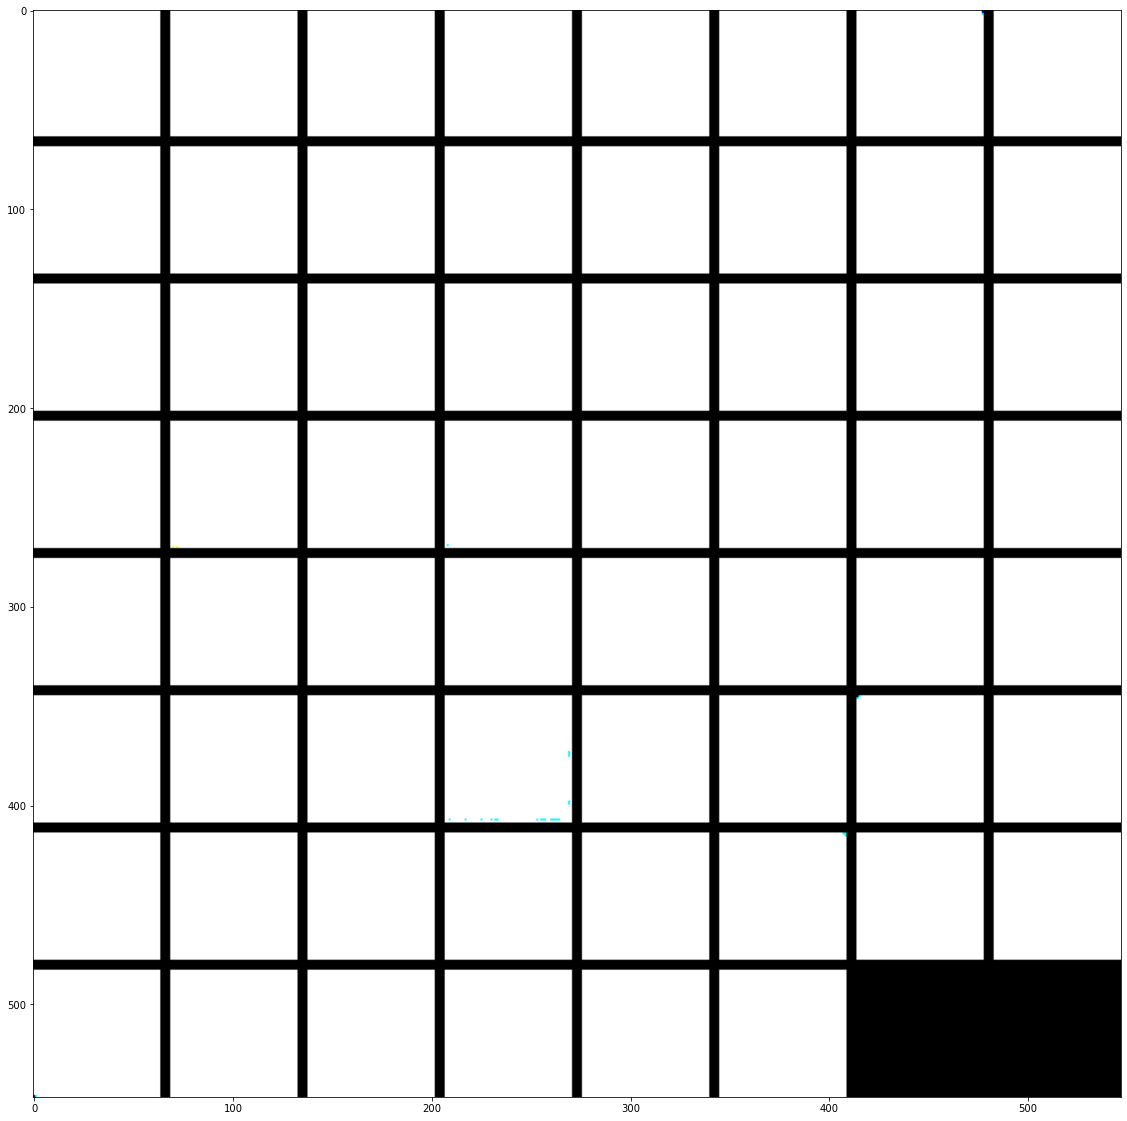

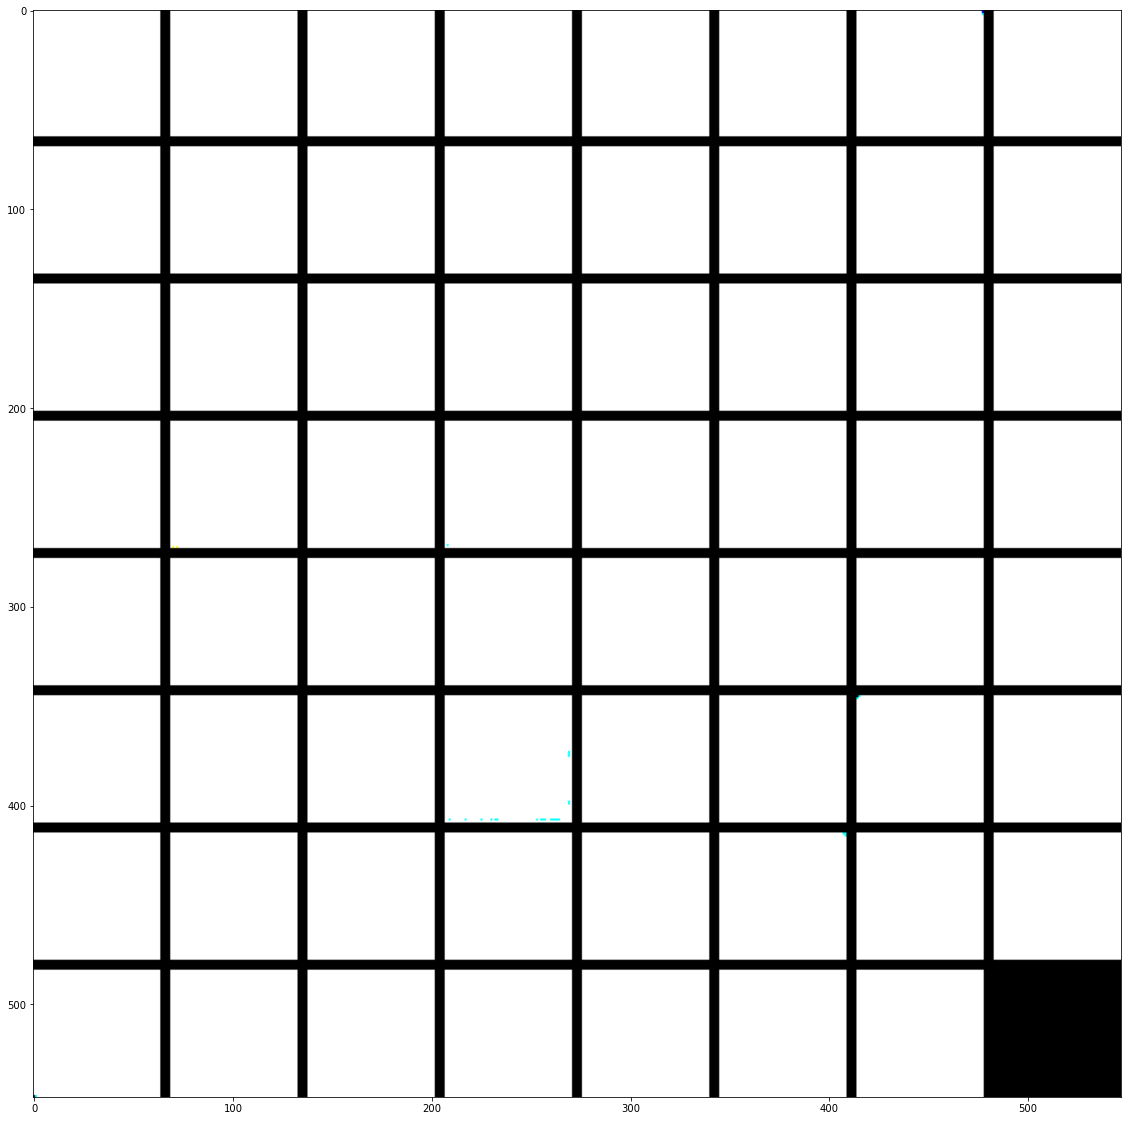

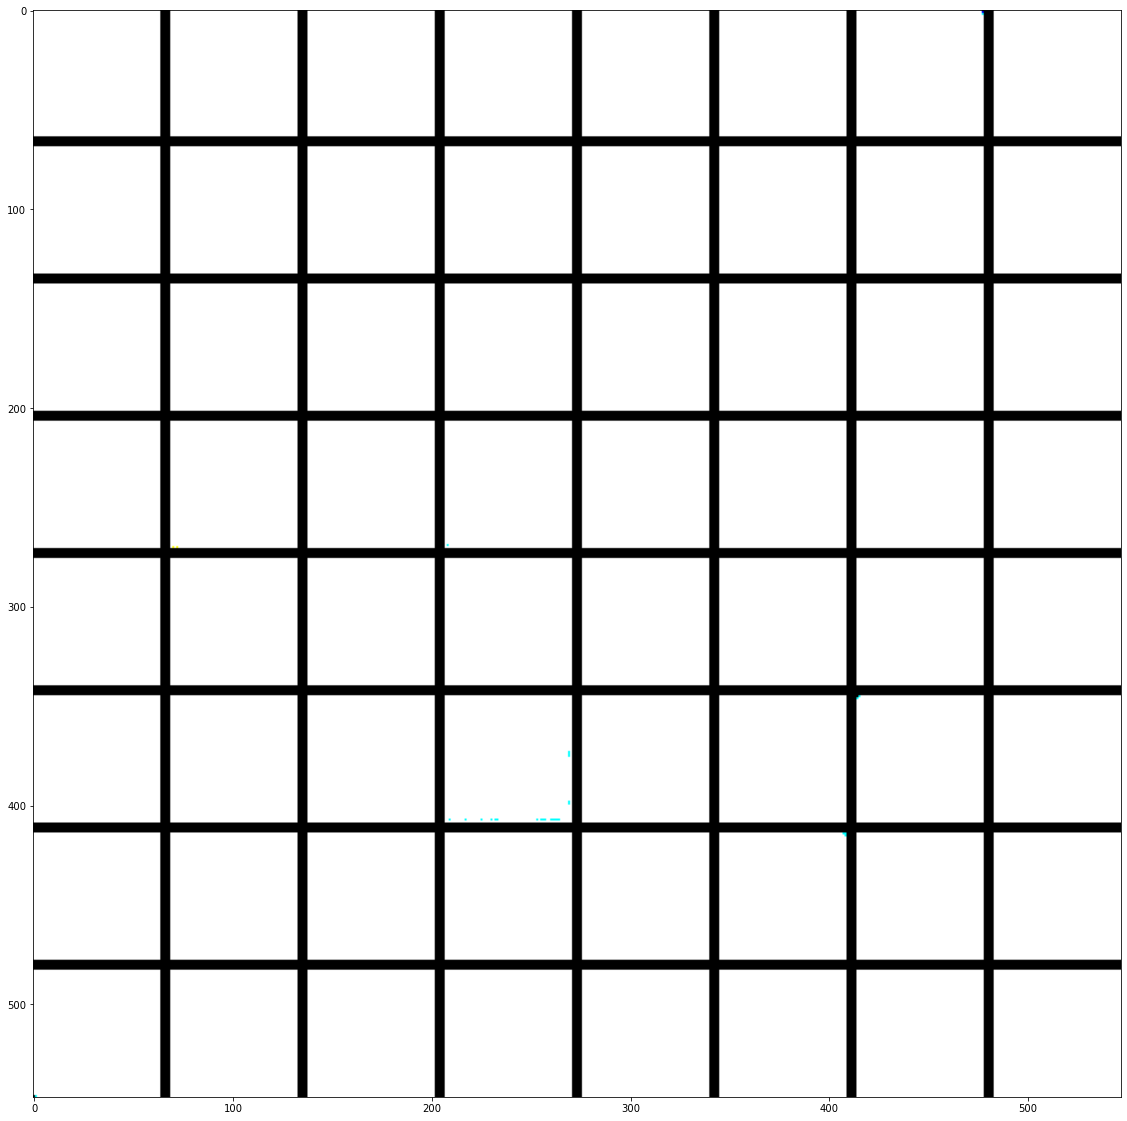

In [176]:
# -------------------------------------------------------------
# GENERATING A GRID OF ALL FILTER RESPONSE PATTERNS IN A LAYER |
# -------------------------------------------------------------

layer_name = 'block1_conv1'
size = 64
margin = 5

# Empty (black) image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):  # Iterate over the rows of the results grid
    for j in range(8):  # iterates over the columns of the results grid
        # Generates the pattern for filter i+(j*8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
        # Displays the results grid
        plt.figure(figsize=(20, 20))
        plt.imshow(results)

In [ ]:
'''
Problem 2: Perform testing. Get the predicted class - show some correctly and not correctly predicted images of testing set as 
below. Evaluate test results using confusion matrix, classification report (precision, recall, f1-score, support, ROC/AUC and 
Precision-Recall curves). Except tables for this evaluation provies graphics of normalized confusion matrix as shown below, 
ROC/AUC curves as the one below.
'''

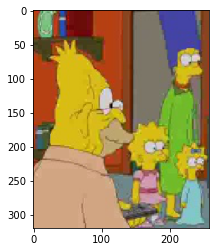

Actual value:  0 	Predicted value:  4763


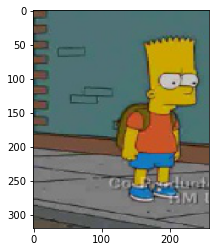

Actual value:  1 	Predicted value:  30875


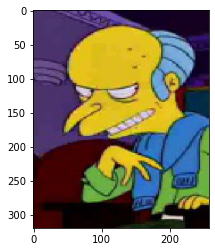

Actual value:  2 	Predicted value:  31387


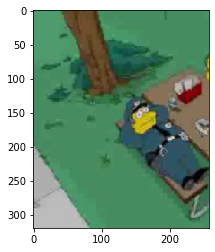

Actual value:  3 	Predicted value:  18587


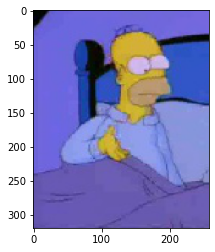

Actual value:  4 	Predicted value:  22171


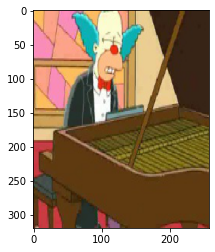

Actual value:  5 	Predicted value:  13467


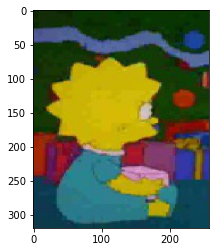

Actual value:  6 	Predicted value:  30363


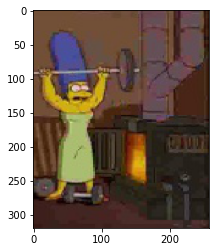

Actual value:  7 	Predicted value:  17051


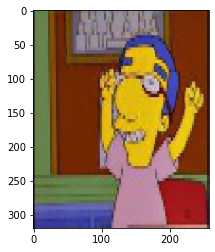

Actual value:  8 	Predicted value:  7323


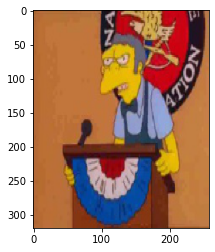

Actual value:  9 	Predicted value:  30363


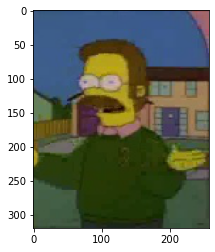

Actual value:  10 	Predicted value:  18075


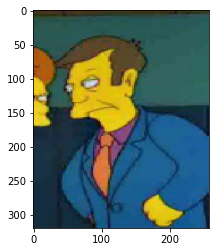

Actual value:  11 	Predicted value:  12955


In [184]:
# displaying 12 images with the prediction -----------

# we chose 1 image from each class...

labels = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']
i=0
for names in labels:
    pathToFolder = test_dir +'/'+names+'/'
    fnames = [os.path.join(pathToFolder, fname) for
          fname in os.listdir(pathToFolder)]
    
    # generate random number btwn (0,40)
    randNum = random.randint(0, 40)
    img_path = fnames[randNum]
    tmp_img = image.load_img(img_path, target_size = (320, 258))
    tmp_img = image.img_to_array(tmp_img)
    tmp_img = np.expand_dims(tmp_img, axis = 0)
    
    tmp_img /=255.
    plt.imshow(tmp_img[0])
    plt.show()
    # predict 
    result = model.predict(tmp_img)
    train_generator.class_indices
    print('Actual value: ',i,'\tPredicted value: ', np.argmax(result))
    i+=1

In [200]:
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (320, 258),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=False)

Total number of images for "testing":
Found 594 images belonging to 12 classes.


In [220]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, 
                      title='Confusion Matrix', normalize=False)

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [219]:
print(classification_report(test_generator.classes, y_pred, digits=4))

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [213]:
# ROC/AUC
model3.evaluate(validation_generator)

  ...
    to  
  ['...']
75/75 [==============================] - 7s 94ms/step - loss: 0.9610 - acc: 0.7086: 2s - loss


[0.9609774470329284, 0.7085595]

In [214]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

validation_generator.reset()

preds = model.predict(validation_generator,verbose=1)

75/75 [==============================] - 21s 278ms/step


In [215]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

In [218]:
Y_pred = model.predict_generator(test_generator.classes)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', 
                      normalize=False, figname = 'Confusion_matrix_concrete.jpg')

ValueError: `steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps` or use the `keras.utils.Sequence` class.